In [313]:
# setup libraries for exercises and practicals
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math
import scipy.io as sio
import sys
from inversionCourse import rejectmethod as rj
from inversionCourse import eqlocate as eq
from inversionCourse.plotcovellipse import plot_point_cov,plot_cov_ellipse

<img src="Figures/Slides/Pages from EMSC8023-B_2018-p13.png" alt="Slide" width="600"/>

In [314]:
x=np.linspace(1.0,10.,10) 
print(np.transpose([np.ones(len(x)),x,-0.5*x*x]))

[[  1.    1.   -0.5]
 [  1.    2.   -2. ]
 [  1.    3.   -4.5]
 [  1.    4.   -8. ]
 [  1.    5.  -12.5]
 [  1.    6.  -18. ]
 [  1.    7.  -24.5]
 [  1.    8.  -32. ]
 [  1.    9.  -40.5]
 [  1.   10.  -50. ]]


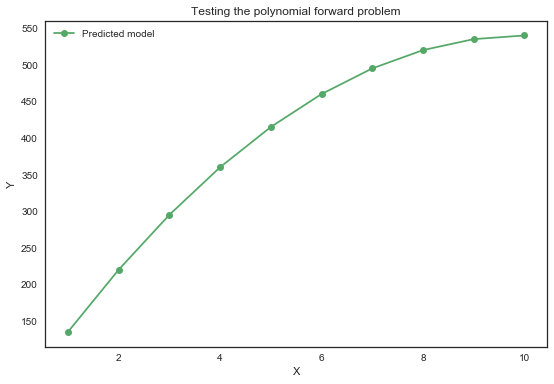

In [315]:
###############################
# The forward problem
#####################
x=np.linspace(1.0,10.,10) # build x
G=np.transpose([np.ones(len(x)),x,-0.5*x*x]) # Build G matrix
mguess=[40.0,100.,10.] 
ypredicted1=np.dot(G, mguess)

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x,ypredicted1,'go-',label='Predicted model')
plt.legend(loc='upper left',framealpha=0.7)
plt.title('Testing the polynomial forward problem')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

<img src="Figures/Slides/Pages from EMSC8023-B_2018-p15.png" alt="Slide" width="600"/>

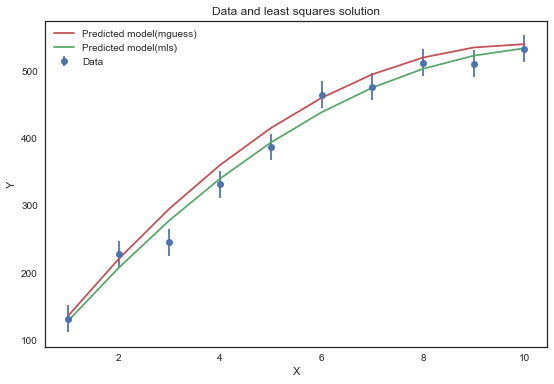

In [316]:
#######################
#  The inverse problem  
#######################
x = np.linspace(1.0, 10., 10) # x-values
G = np.transpose([np.ones(len(x)), x, -0.5*x*x]) # G matrix
yobs = [ 131.4 , 227.1, 245.0, 331.2, 386.9, 464.9, 476.3,\
512.2, 510.8, 532.9] # data
sigmay = 20.0 # data errors
Cdinv = np.eye(10)/(sigmay**2) # Inverse Data covariance matrix
A = np.dot(np.transpose(G), Cdinv) # Find solution
GtG = np.dot(A, G) # G^T C_inv G^T
GtGinv = np.linalg.inv(GtG) # Inverse of G^TC_inv G
B = np.dot(A,yobs)
mls = np.dot(GtGinv, B)
ypredicted2=np.dot(G, mls)

fig, ax = plt.subplots(figsize=(9,6))
ax.errorbar(x,yobs,yerr=np.ones(len(yobs))*sigmay,fmt='o',color='b',label='Data')
ax.plot(x,ypredicted1,'r-',label='Predicted model(mguess)')
ax.plot(x,ypredicted2,'g-',label='Predicted model(mls)')

plt.legend(loc='upper left',framealpha=0.7)
plt.title('Data and least squares solution')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

<img src="Figures/Slides/Pages from EMSC8023-B_2018-p23.png" alt="Slide" width="600"/>

In [317]:
########################
#  Goodness of fit 
########################
ndata=10
r = yobs - np.dot(G,mls) # Residuals
A = np.dot(np.transpose(r), Cdinv)
chisq = np.dot(A, r) # Calculate Chi-square
crit5 = stats.chi2.ppf(q=0.05,df=ndata-3) # Critical value for 5% C.I.
crit50= stats.chi2.ppf(q=0.5,df=ndata-3) # Critical value for 50% C.I.
crit95= stats.chi2.ppf(q=0.95,df=ndata-3) # Critical value for 95% C.I.
p_value = 1 - stats.chi2.cdf(x=chisq,df=ndata-3) # Find the p-value

print("\nChi-square value: {:10.6f}".format(chisq))
print("Critical values for Chi-square")
print("  5% {:7.3f} \n 50% {:7.3f} \n 95% {:7.3f} \n".format(crit5,crit50,crit95))
p_value = 1 - stats.chi2.cdf(x=chisq,  # Find the p-value
                             df=ndata-3)
print(" P value for observed Chi-square: {:7.4f} \n".format(p_value))


Chi-square value:   6.302891
Critical values for Chi-square
  5%   2.167 
 50%   6.346 
 95%  14.067 

 P value for observed Chi-square:  0.5049 



<img src="Figures/Slides/Pages from EMSC8023-B_2018-p24.png" alt="Slide" width="600"/>

In [318]:


### With wrong data errors
sigmay = 10.0 # Incorrect data errors
Cdinv = np.eye(10)/(sigmay**2) # Inverse Data covariance matrix
r = yobs - np.dot(G,mls) # Residuals
A = np.dot(np.transpose(r), Cdinv)
chisq = np.dot(A, r) # Calculate raw Chi-square
crit5 = stats.chi2.ppf(q=0.05,df=ndata-3) # Critical value for 5% C.I.
crit50= stats.chi2.ppf(q=0.5,df=ndata-3) # Critical value for 50% C.I.
crit95= stats.chi2.ppf(q=0.95,df=ndata-3) # Critical value for 95% C.I.
p_value = 1 - stats.chi2.cdf(x=chisq,df=ndata-3) # Find the p-value

print("Goodness of fit test with incorrect data errors")
print("\nChi-square value: {:10.6f}".format(chisq))
print("Critical values for Chi-square")
print("  5% {:7.3f} \n 50% {:7.3f} \n 95% {:7.3f} \n".format(crit5,crit50,crit95))
p_value = 1 - stats.chi2.cdf(x=chisq,  # Find the p-value
                             df=ndata-3)
print(" P value for observed Chi-square: {:7.4f} \n".format(p_value))
L = np.sqrt(chisq/(ndata-3))
print(" Factor to rescale data errors by : {:7.4f} \n".format(L))


Goodness of fit test with incorrect data errors

Chi-square value:  25.211564
Critical values for Chi-square
  5%   2.167 
 50%   6.346 
 95%  14.067 

 P value for observed Chi-square:  0.0007 

 Factor to rescale data errors by :  1.8978 



<img src="Figures/Slides/Pages from EMSC8023-B_2018-p30.png" alt="Slide" width="600"/>

In [319]:
###############################
# The model covariance matrix
###############################
x = np.linspace(1.0, 10., 10) # x-values
G = np.transpose([np.ones(len(x)), x, -0.5*x*x]) # G matrix
yobs = [ 131.4 , 227.1, 245.0, 331.2, 386.9, 464.9, 476.3,\
512.2, 510.8, 532.9] # data
sigmay = 20.0 # data errors
Cdinv = np.eye(10)/(sigmay**2) # Inverse Data covariance matrix
A = np.dot(np.transpose(G), Cdinv) # Find solution
GtG = np.dot(A, G) # G^T C_inv G^T
GtGinv = np.linalg.inv(GtG) # Inverse of G^TC_inv G

Cm = GtGinv # Covariance matrix of solution errors
sig_param1 = np.sqrt(Cm[0,0]) # standard error for parameter 1
sig_param2 = np.sqrt(Cm[1,1]) # standard error for parameter 2
sig_param3 = np.sqrt(Cm[2,2]) # standard error for parameter 3

Conf1 = [mls[0]-1.96*sig_param1, mls[0]+1.96*sig_param1] # 95% CI for m1
Conf2 = [mls[1]-1.96*sig_param2, mls[1]+1.96*sig_param2] # 95% CI for m2
Conf3 = [mls[2]-1.96*sig_param3, mls[2]+1.96*sig_param3] # 95% CI for m3

D = np.sqrt(np.diag(Cm))
Dinv = np.linalg.inv(np.diag(D))
Corr = np.dot(Dinv,np.dot(Cm,Dinv))


print("\n Solution and 95% Confidence intervals \n")
print(" Parameter 1 {:7.3f} [{:7.3f}, {:7.3f}]".format(mls[0],mls[0]-1.96*sig_param1,mls[0]+1.96*sig_param1))
print(" Parameter 2 {:7.3f} [{:7.3f}, {:7.3f}]".format(mls[1],mls[1]-1.96*sig_param2,mls[1]+1.96*sig_param2))
print(" Parameter 3 {:7.3f} [{:7.3f}, {:7.3f}]".format(mls[2],mls[2]-1.96*sig_param3,mls[2]+1.96*sig_param3))
print ('\n Model Covariance Matrix:')
print (Cm)
print ('\n Model Correlation Matrix:')
print (Corr)



 Solution and 95% Confidence intervals 

 Parameter 1  39.805 [ -6.300,  85.910]
 Parameter 2  92.031 [ 72.776, 111.287]
 Parameter 3   8.525 [  5.113,  11.937]

 Model Covariance Matrix:
[[ 553.33333333 -210.          -33.33333333]
 [-210.           96.51515152   16.66666667]
 [ -33.33333333   16.66666667    3.03030303]]

 Model Correlation Matrix:
[[ 1.         -0.90871591 -0.81403354]
 [-0.90871591  1.          0.97455863]
 [-0.81403354  0.97455863  1.        ]]


<img src="Figures/Slides/Pages from EMSC8023-B_2018-p32.png" alt="Slide" width="600"/>

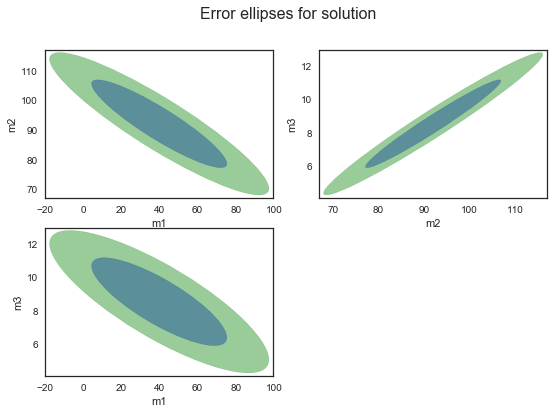

In [320]:
# ----------------------------------------------------------------------------
# Calculate covariance matrix from error distribution for each pair of solution parameters
# ----------------------------------------------------------------------------
        
CmProj01 = Cm[np.ix_([0,1],[0,1])]
CmProj02 = Cm[np.ix_([0,2],[0,2])]
CmProj12 = Cm[np.ix_([1,2],[1,2])]

l68 = np.sqrt(stats.chi2.ppf(q=0.68,df=2)) # number of standard deviations equivalent to 68% confidence ellipse
l95 = np.sqrt(stats.chi2.ppf(q=0.95,df=2)) # number of standard deviations equivalent to 95% confidence ellipse

fig = plt.figure(figsize=(9,6))
fig.suptitle("Error ellipses for solution", fontsize=16)

ax1 = plt.subplot("221")
plot_cov_ellipse(CmProj01,mls[0:2], ax=ax1,nstd=l68,color='Blue',alpha=0.4,label="68% Confidence")
plot_cov_ellipse(CmProj01,mls[0:2], ax=ax1,nstd=l95,color='Green',alpha=0.4,label="95% Confidence")
ax1.set_xlim(mls[0]-1.3*1.96*sig_param1,mls[0]+1.3*1.96*sig_param1)
ax1.set_ylim(mls[1]-1.3*1.96*sig_param2,mls[1]+1.3*1.96*sig_param2)
ax1.set_xlabel('m1')
ax1.set_ylabel('m2')

ax2 = plt.subplot("222")
plot_cov_ellipse(CmProj12,mls[1:], ax=ax2,nstd=l68,color='Blue',alpha=0.4,label='68% Confidence')
plot_cov_ellipse(CmProj12,mls[1:], ax=ax2,nstd=l95,color='Green',alpha=0.4,label='95% Confidence')
ax2.set_xlim(mls[1]-1.3*1.96*sig_param2,mls[1]+1.3*1.96*sig_param2)
ax2.set_ylim(mls[2]-1.3*1.96*sig_param3,mls[2]+1.3*1.96*sig_param3)
ax2.set_xlabel('m2')
ax2.set_ylabel('m3')

ax3 = plt.subplot("223")
plot_cov_ellipse(CmProj02,[mls[0],mls[2]], ax=ax3,nstd=l68,color='Blue',alpha=0.4,label='68% Confidence')
plot_cov_ellipse(CmProj02,[mls[0],mls[2]], ax=ax3,nstd=l95,color='Green',alpha=0.4,label='95% Confidence')
ax3.set_xlim(mls[0]-1.3*1.96*sig_param1,mls[0]+1.3*1.96*sig_param1)
ax3.set_ylim(mls[2]-1.3*1.96*sig_param3,mls[2]+1.3*1.96*sig_param3)
ax3.set_xlabel('m1')
ax3.set_ylabel('m3')

plt.show()

In [321]:
print(l68,l95)

1.50959218545 2.44774683068


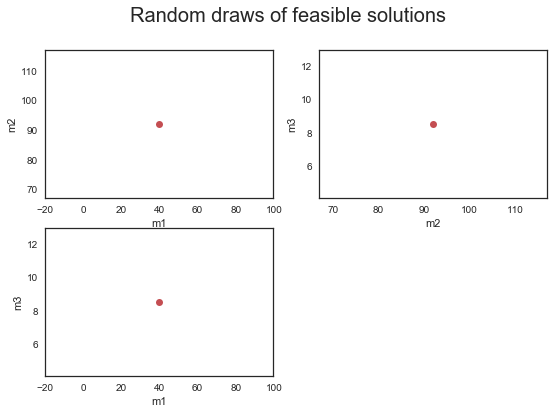

In [322]:
##########################
# Random draws of feasible solutions
##########################
fig = plt.figure(figsize=(9,6))
fig.suptitle("Random draws of feasible solutions", fontsize=20)

points = np.random.multivariate_normal(mean=mls, cov=Cm, size=500)

ax1 = plt.subplot("221")
xp, yp = points.T[0], points.T[1]
ax1.plot(xp, yp, 'k+')
ax1.plot(mls[0],mls[1], 'ro')
ax1.set_xlim(mls[0]-1.3*1.96*sig_param1,mls[0]+1.3*1.96*sig_param1)
ax1.set_ylim(mls[1]-1.3*1.96*sig_param2,mls[1]+1.3*1.96*sig_param2)
ax1.set_xlabel('m1')
ax1.set_ylabel('m2')

ax2 = plt.subplot("222")
xp, yp =  points.T[1], points.T[2]
ax2.plot(xp, yp, 'k+')
ax2.plot(mls[1],mls[2], 'ro')
ax2.set_xlim(mls[1]-1.3*1.96*sig_param2,mls[1]+1.3*1.96*sig_param2)
ax2.set_ylim(mls[2]-1.3*1.96*sig_param3,mls[2]+1.3*1.96*sig_param3)
ax2.set_xlabel('m2')
ax2.set_ylabel('m3')

ax3 = plt.subplot("223")
xp, yp =  points.T[0], points.T[2]
ax3.plot(xp, yp, 'k+')
ax3.plot(mls[0],mls[2], 'ro')
ax3.set_xlim(mls[0]-1.3*1.96*sig_param1,mls[0]+1.3*1.96*sig_param1)
ax3.set_ylim(mls[2]-1.3*1.96*sig_param3,mls[2]+1.3*1.96*sig_param3)
ax3.set_xlabel('m1')
ax3.set_ylabel('m3')

plt.show()


<img src="Figures/Slides/Pages from EMSC8023-B_2018-p33.png" alt="Slide" width="600"/>

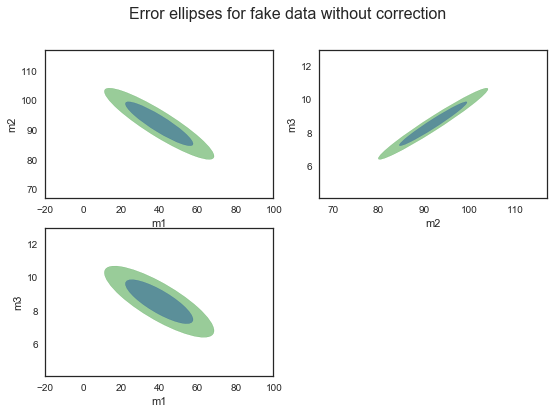

In [323]:
# ----------------------------------------------------------------------------
# Calculate covariance matrix from error distribution for each pair of solution parameters
# using fake data
# ----------------------------------------------------------------------------

fake = 1
if(fake):
    sigmay = 10.0 # Incorrect data errors
    Cdinv = np.eye(10)/(sigmay**2) # Inverse Data covariance matrix
    A = np.dot(np.transpose(G), Cdinv)
    GtG = np.dot(A, G) # G^T C_inv G^T
    GtGinv = np.linalg.inv(GtG) # Inverse of G^TC_inv G
    B = np.dot(A,yobs)
    mlsF = np.dot(GtGinv, B) # Least squares solution 
    Cm = GtGinv
    correct = 0 # rescale data errors so that chisq test is satisfied
    if(correct):
        r = yobs - np.dot(G,mlsF)
        A = np.dot(np.transpose(r), Cdinv)
        chisqF = np.dot(A, r) # Calculate raw Chi-square 6.3049
        nu = stats.chi2.ppf(q = 0.5, df = ndata-3)
        factor = np.sqrt(chisqF/(nu))
        Cdinv = Cdinv/(factor**2)
        A = np.dot(np.transpose(G), Cdinv)
        GtG = np.dot(A, G) # G^T C_inv G^T
        GtGinv = np.linalg.inv(GtG) # Inverse of G^TC_inv G
        B = np.dot(A,yobs)
        mls = np.dot(GtGinv, B) # Least squares solution 
        Cm = GtGinv
        
CmProj01 = Cm[np.ix_([0,1],[0,1])]
CmProj02 = Cm[np.ix_([0,2],[0,2])]
CmProj12 = Cm[np.ix_([1,2],[1,2])]

fig = plt.figure(figsize=(9,6))
if(correct):
    fig.suptitle("Error ellipses for fake data with correction", fontsize=16)
else:
    fig.suptitle("Error ellipses for fake data without correction", fontsize=16)   
ax1 = plt.subplot("221")
plot_cov_ellipse(CmProj01,mls[0:2], ax=ax1,nstd=l68,color='Blue',alpha=0.4,label="68% Confidence")
plot_cov_ellipse(CmProj01,mls[0:2], ax=ax1,nstd=l95,color='Green',alpha=0.4,label="95% Confidence")
#plt.legend(loc='upper right',framealpha=0.7)
ax1.set_xlim(mls[0]-1.3*1.96*sig_param1,mls[0]+1.3*1.96*sig_param1)
ax1.set_ylim(mls[1]-1.3*1.96*sig_param2,mls[1]+1.3*1.96*sig_param2)
ax1.set_xlabel('m1')
ax1.set_ylabel('m2')

ax2 = plt.subplot("222")
plot_cov_ellipse(CmProj12,mls[1:], ax=ax2,nstd=l68,color='Blue',alpha=0.4,label='68% Confidence')
plot_cov_ellipse(CmProj12,mls[1:], ax=ax2,nstd=l95,color='Green',alpha=0.4,label='95% Confidence')
#plt.legend(loc='upper left',framealpha=0.7)
ax2.set_xlim(mls[1]-1.3*1.96*sig_param2,mls[1]+1.3*1.96*sig_param2)
ax2.set_ylim(mls[2]-1.3*1.96*sig_param3,mls[2]+1.3*1.96*sig_param3)
ax2.set_xlabel('m2')
ax2.set_ylabel('m3')

ax3 = plt.subplot("223")
plot_cov_ellipse(CmProj02,[mls[0],mls[2]], ax=ax3,nstd=l68,color='Blue',alpha=0.4,label='68% Confidence')
plot_cov_ellipse(CmProj02,[mls[0],mls[2]], ax=ax3,nstd=l95,color='Green',alpha=0.4,label='95% Confidence')
#plt.legend(loc='upper right',framealpha=0.7)
ax3.set_xlim(mls[0]-1.3*1.96*sig_param1,mls[0]+1.3*1.96*sig_param1)
ax3.set_ylim(mls[2]-1.3*1.96*sig_param3,mls[2]+1.3*1.96*sig_param3)
ax3.set_xlabel('m1')
ax3.set_ylabel('m3')

plt.show()

<img src="Figures/Slides/Pages from EMSC8023-B_2018-p35.png" alt="Slide" width="600"/>

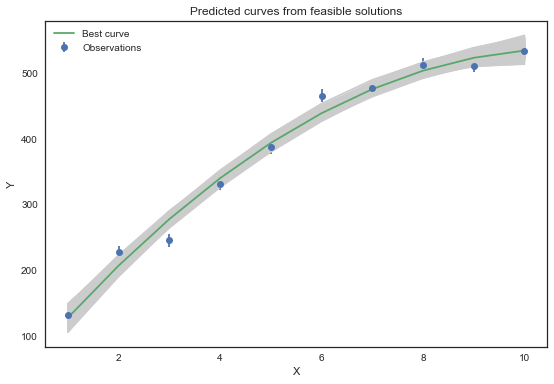

In [324]:
###########################
# Calculate and plot feasible curves
###########################

points = np.random.multivariate_normal(mean=mls, cov=Cm, size=500) # feasible sols
s = np.dot(G,np.transpose(points)) # feasible curves

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x,s,color=[0.8,0.8,0.8])
ax.errorbar(x,yobs,yerr=sigmay,fmt='o',color='b',label='Observations')
plt.title('Predicted curves from feasible solutions')
ax.plot(x, ypredicted2,label='Best curve',color='g')
plt.legend(loc='upper left',framealpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


# Iterative data fitting in a nonlinear problem

<img src="Figures/Slides/EMSC8023-B_2019-p49.png" alt="Slide" width="600"/>

Replicate the Earthquake location experiment on the previous slides by writing a python script to iteratively update an earthquake location for the $(x,y)$ and origin time, $t$.  Use a homogeneous crustal Earth model with wave speed, v=5.4 km/s. 

1. Read in 10 seismic stations at random locations on a +-30km box in (x,y) at the earth’s surface together with two sets of arrival times from the source to each station, one with noise added and one without.

2. Choose a random starting guess inside the box and determine expressions for each entry of the 10 x 4 Derivative matrix and build the G matrix. Build the data covariance matrix for independent Gaussian errors with $\sigma=0.2$

3. Apply the least squares iterative solution to both the noisy and noiseless data sets. Decide how many iterations to let it run for.

4. Make a plot showing the source location at each iteration for each case.

5. Make a table of the residuals vs iteration for each case.

Does the iterative algorithm converge to a good enough solution? 
How many iterations does it take? What happens if you put the starting solution far from the actual earthquake location? 

[  8.86547243   9.09302027   6.9279154   10.69150447   9.11983219
  11.78895899   9.03356859   8.39160884  12.07370787   7.97300653]
[  9.14459253   8.70367415   7.1194739   11.11061309   8.96014945
  11.85654727   8.61440445   7.93218703  12.1974068    7.79988459]
[[ 22.76694307  13.14192912   0.        ]
 [  1.52709247  17.7966829    0.        ]
 [  8.53391162  -2.49682959   0.        ]
 [-18.64629006  -4.89657554   0.        ]
 [ -9.69545476  -2.64995196   0.        ]
 [-10.94478206 -28.37779872   0.        ]
 [ 27.51649323  -8.22169114   0.        ]
 [ -3.61157822  -7.08185893   0.        ]
 [-19.24512197  22.44575154   0.        ]
 [  9.1671338   12.53175183   0.        ]]


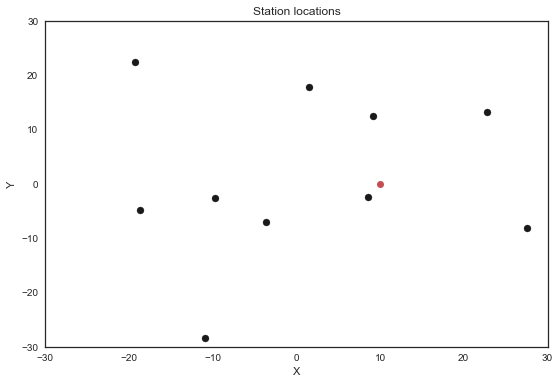

In [325]:
# Generate and write out data for earthquake exercise so that it can be read in by students
import pickle
nstations = 10
sta = np.hstack((np.random.uniform(-30,30,(nstations,2)),np.transpose([np.zeros(nstations)]))) # station co-ordinates

soltrue = np.array([10,0,10.,5.])
vel = 5.4
d = np.zeros(nstations)
for i in range(nstations):
    dx = sta[i,0]-soltrue[0]
    dy = sta[i,1]-soltrue[1]
    dz = sta[i,2]-soltrue[2]
    d[i] = np.sqrt(dx*dx+dy*dy+dz*dz)
tobs = soltrue[3] + d/vel
#print(t)
eps = np.random.normal(scale=0.2,size=np.shape(tobs))
tnoisy = tobs + eps
print(tobs)
print(tnoisy)
print(sta)

# write out data
pickling_on = open("eqdata.pickle","wb")
pickle.dump([tobs,tnoisy,sta], pickling_on)
pickling_on.close()

fig, ax = plt.subplots(figsize=(9,6))
plt.title('Station locations')
ax.scatter(sta.T[0],sta.T[1],color='k')
ax.plot(soltrue[0],soltrue[1],'ro')
plt.xlim(-30,30)
plt.ylim(-30,30)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

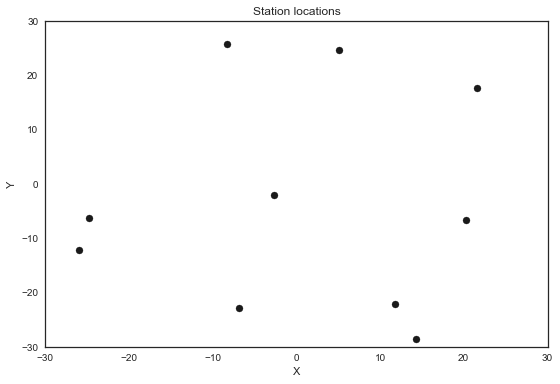

 tobs
 [  9.31979913  10.67036112   7.91562913  11.80824099  11.13594735
   9.50326285  10.56990629  12.26874052   9.99586708   8.01971903]
 tobsn
 [  9.14788778  10.69212619   7.90166076  11.8822169   11.07486658
   9.60494135  10.17896718  12.28384527  10.04709788   8.04154611]


In [326]:
# Read in eq data and plot
# Read in 10 seismic stations at random locations on a +-30km box in (x,y) at the earth’s surface together 
# with two sets of arrival times from the source to each station, one with noise added and one without.
import pickle
pickle_off = open("Datasets/eqdata.pickle","rb")
[tobs,tobsn,sta] = pickle.load(pickle_off)

fig, ax = plt.subplots(figsize=(9,6))
plt.title('Station locations')
ax.scatter(sta.T[0],sta.T[1],color='k')
plt.xlim(-30,30)
plt.ylim(-30,30)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print(' tobs\n',tobs)
print(' tobsn\n',tobsn)

In [327]:
###########################
# Iterative earthquake location example 
###########################
# Build a function to calculate the arrival times of seismic phases at all stations
# 
def calct_dummy(sol,sta):
    vel = 5.4
    tpred = np.zeros(len(sta))     # define distance matrix shape
    
    # put your answer in here
    
    return tpred
xsol = np.zeros([10,4])
xsol[0] = [-10.0, 5.0, 5.0, 0.0]     # choose starting guess
print(calct_dummy(xsol[0],sta))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [328]:
###########################
# Iterative earthquake location example 
###########################
# Build a function to calculate the arrival times of seismic phases at all stations
# 
def calct(sol,sta):
    vel = 5.4
    d = np.zeros(len(sta))     # define distance matrix shape
    for i in range(len(sta)):
        dx = sta[i,0]-sol[0]
        dy = sta[i,1]-sol[1]
        dz = sta[i,2]-sol[2]
        d[i] = np.sqrt(dx*dx+dy*dy+dz*dz)
    tpred = sol[3] + d/vel
    return tpred

xsol[0] = [-10.0, 5.0, 5.0, 0.0]     # choose starting guess
print(calct(xsol[0],sta))

[ 6.36875538  7.73122204  6.06424573  3.5749094   3.96318461  6.50441901
  5.26678321  4.43743521  4.66221918  2.08902684]


In [329]:
###########################
# Iterative earthquake location example 
########################### 
# Build derivative matrix G. Build the data covariance matrix with sigma=0.2

def calcG_dummy(sol,sta):
    vel = 5.4
    d = np.zeros(len(sta))     # define distance matrix shape
    G = np.zeros((len(sta),4)) # define G matrix shape
    
    # put your answer in here
    
    return G

xsol = np.zeros([10,4])
Cdinv = np.eye(len(tobs))/(0.2*0.2)
G = calcG_dummy(xsol[0],sta)
print('CD inverse \n',Cdinv)
print(' G matrix at initial guess \n',G)

CD inverse 
 [[ 25.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  25.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  25.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  25.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  25.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  25.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  25.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  25.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  25.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  25.]]
 G matrix at initial guess 
 [[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [330]:
###########################
# Iterative earthquake location example 
########################### 
# Build derivative matrix G. Build the data covariance matrix with sigma=0.2

def calcG(sol,sta):
    vel = 5.4
    d = np.zeros(len(sta))     # define distance matrix shape
    G = np.zeros((len(sta),4)) # define G matrix shape
    for i in range(len(sta)):
        dx = sta[i,0]-sol[0]
        dy = sta[i,1]-sol[1]
        dz = sta[i,2]-sol[2]
        d[i] = np.sqrt(dx*dx + dy*dy + dz*dz)
        G[i,0] = -dx/(d[i]*vel)
        G[i,1] = -dy/(d[i]*vel)
        G[i,2] = -dz/(d[i]*vel)
        G[i,3] = 1
    return G

xsol = np.zeros([10,4])
xsol[0] = [-10.0, 5.0, 5.0, 0.0]     # choose starting guess
Cdinv = np.eye(len(tobs))/(0.2*0.2)
G = calcG(xsol[0],sta)
print('CD inverse \n',Cdinv)
print(' G matrix at initial guess \n',G)

CD inverse 
 [[ 25.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  25.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  25.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  25.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  25.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  25.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  25.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  25.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  25.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  25.]]
 G matrix at initial guess 
 [[-0.17022044 -0.06777678  0.02692328  1.        ]
 [-0.10746168  0.14917657  0.02217861  1.        ]
 [-0.17084179  0.06562888  0.0282752   1.        ]
 [ 0.14204227  0.10870593  0.04796423  1.        ]
 [-0.01461162 -0.17946638  0.04326515  1.        ]
 [-0.11485748  0.14285087  0.02636173  1.        ]
 [-0.02051303  0.18114316  0.03255645  1.        ]
 [ 0.12329113  0.1326639   0.03864119  1.        ]
 [-0.1106354  -0.14

In [331]:
###########################
# Iterative earthquake location example 
###########################
# Apply the least squares iterative solution to 
# both the noisy and noiseless data sets. Decide how many iterations to let it run for.
# 
nit = 8 # number of iterations
t = tobs
r = []
for it in range(nit): # loop over number of iterations
    # calculate travel times of current guess
    
    tpred = calct( xsol[it],sta) # calculate predicted travel times from current location
    G = calcG(xsol[it],sta)      # calculate new G matrix for current location
    residuals = t-tpred       # calculate residuals between observed and predicted travel times
    chisq =np.dot(residuals.T,np.dot(Cdinv,residuals))
    print(' Iteration ',it,'Chisq ',chisq,' Current location','{:7.4f} {:7.4f} {:7.4f} {:7.4f}'.format(*tuple(xsol[it])))
    r = np.append(r,residuals)
    
    A = np.dot(np.transpose(G), Cdinv)
    GtG = np.dot(A, G) # G^T C_inv G^T
    GtGinv = np.linalg.inv(GtG) # Inverse of G^TC_inv G
    B = np.dot(GtGinv,A) # Least squares operator 
    dm = np.dot(B,residuals) # find update to location solution  
    #print(dm)
    xsol[it+1] = xsol[it] + dm
r = r.reshape(nit,len(sta))
xsoln = np.copy(xsol)

 Iteration  0 Chisq  7551.93810416  Current location -10.0000  5.0000  5.0000  0.0000
 Iteration  1 Chisq  8175.9467818  Current location  7.2964  0.0939 56.2699  4.3022
 Iteration  2 Chisq  45485.3367711  Current location 11.6318 -0.3964 -39.5440 14.7275
 Iteration  3 Chisq  2932.63066721  Current location  7.5237  0.1828  7.5830  8.6767
 Iteration  4 Chisq  0.261699223005  Current location  9.8358  0.0074  9.9300  5.0408
 Iteration  5 Chisq  1.93880564845e-06  Current location  9.9995  0.0000 10.0000  5.0001
 Iteration  6 Chisq  8.37464450485e-17  Current location 10.0000  0.0000 10.0000  5.0000
 Iteration  7 Chisq  7.88860905221e-29  Current location 10.0000  0.0000 10.0000  5.0000


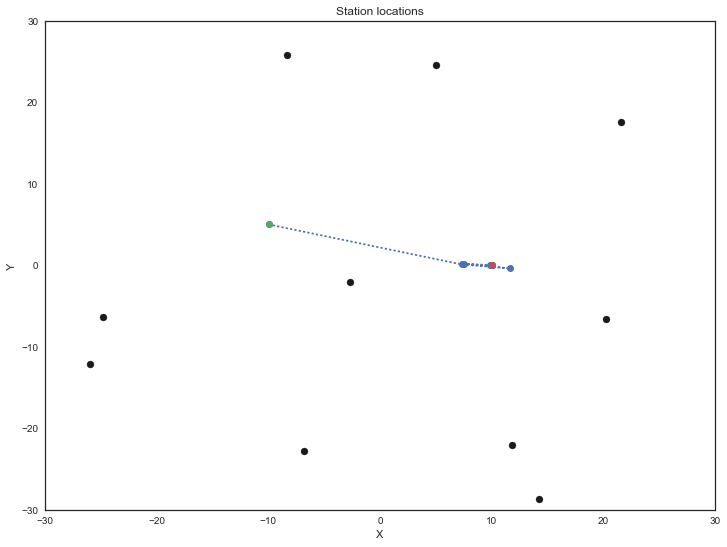

In [332]:
###########################
# Iterative earthquake location example 
###########################
# Make a plot showing the source location at each iteration for each case.

fig, ax = plt.subplots(figsize=(12,9))
plt.title('Station locations')
ax.scatter(sta.T[0],sta.T[1],color='k')
#plt.plot(xsol.T[0][:nit],xsol.T[1][:nit],'go:') # plot convergence of noiseless solution
#plt.plot(xsol.T[0][nit],xsol.T[1][nit],'ro')    
plt.plot(xsoln.T[0][:nit],xsoln.T[1][:nit],'bo:') # plot convergence of noisy solution
plt.plot(xsoln.T[0][nit],xsoln.T[1][nit],'ro')
plt.plot(xsoln.T[0][0],xsoln.T[1][0],'go')
plt.xlim(-30,30)
plt.ylim(-30,30)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



In [333]:
###########################
# Iterative earthquake location example 
###########################
# Make a table of the residuals vs iteration for each case.

print('\nStation arrival time residuals for each iteration\n')
print('         ',('{:7d} '*nit).format(*range(nit)))
for i in range(len(sta)):
   print('Station ',i,('{:7.4f} '*nit).format(*tuple(r.T[i])))



Station arrival time residuals for each iteration

                0       1       2       3       4       5       6       7 
Station  0  2.9510 -6.2121 -13.6620 -3.7348 -0.0495 -0.0001 -0.0000  0.0000 
Station  1  2.9391 -5.4016 -13.0680 -3.6617 -0.0421 -0.0001 -0.0000  0.0000 
Station  2  1.8514 -7.1496 -14.3929 -3.7730 -0.0530 -0.0002 -0.0000  0.0000 
Station  3  8.2333 -4.5499 -12.9377 -3.1353 -0.0087 -0.0000 -0.0000  0.0000 
Station  4  7.1728 -4.9770 -13.1148 -3.2828 -0.0191 -0.0000 -0.0000  0.0000 
Station  5  2.9988 -6.0310 -13.5772 -3.6021 -0.0391 -0.0001 -0.0000  0.0000 
Station  6  5.3031 -5.2845 -13.2451 -3.3223 -0.0206 -0.0000 -0.0000  0.0000 
Station  7  7.8313 -4.3482 -12.7942 -3.1633 -0.0101 -0.0000 -0.0000  0.0000 
Station  8  5.3336 -5.6768 -13.4766 -3.4308 -0.0293 -0.0001 -0.0000  0.0000 
Station  9  5.9307 -6.8739 -14.5040 -3.0522 -0.0093 -0.0000 -0.0000  0.0000 


# Monte Carlo Method exercises

<img src="Figures/Slides/Pages from EMSC8023-B_2018-p46.png" alt="Slide" width="600"/>

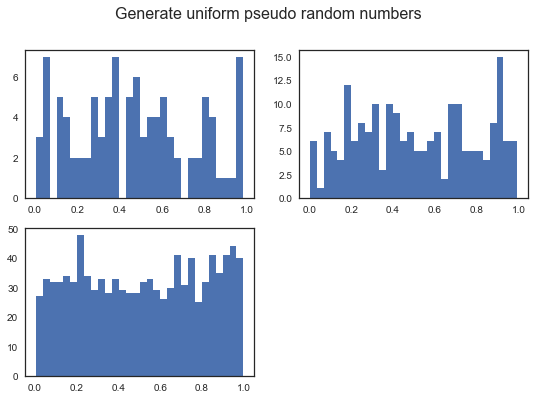

In [334]:
# Generate uniform pseudo random number
#######################
np.random.seed(61254557)
######################

x1=np.random.rand(100)
x2=np.random.rand(200)
x3=np.random.rand(1000)

fig = plt.figure(figsize=(9,6))
fig.suptitle("Generate uniform pseudo random numbers", fontsize=16)

ax1 = plt.subplot("221")
ax1.hist(x1,30)

ax2 = plt.subplot("222")
ax2.hist(x2,30)

ax3 = plt.subplot("223")
ax3.hist(x3,30)

plt.show()

<img src="Figures/Slides/Pages from EMSC8023-B_2018-p47.png" alt="Slide" width="600"/>

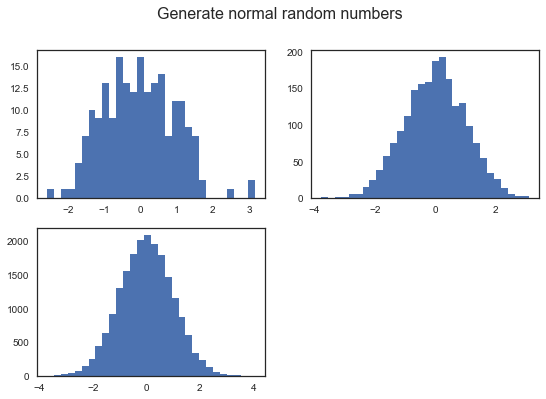

In [335]:
###############################
# Generate normal random deviates
###############################
y1=np.random.randn(200) # normal random number
y2=np.random.randn(2000) 
y3=np.random.randn(20000) 

fig = plt.figure(figsize=(9,6))
fig.suptitle("Generate normal random numbers", fontsize=16)

ax1 = plt.subplot("221")
ax1.hist(y1,30)

ax2 = plt.subplot("222")
ax2.hist(y2,30)

ax3 = plt.subplot("223")
ax3.hist(y3,30)

plt.show()

<img src="Figures/Slides/Pages from EMSC8023-B_2018-p49.png" alt="Slide" width="600"/>

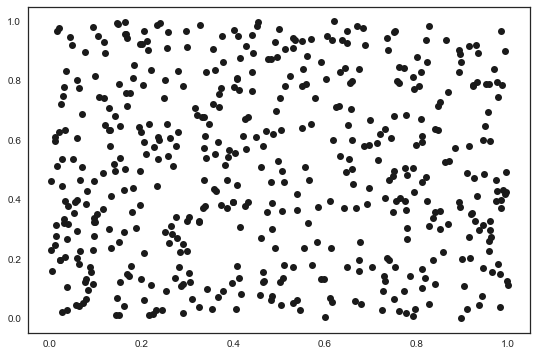

In [336]:
######################
# Generate 2-D pseudo random deviates 
######################
x=np.random.rand(500)
y=np.random.rand(500)
fig = plt.figure(figsize=(9,6))
plt.plot(x,y,'ko')
plt.show()

<img src="Figures/Slides/Pages from EMSC8023-B_2018-p51.png" alt="Slide" width="600"/>

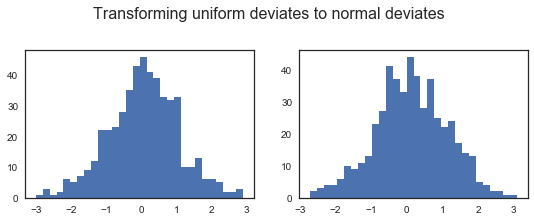

In [337]:
######################
# Transforming random variables
######################

z1=np.sqrt(-2.0*np.log(y))*np.sin(2.0*math.pi*x)
z2=np.sqrt(-2.0*np.log(y))*np.cos(2.0*math.pi*x)

fig = plt.figure(figsize=(9,6))
fig.suptitle("Transforming uniform deviates to normal deviates", fontsize=16)

ax1 = plt.subplot("221")
ax1.hist(z1,30)

ax2 = plt.subplot("222")
ax2.hist(z2,30)

plt.show()

<img src="Figures/Slides/Pages from EMSC8023-B_2018-p53.png" alt="Slide" width="600"/>

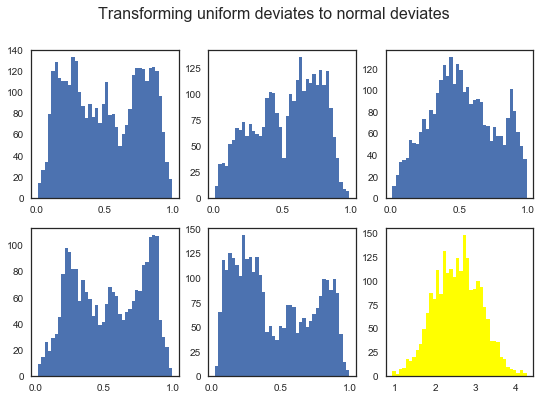

In [338]:
####################
# Test the central limit theorem 
####################

pdfdata=sio.loadmat('Datasets/pdfdata.mat')
p1=pdfdata['p1']
p2=pdfdata['p2']
p3=pdfdata['p3']
p4=pdfdata['p4']
p5=pdfdata['p5']

rd1=rj.rejectmethod(p1,5000)
rd2=rj.rejectmethod(p2,5000)
rd3=rj.rejectmethod(p3,5000)
rd4=rj.rejectmethod(p4,5000)
rd5=rj.rejectmethod(p5,5000)

a= [len(rd1),len(rd2),len(rd3),len(rd4),len(rd5)]
m=min(a)
asum=rd1[:m]+rd2[:m]+rd3[:m]+rd4[:m]+rd5[:m]

fig = plt.figure(figsize=(9,6))
fig.suptitle("Transforming uniform deviates to normal deviates", fontsize=16)

ax1 = plt.subplot("231")
ax1.hist(rd1,40)

ax2 = plt.subplot("232")
ax2.hist(rd2,40)

ax3 = plt.subplot("233")
ax3.hist(rd3,40)

ax4 = plt.subplot("234")
ax4.hist(rd4,40)

ax5 = plt.subplot("235")
ax5.hist(rd5,40)

ax6 = plt.subplot("236")
ax6.hist(asum,40,color=['yellow'])

plt.show()     

<img src="Figures/Slides/Pages from EMSC8023-B_2018-p63.png" alt="Slide" width="600"/>

# Earthquake location and uncertainty via Monte Carlo Error Propagation

Location 7.55434044946 47.2193491792 -10.0
Event time (seconds after 16:30) 40.1000769825


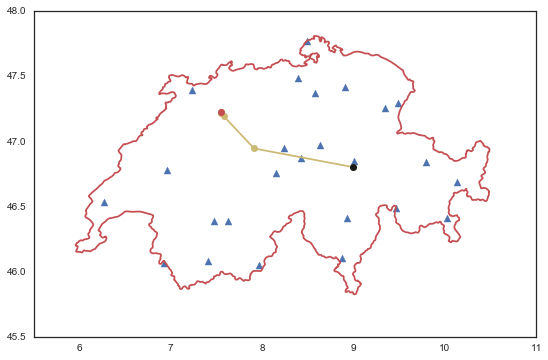

In [339]:
############
#    eloc
#############
with open('Datasets/loctim.txt') as f:
    Lines=f.read().splitlines()  
     
la, lo, el, ts =[],[],[],[]

for i in range(len(Lines)):
    la.append(float(Lines[i].split()[0]))
    lo.append(float(Lines[i].split()[1]))
    el.append(float(Lines[i].split()[2]))
    ts.append(float(Lines[i].split()[3]))

la,lo,el,ts =np.array(la), np.array(lo), np.array(el), np.array(ts)

vp,tol=5.8, [0.01,0.01]

# load border.xy
border1, border2 =[], []

with open('Datasets/border.xy') as f1:
    border=f1.read().splitlines()  
for i in range(len(border)):
    border1.append(float(border[i].split()[0]))
    border2.append(float(border[i].split()[1]))

border1=np.array(border1)
border2=np.array(border2)

######## Start guess for location
x0=9
y0=46.8
z0=-10
######## locate earthquake
sols, res =eq.eqlocate(x0,y0,z0,ts,la,lo,el,vp,tol)

numit = len(sols)
tfinal = sols[numit-1,0]
xfinal = sols[numit-1,1]
yfinal = sols[numit-1,2]
zfinal = sols[numit-1,3]

print ('Location', xfinal,yfinal,zfinal)
print ('Event time (seconds after 16:30)',tfinal)

plt.figure(figsize=(9,6))
plt.plot(border1,border2,'r-')
plt.scatter(lo,la,s=50,marker='^')
plt.plot(sols[:,1],sols[:,2],'o-y') # solution updates
plt.plot(sols[0,1],sols[0,2],'ok') # initial guess
plt.plot(xfinal,yfinal,'or')
plt.xlim([5.5,11])
plt.ylim([45.5,48])
plt.show()


<img src="Figures/Slides/Pages from EMSC8023-B_2018-p65.png" alt="Slide" width="600"/>

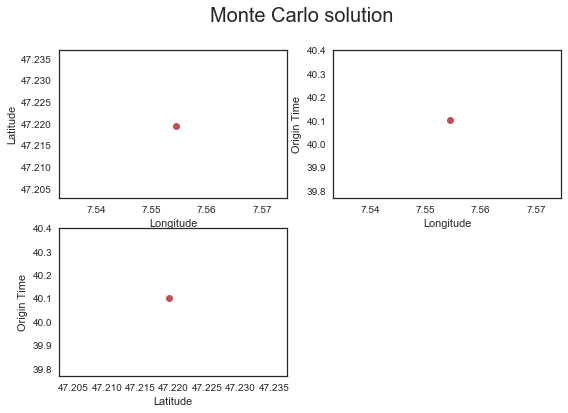

In [340]:
##############
#    Then use Monte Carlo error propagation to calculate confidence ellipses
##############
import numpy as np
with open('Datasets/loctim.txt') as f:
    Lines=f.read().splitlines()  
     
la,lo,el,ts=[],[],[],[]

for i in range(len(Lines)):
    la.append(float(Lines[i].split()[0]))
    lo.append(float(Lines[i].split()[1]))
    el.append(float(Lines[i].split()[2]))
    ts.append(float(Lines[i].split()[3]))

la,lo,el,ts=np.array(la), np.array(lo), np.array(el), np.array(ts)

vp, tol =5.8, [0.01,0.01]

######## Start guess for location
x0=9
y0=46.8
z0=-10

ndata,n,sigma =len(la), 5000, 0.2

MCsols=[]
for i in range(n):
    tsMC= ts +sigma*np.random.randn(ndata)
    sols,res=eq.eqlocate(x0,y0,z0,tsMC,la,lo,el,vp,tol)
    MCsols.append(sols[-1,:])
MCsols=np.array(MCsols)    
sols,res=eq. eqlocate(x0,y0,z0,ts,la,lo,el,vp,tol)

fig = plt.figure(figsize=(9,6))
fig.suptitle("Monte Carlo solution", fontsize=20)

ax1 = plt.subplot("221")
ax1.plot(MCsols[:,1],MCsols[:,2], 'k+')
ax1.plot(sols[-1,1],sols[-1,2], 'ro')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

ax2 = plt.subplot("222")
ax2.plot(MCsols[:,1],MCsols[:,0], 'k+')
ax2.plot(sols[-1,1],sols[-1,0], 'ro')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Origin Time')

ax3 = plt.subplot("223")
ax3.plot(MCsols[:,2],MCsols[:,0], 'k+')
ax3.plot(sols[-1,2],sols[-1,0], 'ro')
ax3.set_xlabel('Latitude')
ax3.set_ylabel('Origin Time')

plt.show()

In [341]:
###### Calculate covariance solutions
Cm_cov= np.cov(MCsols.T)
Cm_std= np.std(MCsols,axis=0)
print('Monte Carlo estimate of model covariance matrix\n',Cm_cov)
print('\n Monte Carlo estimate of model standard deviations in each parameter')
print('Parameter 1: ',Cm_std[0])
print('Parameter 2: ',Cm_std[1])
print('Parameter 3: ',Cm_std[2])

Monte Carlo estimate of model covariance matrix
 [[  4.79785495e-03   2.59900197e-04  -2.03182147e-04   0.00000000e+00]
 [  2.59900197e-04   3.00220259e-05  -8.49478951e-06   0.00000000e+00]
 [ -2.03182147e-04  -8.49478951e-06   2.06425953e-05   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]]

 Monte Carlo estimate of model standard deviations in each parameter
Parameter 1:  0.0692596230167
Parameter 2:  0.00547868793399
Parameter 3:  0.0045429579313


# Bootstrap methods for error propagation

Using the bootstrap on the mean of some data

<img src="Figures/Slides/Pages from EMSC8023-B_2018-p73.png" alt="Slide" width="600"/>

In [342]:
#################
# Calculate the error in the mean estimator
#################
ndata, xtrue, xsigma =10, 10.0, 3.0
 
data=np.ones(10)*xtrue+xsigma*np.random.randn(ndata)
f=np.mean(data)
xboot=[]

for i in range(1000):
    datara=[]
    for j in range(ndata):
        ra=int(ndata*np.random.rand())
        datara.append(data[ra])
    datara=np.array(datara)
    xboot.append(np.mean(datara))
xboot=np.array(xboot)    
xmean=np.mean(xboot)
stdx=np.std(xboot)
boot=xmean-f
fcorr=f-boot  
print('Original estimator        : ',f)
print('Bootstrap mean            : ',xmean)
print('Bootstrap error estimate  : ',stdx)
print('Bootstrap correction      : ',boot)
print('Unbiased estimate of mean : ',fcorr)
print(data)

Original estimator        :  9.57349836261
Bootstrap mean            :  9.55315374053
Bootstrap error estimate  :  1.21364453796
Bootstrap correction      :  -0.0203446220808
Unbiased estimate of mean :  9.59384298469
[  6.28965654  13.1535208   10.1377564   11.13679178  11.71817724
   3.96789699  15.57456783  10.47037246   9.98168384   3.30455974]


### Using the bootstrap to estimate the errors in earthquake location


<img src="Figures/Slides/Pages from EMSC8023-B_2018-p75.png" alt="Slide" width="600"/>

Bootstrap mean of estimator [ 40.09585217   7.55428877  47.2193201  -10.        ]
Bootstrap standard deviation of estimator [ 0.14983984  0.01185465  0.00975958  0.        ]
Bootstrap Covariance matrix [[  2.24564700e-02   1.21216352e-03  -9.59827785e-04   0.00000000e+00]
 [  1.21216352e-03   1.40560731e-04  -3.88532480e-05   0.00000000e+00]
 [ -9.59827785e-04  -3.88532480e-05   9.52683830e-05   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]]


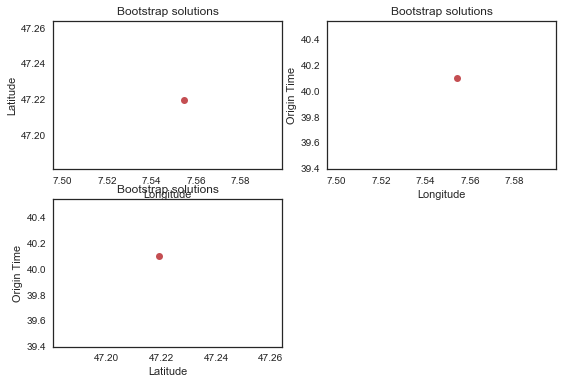

In [343]:
#################
# Calculate Bootstrap error propagation
#################
import numpy as np
#import eqlocate as eq
from inversionCourse import eqlocate as eq

with open('Datasets/loctim.txt') as f:
    Lines=f.read().splitlines()  

la, lo, el, ts =[],[],[],[]

for i in range(len(Lines)):
    la.append(float(Lines[i].split()[0]))
    lo.append(float(Lines[i].split()[1]))
    el.append(float(Lines[i].split()[2]))
    ts.append(float(Lines[i].split()[3]))
    
la,lo,el,ts =np.array(la), np.array(lo), np.array(el), np.array(ts)

vp=5.8
tol=[0.01,0.01] # Earth model and location tolerances

x0, y0, z0 =9, 46.8, -10.0 # Starting guess solution

ndata, n =len(la), 5000

sols0, res0=eq.eqlocate(x0,y0,z0,ts,la,lo,el,vp,tol) # locate quake

Bsols=[]
for i in range(n):
    Bootres=[]
    for j in range(ndata):
        Bootres.append(res0[int(ndata*np.random.rand())])
    bootres=np.array(Bootres)
    tsB=ts+bootres
    sols,res=eq.eqlocate(x0,y0,z0,tsB,la,lo,el,vp,tol)
    Bsols.append(sols[-1])

Bsols=np.array(Bsols)
Bmean=np.mean(Bsols,axis=0)         
Bstd=np.std(Bsols,axis=0)
Bcov=np.cov(np.transpose(Bsols))       

print('Bootstrap mean of estimator',Bmean)
print('Bootstrap standard deviation of estimator',Bstd)
print('Bootstrap Covariance matrix',Bcov)

BCsol=sols0[-1:]-(Bmean-sols0[-1:])         

fig = plt.figure(figsize=(9,6))

ax1 = plt.subplot("221")
ax1.plot(Bsols[:,1],Bsols[:,2],'k+')
ax1.plot(sols0[-1,1],sols0[-1,2],'ro')
ax1.plot(BCsol[0][1],BCsol[0][2],'g+')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('Bootstrap solutions')

ax2 = plt.subplot("222")
ax2.plot(Bsols[:,1],Bsols[:,0],'k+')
ax2.plot(sols0[-1,1],sols0[-1,0],'ro')
ax2.plot(BCsol[0][1],BCsol[0][0],'g+')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Origin Time')
ax2.set_title('Bootstrap solutions')

ax3 = plt.subplot("223")
ax3.plot(Bsols[:,2],Bsols[:,0],'k+',label=' Bootstrap solutions')
ax3.plot(sols0[-1,2],sols0[-1,0],'ro',label=' Original solution')
ax3.plot(BCsol[0][2],BCsol[0][0],'g+',label=' Bootstrap corrected solution')
ax3.set_xlabel('Latitude')
ax3.set_ylabel('Origin Time')
ax3.set_title('Bootstrap solutions')

plt.show()

# Extended practicals

Each of the following problems illustrate an example of parameter
estimation, Goodness of ft tests, Linear error propagation, Monte Carlo
error propagation, and Bayesian sampling. Each requires you to write
some computer code, or run code already written. We’ll focus on doing
them with Python, using the Jupyter server set up for the class.

## Practical problem 1. Fitting a curve to noisy data

Imagine that you have a parameter estimation problem where you wish to
fit the following function to some observations of
$x_i, y_i, (i=1\dots,N)$

$$ y(x) = \frac{1}{100}\left[ \frac{m_1}{5} + \frac{m_2}{5}x +\frac{m_3}{16}(x^2 + 1600\sin(\frac{x}{2\pi})) \right ]. $$

<img src="Figures/Example-data-curve.png" alt="Example of test data for regression problem with true curve (blue). Here the $x$ values are generated uniformly randomly between 0 and 120, while the $y$ values are equal to the curve height plus a Gaussian random error with $\sigma_y = 0.75$, i.e. $y_{obs} = y_{true} + \epsilon$, where $\epsilon \sim N(0, \sigma_y^2)$." width="600"/>

Figure 1. Example of test data for regression problem with true curve (blue). Here the $x$ values are generated uniformly randomly between 0 and 120, while the $y$ values are equal to the curve height plus a Gaussian random error with $\sigma_y = 0.75$, i.e. $y_{obs} = y_{true} + \epsilon$, where $\epsilon \sim N(0, \sigma_y^2)$.

In Figure 1 I have used $m_1 = m_2 = m_3 = 1.0$ to generate the true curve.

### Tasks to complete:

**Original Task 1**  Read in the data and generate 12 data similar to
    Figure 1 and plot them. To do this you should generate
    your x values uniformly randomly over the range (0,120) and then
    calculate $y$ values using the above expression. Add Gaussian random noise
    to your $y$ values with standard deviation, $\sigma_y,$ that you
    choose. Plot the true curve with the data similar to Figure1. This
    is the test data for your problem.

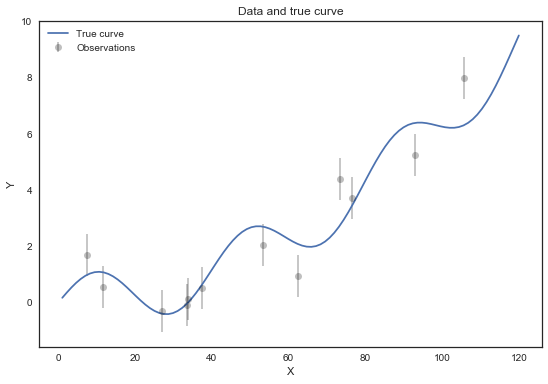

In [344]:
# script to generate and plot data
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math
import pickle
from inversionCourse import plotcovellipse as pc

xmin, xmax, nres = 1.0, 120.0, 100
#
# set up true model and synthetic observations
#
m = [ 1.0, 1.0, 1.0] # solution
ndata = 12
x_true = np.linspace(xmin, xmax, nres)
G_true = np.transpose([np.ones(len(x_true))/500., x_true/500., 0.5*x_true*x_true/800.+1.0*np.sin(x_true/(2.0*np.pi)),]) # G matrix
y_true = np.dot(G_true,m) # true model

xobs =  np.sort(np.random.uniform(xmin,xmax,ndata)) # Uniform random x positions of observations
G = np.transpose([np.ones(len(xobs))/500., xobs/500., 0.5*xobs*xobs/800.+1.0*np.sin(xobs/(2.0*np.pi)),]) # G matrix
sigmay = 0.75
yobs = np.dot(G,m) + sigmay*np.random.randn(ndata) # true model
#
# write out data
pickling_on = open("data_fitting.pickle","wb")
pickle.dump([yobs,xobs,x_true,y_true], pickling_on)
pickling_on.close()

# ----------------------------------------------------------------------------   
# plot data
# ----------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(9,6))

ax.plot(x_true, y_true,label='True curve',color='b')
ax.errorbar(xobs,yobs,yerr=sigmay,fmt='o',color=(0, 0, 0, 0.25),label='Observations')
plt.legend(loc='upper left',framealpha=0.7)
plt.title('Data and true curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Tasks to complete:

**Alternative Task 1**  Read in the 12 data for this problem and assume that the y errors are Gaussian random with $\sigma_y = 0.75$. Generate a plot similar to
    Figure 1. Read in the data for the true curve as well and plot the true curve with the data similar to Figure 1. This
    is the test data for your problem.

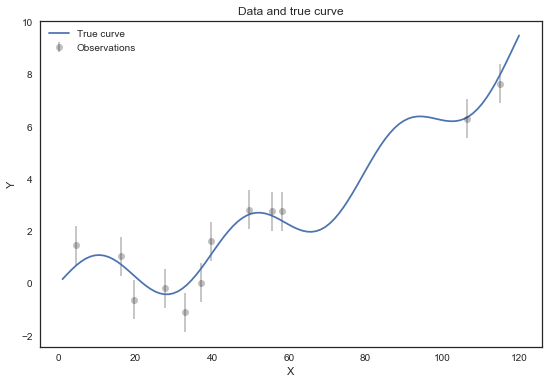

In [345]:
# Write your answer in here
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math
import pickle
from inversionCourse import plotcovellipse as pc

xmin, xmax, nres = 1.0, 120.0, 100
#
# read in observations
#
pickle_off = open("Datasets/data_fitting.pickle","rb")
[yobs,xobs,x_true,y_true] = pickle.load(pickle_off)
sigmay = 0.75

# ----------------------------------------------------------------------------   
# plot data
# ----------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(9,6))

ax.plot(x_true, y_true,label='True curve',color='b')
ax.errorbar(xobs,yobs,yerr=sigmay,fmt='o',color=(0, 0, 0, 0.25),label='Observations')
plt.legend(loc='upper left',framealpha=0.7)
plt.title('Data and true curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

**Task 2** We want to estimate the parameters $(m_1, m_2, m_3)$ from the
    observations. This problem can be written in vector form as
    ${\bf d} = G {\bf m}$. Describe what are ${\bf d}$, ${\bf m}$ and
    $G$ for this problem? What dimensions does the $G$ matrix have? Is
    this a linear or nonlinear parameter estimation problem? The G matrix can be used to find the $y$ values of the curve from the $x$ values and the $m$ parameters, through ${\bf d} = G {\bf m}$ 

Calculate
    the $G$ matrix for this problem corresponding to the 12 $x$ values of the data and a second G matrix corresponding to 121 $x$ values uniformly randomly over the range (0,120).


In [346]:
# Write your answer in here
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math
import pickle
from inversionCourse import plotcovellipse as pc

# Calculate G_true
G_true = np.transpose([np.ones(len(x_true))/500., x_true/500., 0.5*x_true*x_true/800.+1.0*np.sin(x_true/(2.0*np.pi)),])
G = np.transpose([np.ones(len(xobs))/500., xobs/500., 0.5*xobs*xobs/800.+1.0*np.sin(xobs/(2.0*np.pi)),]) # G matrix
# G matrix


**Task 3**  Use the $G$ matrix and your data to estimate a least squares
    solution for the parameters $(m_1,m_2,m_3)$. Calculate the curve
    that this solution predicts and plot it with the data with its
    errors and the true curve.

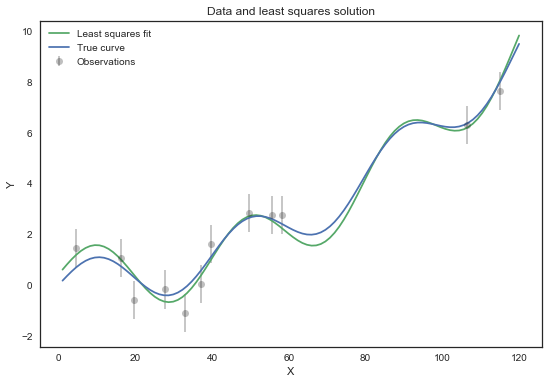

 Best fit solution =  [ 208.4233955    -8.86657557    1.24702922]


In [347]:
# Write your answer in here
sigmay = 0.75 # Standard deviation of noise
ndata = len(yobs) # Number of data

Cdinv = np.eye(ndata)/(sigmay**2) # Inverse Data covariance matrix

A = np.dot(np.transpose(G), Cdinv)
GtG = np.dot(A, G) # G^T C_inv G^T
GtGinv = np.linalg.inv(GtG) # Inverse of G^TC_inv G
B = np.dot(A,yobs)
mls = np.dot(GtGinv, B) # Least squares solution 
     
ypredicted = np.dot(G_true,mls) # predicted y values from least squares solution

# plot data estimated solution with data

fig, ax = plt.subplots(figsize=(9,6))

ax.plot(x_true, ypredicted,label='Least squares fit',color='g')
ax.plot(x_true, y_true,label='True curve',color='b')
ax.errorbar(xobs,yobs,yerr=sigmay,fmt='o',color=(0, 0, 0, 0.25),label='Observations')
plt.legend(loc='upper left',framealpha=0.7)
plt.title('Data and least squares solution')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print(' Best fit solution = ',mls)


**Task 4**  
Calculate the Chi-square value for this problem. Is this a good
        enough fit to data? Calculate the p-value for this goodness of
        fit. What do you conclude from the p-value?

Repeat the calculation with the noise error, $\sigma_y=0.25$.
        How would this change the Chi-square and p-value? What would you
        conclude in this case?

Repeat the calculation with the noise error, $\sigma_y=2.25$.
        How would this change the Chi-square and p-value? What would you
        conclude in this case?

In [348]:
# Write your answer in here

# ----------------------------------------------------------------------------
# Goodness of fit
# ----------------------------------------------------------------------------

r = yobs - np.dot(G,mls)
A = np.dot(np.transpose(r), Cdinv)
chisq = np.dot(A, r) # Calculate raw Chi-square 6.3049

print("\nChi-square value: {:10.6f}".format(chisq))

crit5 = stats.chi2.ppf(q = 0.05, # Find the critical value for 95% confidence*
                      df = ndata-3)   # Df = number of variable categories - 1
crit50 = stats.chi2.ppf(q = 0.5, # Find the critical value for 95% confidence*
                      df = ndata-3)   # Df = number of variable categories - 1
crit95 = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = ndata-3)   # Df = number of variable categories - 1

# case A
print("Critical values for Chi-square")

print("  5% {:7.3f} \n 50% {:7.3f} \n 95% {:7.3f} \n".format(crit5,crit50,crit95))

p_value = 1 - stats.chi2.cdf(x=chisq,  # Find the p-value
                             df=ndata-3)
print(" P value for observed Chi-square: {:7.4f} \n".format(p_value))



Chi-square value:   5.125326
Critical values for Chi-square
  5%   3.325 
 50%   8.343 
 95%  16.919 

 P value for observed Chi-square:  0.8232 



In [349]:
# case B 
sigmay = 0.25 # Standard deviation of noise
Cdinv = np.eye(ndata)/(sigmay**2) # Inverse Data covariance matrix
print(' Data sigma =',sigmay)
chisq = np.dot(np.dot(np.transpose(r), Cdinv), r) # Calculate new Chi-square 
print("\n Chi-square value: {:10.6f}".format(chisq))
p_value = 1 - stats.chi2.cdf(x=chisq,  # Find the p-value
                             df=ndata-3)
print(" P value for observed Chi-square: ",p_value)
# data errors are too small. Unlikely large Chi-square due to random chance

 Data sigma = 0.25

 Chi-square value:  46.127931
 P value for observed Chi-square:  5.70157896451e-07


In [350]:
# case C
sigmay = 2.25 # Standard deviation of noise
Cdinv = np.eye(ndata)/(sigmay**2) # Inverse Data covariance matrix
print(' Data sigma =',sigmay)
chisq = np.dot(np.dot(np.transpose(r), Cdinv), r) # Calculate new Chi-square 
print("\n Chi-square value: {:10.6f}".format(chisq))
p_value = 1 - stats.chi2.cdf(x=chisq,  # Find the p-value
                             df=ndata-3)
print(" P value for observed Chi-square: ",p_value)
# data errors are too large. Unlikely small Chi-square due to random chance

 Data sigma = 2.25

 Chi-square value:   0.569481
 P value for observed Chi-square:  0.999946863157


**Task 5**  Calculate model covariance matrix for the problem and from this find
    the 95% confidence intervals for each parameter $m_1, m_2$ and
    $m_3$. Calculate the model correlation matrix. Do you see any
    significant trade-off in the model parameter errors? Plot the
    confidence ellipses for the $(m_1, m_2)$, $(m_2, m_3)$ and
    $(m_1, m_3)$ planes. How do any trade-offs you observed in the model
    covariance matrix manifest themselves in the plots of the covariance
    matrix?

Covariance matrix
 [[  6.68612564e+04  -2.12555457e+03   4.51997063e+01]
 [ -2.12555457e+03   9.50982919e+01  -2.36870998e+00]
 [  4.51997063e+01  -2.36870998e+00   6.68547844e-02]]

Correlation matrix
 [[ 1.         -0.84294382  0.67605511]
 [-0.84294382  1.         -0.93941888]
 [ 0.67605511 -0.93941888  1.        ]]

 Solution and 95% Confidence intervals 
 Parameter 1 208.423 [-298.384, 715.231]
 Parameter 2  -8.867 [-27.980,  10.247]
 Parameter 3   1.247 [  0.740,   1.754]
 Number of standard deviations for 68% Conf ellipse =  1.50959218545
 Number of standard deviations for 95% Conf ellipse =  2.44774683068


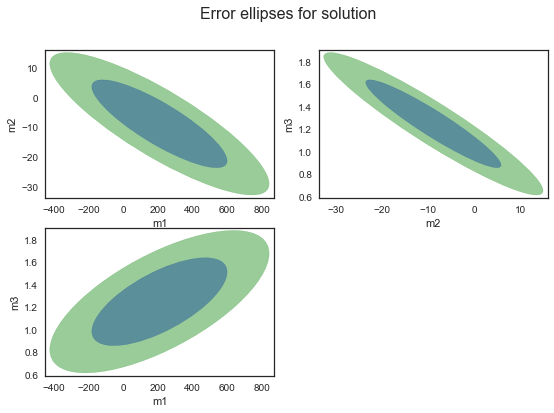

In [351]:
# Write your answer in here
Cm = GtGinv # Covariance matrix of solution errors
print("Covariance matrix\n",Cm)

Corr = Cm 
D = np.sqrt(np.diag(Cm)) 
Dinv = np.linalg.inv(np.diag(D))
Corr = np.dot(Dinv,np.dot(Cm,Dinv)) #  Correlation matrix of solution errors
print("\nCorrelation matrix\n",Corr)

sig_param1 = np.sqrt(Cm[0,0])
sig_param2 = np.sqrt(Cm[1,1])
sig_param3 = np.sqrt(Cm[2,2])
print("\n Solution and 95% Confidence intervals ")
print(" Parameter 1 {:7.3f} [{:7.3f}, {:7.3f}]".format(mls[0],mls[0]-1.96*sig_param1,mls[0]+1.96*sig_param1))
print(" Parameter 2 {:7.3f} [{:7.3f}, {:7.3f}]".format(mls[1],mls[1]-1.96*sig_param2,mls[1]+1.96*sig_param2))
print(" Parameter 3 {:7.3f} [{:7.3f}, {:7.3f}]".format(mls[2],mls[2]-1.96*sig_param3,mls[2]+1.96*sig_param3))

# ----------------------------------------------------------------------------
# Plot covariance matrix from error distribution for each pair of solution parameters
# ----------------------------------------------------------------------------

CmProj01 = Cm[np.ix_([0,1],[0,1])]
CmProj02 = Cm[np.ix_([0,2],[0,2])]
CmProj12 = Cm[np.ix_([1,2],[1,2])]

fig = plt.figure(figsize=(9,6))
fig.suptitle("Error ellipses for solution", fontsize=16)

l68 = np.sqrt(stats.chi2.ppf(q=0.68,df=2)) # number of standard deviations equivalent to 68% confidence ellipse
l95 = np.sqrt(stats.chi2.ppf(q=0.95,df=2)) # number of standard deviations equivalent to 95% confidence ellipse
print(' Number of standard deviations for 68% Conf ellipse = ',l68)
print(' Number of standard deviations for 95% Conf ellipse = ',l95)

ax1 = plt.subplot("221")
pc.plot_cov_ellipse(CmProj01,mls[0:2], ax=ax1,nstd=l68,color='Blue',alpha=0.4,label="68% Confidence")
pc.plot_cov_ellipse(CmProj01,mls[0:2], ax=ax1,nstd=l95,color='Green',alpha=0.4,label="95% Confidence")
ax1.set_xlim(mls[0]-1.3*1.96*sig_param1,mls[0]+1.3*1.96*sig_param1)
ax1.set_ylim(mls[1]-1.3*1.96*sig_param2,mls[1]+1.3*1.96*sig_param2)
ax1.set_xlabel('m1')
ax1.set_ylabel('m2')

ax2 = plt.subplot("222")
pc.plot_cov_ellipse(CmProj12,mls[1:], ax=ax2,nstd=l68,color='Blue',alpha=0.4,label='68% Confidence')
pc.plot_cov_ellipse(CmProj12,mls[1:], ax=ax2,nstd=l95,color='Green',alpha=0.4,label='95% Confidence')
ax2.set_xlim(mls[1]-1.3*1.96*sig_param2,mls[1]+1.3*1.96*sig_param2)
ax2.set_ylim(mls[2]-1.3*1.96*sig_param3,mls[2]+1.3*1.96*sig_param3)
ax2.set_xlabel('m2')
ax2.set_ylabel('m3')

ax3 = plt.subplot("223")
pc.plot_cov_ellipse(CmProj02,[mls[0],mls[2]], ax=ax3,nstd=l68,color='Blue',alpha=0.4,label='68% Confidence')
pc.plot_cov_ellipse(CmProj02,[mls[0],mls[2]], ax=ax3,nstd=l95,color='Green',alpha=0.4,label='95% Confidence')
ax3.set_xlim(mls[0]-1.3*1.96*sig_param1,mls[0]+1.3*1.96*sig_param1)
ax3.set_ylim(mls[2]-1.3*1.96*sig_param3,mls[2]+1.3*1.96*sig_param3)
ax3.set_xlabel('m1')
ax3.set_ylabel('m3')

plt.show()


In [352]:
print(Cm)

[[  6.68612564e+04  -2.12555457e+03   4.51997063e+01]
 [ -2.12555457e+03   9.50982919e+01  -2.36870998e+00]
 [  4.51997063e+01  -2.36870998e+00   6.68547844e-02]]


**Task 6**  Generate 1000 feasible solutions for the model parameters and for
    each one generate and plot the predicted curves, with the data and
    the predicted curve from the least squares solution.

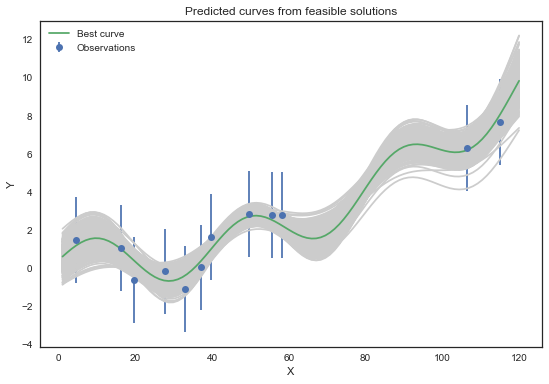

0.597527070934


In [353]:
# Write your answer in here
# ----------------------------------------------------------------------------
# Calculate random draws from model error distribution for each pair of solution parameters
# ----------------------------------------------------------------------------

points = np.random.multivariate_normal(mean=mls, cov=Cm, size=500) # generate feasible solutions from model covariance matrix 
s = np.dot(G_true,np.transpose(points))

# ----------------------------------------------------------------------------
# Plot predicted polynomials for feasible solutions
# ----------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x_true,s,color=[0.8,0.8,0.8])
ax.errorbar(xobs,yobs,yerr=sigmay,fmt='o',color='b',label='Observations')
plt.title('Predicted curves from feasible solutions')
ax.plot(x_true, ypredicted,label='Best curve',color='g')
plt.legend(loc='upper left',framealpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print(ypredicted[0])

**Task 7**  Repeat the calculation of the model covariance matrix and 95%
    Confidence intervals but with the assumption $\sigma_y = 0.25$. What
    do you notice about each these new error estimates? How would you
    rectify the situation to get reasonable model parameter errors?

Covariance matrix
 [[  7.42902849e+03  -2.36172729e+02   5.02218959e+00]
 [ -2.36172729e+02   1.05664769e+01  -2.63189998e-01]
 [  5.02218959e+00  -2.63189998e-01   7.42830938e-03]]
 Solution and 95% Confidence intervals 

 Parameter 1 208.423 [ 39.487, 377.359]
 Parameter 2  -8.867 [-15.238,  -2.495]
 Parameter 3   1.247 [  1.078,   1.416]


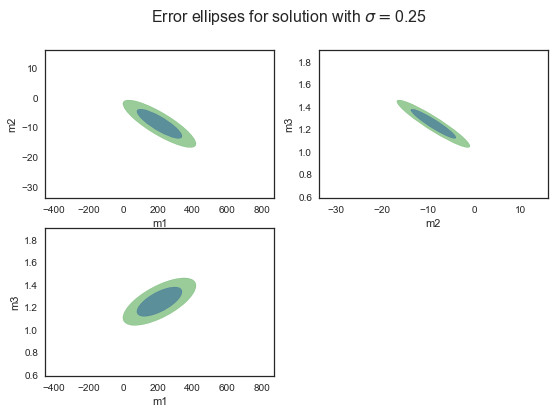

In [354]:
# Write your answer in here
#Cm = GtGinv # Covariance matrix of solution errors

sigmanew = 0.25
Cdinv = np.eye(ndata)/(sigmanew**2) # Inverse Data covariance matrix
CmNew = np.linalg.inv(np.dot(np.dot(np.transpose(G), Cdinv), G)) # Inverse of G^TC_inv G
print("Covariance matrix\n",CmNew)

sig_param1new = np.sqrt(CmNew[0,0])
sig_param2new = np.sqrt(CmNew[1,1])
sig_param3new = np.sqrt(CmNew[2,2])
print(" Solution and 95% Confidence intervals \n")
print(" Parameter 1 {:7.3f} [{:7.3f}, {:7.3f}]".format(mls[0],mls[0]-1.96*sig_param1new,mls[0]+1.96*sig_param1new))
print(" Parameter 2 {:7.3f} [{:7.3f}, {:7.3f}]".format(mls[1],mls[1]-1.96*sig_param2new,mls[1]+1.96*sig_param2new))
print(" Parameter 3 {:7.3f} [{:7.3f}, {:7.3f}]".format(mls[2],mls[2]-1.96*sig_param3new,mls[2]+1.96*sig_param3new))

# ----------------------------------------------------------------------------
# Plot covariance matrix from error distribution for each pair of solution parameters
# ----------------------------------------------------------------------------

CmProj01 = CmNew[np.ix_([0,1],[0,1])]
CmProj02 = CmNew[np.ix_([0,2],[0,2])]
CmProj12 = CmNew[np.ix_([1,2],[1,2])]

fig = plt.figure(figsize=(9,6))
fig.suptitle("Error ellipses for solution with $\sigma=$"+repr(0.25), fontsize=16)

ax1 = plt.subplot("221")
pc.plot_cov_ellipse(CmProj01,mls[0:2], ax=ax1,nstd=l68,color='Blue',alpha=0.4,label="68% Confidence")
pc.plot_cov_ellipse(CmProj01,mls[0:2], ax=ax1,nstd=l95,color='Green',alpha=0.4,label="95% Confidence")
ax1.set_xlim(mls[0]-1.3*1.96*sig_param1,mls[0]+1.3*1.96*sig_param1)
ax1.set_ylim(mls[1]-1.3*1.96*sig_param2,mls[1]+1.3*1.96*sig_param2)
ax1.set_xlabel('m1')
ax1.set_ylabel('m2')

ax2 = plt.subplot("222")
pc.plot_cov_ellipse(CmProj12,mls[1:], ax=ax2,nstd=l68,color='Blue',alpha=0.4,label='68% Confidence')
pc.plot_cov_ellipse(CmProj12,mls[1:], ax=ax2,nstd=l95,color='Green',alpha=0.4,label='95% Confidence')
ax2.set_xlim(mls[1]-1.3*1.96*sig_param2,mls[1]+1.3*1.96*sig_param2)
ax2.set_ylim(mls[2]-1.3*1.96*sig_param3,mls[2]+1.3*1.96*sig_param3)
ax2.set_xlabel('m2')
ax2.set_ylabel('m3')

ax3 = plt.subplot("223")
pc.plot_cov_ellipse(CmProj02,[mls[0],mls[2]], ax=ax3,nstd=l68,color='Blue',alpha=0.4,label='68% Confidence')
pc.plot_cov_ellipse(CmProj02,[mls[0],mls[2]], ax=ax3,nstd=l95,color='Green',alpha=0.4,label='95% Confidence')
ax3.set_xlim(mls[0]-1.3*1.96*sig_param1,mls[0]+1.3*1.96*sig_param1)
ax3.set_ylim(mls[2]-1.3*1.96*sig_param3,mls[2]+1.3*1.96*sig_param3)
ax3.set_xlabel('m1')
ax3.set_ylabel('m3')

plt.show()
# I'd rectify by rescaling data errors to get Chi-square equal to 1.0

## Practical problem 2. Uncertainty estimation using Monte Carlo error propagation

Now repeat your uncertainty analysis of question 1 but instead use Monte
Carlo error propagation.

**Task 1** Generate Gaussian random deviates with standard deviation
    $\sigma_y = 0.75$ as was assumed previously. Add these to your
    observed y values $y_{obs}$. Then use these new y values and fit the
    model in Figure 1 as many times as you think necessary. Make a 2-D scatter plots of pairs of parameters in the MC solutions and compare to the each covariance ellipses you plotted in Q1.5
    above.

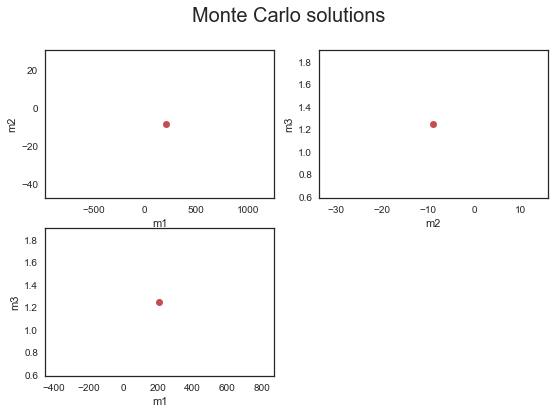

In [355]:
# Write your answer in here
# ----------------------------------------------------------------------------
# Monte Carlo estimate of feasible solutions
# ----------------------------------------------------------------------------

sigmay = 0.75 # data errors
Cdinv = np.eye(ndata)/(sigmay**2) # Inverse Data covariance matrix
mtrue = np.array([1.,1.,1.])
#yobs = np.dot(G,mtrue) + sigmay*np.random.randn(12) # regenerate data

def LSsolver(y,G,Cdinv):
    A = np.dot(np.transpose(G), Cdinv)
    GtG = np.dot(A, G) # G^T C_inv G^T
    GtGinv = np.linalg.inv(GtG) # Inverse of G^TC_inv G
    B = np.dot(A,y)
    mls = np.dot(GtGinv, B) # Least squares solution 
    return mls
mls = LSsolver(yobs,G,Cdinv)
MCsols=[]
for i in range(5000):
    yMC= yobs +sigmay*np.random.randn(ndata)
    #mlsMC = np.dot(GtGinv, np.dot(A,yMC)) # Least squares solution
    mlsMC = LSsolver(yMC,G,Cdinv)
    MCsols.append(mlsMC)
MCsols=np.array(MCsols)    

fig = plt.figure(figsize=(9,6))
fig.suptitle("Monte Carlo solutions", fontsize=20)

ax1 = plt.subplot("221")
ax1.plot(MCsols[:,0], MCsols[:,1], 'k+')
ax1.plot(mls[0],mls[1], 'ro')
#ax1.set_xlim(mls[0]-1.3*1.96*sig_param1,mls[0]+1.3*1.96*sig_param1)
#ax1.set_ylim(mls[1]-1.3*1.96*sig_param2,mls[1]+1.3*1.96*sig_param2)
ax1.set_xlabel('m1')
ax1.set_ylabel('m2')

ax2 = plt.subplot("222")
xp, yp =  MCsols.T[1], MCsols.T[2]
ax2.plot(xp, yp, 'k+')
ax2.plot(mls[1],mls[2], 'ro')
ax2.set_xlim(mls[1]-1.3*1.96*sig_param2,mls[1]+1.3*1.96*sig_param2)
ax2.set_ylim(mls[2]-1.3*1.96*sig_param3,mls[2]+1.3*1.96*sig_param3)
ax2.set_xlabel('m2')
ax2.set_ylabel('m3')

ax3 = plt.subplot("223")
xp, yp =  MCsols.T[0], MCsols.T[2]
ax3.plot(xp, yp, 'k+')
ax3.plot(mls[0],mls[2], 'ro')
ax3.set_xlim(mls[0]-1.3*1.96*sig_param1,mls[0]+1.3*1.96*sig_param1)
ax3.set_ylim(mls[2]-1.3*1.96*sig_param3,mls[2]+1.3*1.96*sig_param3)
ax3.set_xlabel('m1')
ax3.set_ylabel('m3')

plt.show()


**Task 2**  Plot the histogram of the Monte Carlo solutions for each parameter
    $m_1,m_2$ and $m_3$. How do they compare to the 95% confidence
    intervals calculated previously.

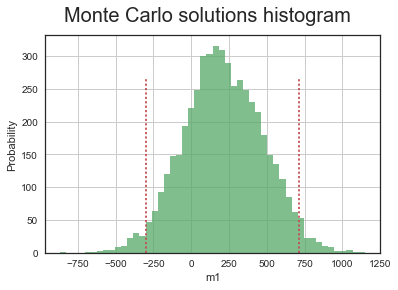

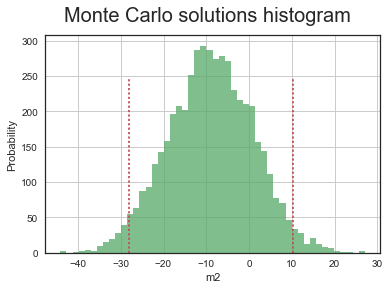

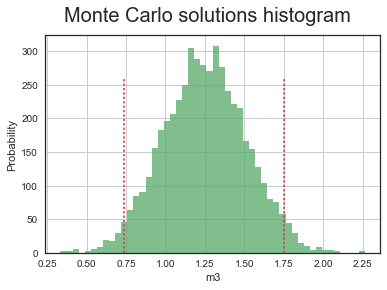

In [356]:
# Write your answer in here

fig = plt.figure()
fig.suptitle("Monte Carlo solutions histogram", fontsize=20)
n, bins, patches = plt.hist(MCsols.T[0], 50, facecolor='g', alpha=0.75)
plt.plot([mls[0]-1.96*sig_param1,mls[0]-1.96*sig_param1],[0.0,0.85*np.max(n)],'r:')
plt.plot([mls[0]+1.96*sig_param1,mls[0]+1.96*sig_param1],[0.0,0.85*np.max(n)],'r:')
plt.xlabel('m1')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

fig = plt.figure()
fig.suptitle("Monte Carlo solutions histogram", fontsize=20)
n, bins, patches = plt.hist(MCsols.T[1], 50, facecolor='g', alpha=0.75)
plt.plot([mls[1]-1.96*sig_param2,mls[1]-1.96*sig_param2],[0.0,0.85*np.max(n)],'r:')
plt.plot([mls[1]+1.96*sig_param2,mls[1]+1.96*sig_param2],[0.0,0.85*np.max(n)],'r:')
plt.xlabel('m2')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

fig = plt.figure()
fig.suptitle("Monte Carlo solutions histogram", fontsize=20)
n, bins, patches = plt.hist(MCsols.T[2], 50, facecolor='g', alpha=0.75)
plt.plot([mls[2]-1.96*sig_param3,mls[2]-1.96*sig_param3],[0.0,0.85*np.max(n)],'r:')
plt.plot([mls[2]+1.96*sig_param3,mls[2]+1.96*sig_param3],[0.0,0.85*np.max(n)],'r:')
plt.xlabel('m3')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

**Task 3** Calculate a model covariance matrix from the MC solutions and
    compare to the model covariance matrix values found in Q1.5 above.
    Plot ellipses for pairs of parameters, as before. How do these plots
    compare to the covariance ellipses you plotted in Q1.5 above?

 Monte Carlo estimate of covariance matrix
 [[  6.88353007e+04  -2.20381324e+03   4.69891154e+01]
 [ -2.20381324e+03   9.79963939e+01  -2.43791996e+00]
 [  4.69891154e+01  -2.43791996e+00   6.85349893e-02]]
 Calculated covariance matrix
 [[  6.68612564e+04  -2.12555457e+03   4.51997063e+01]
 [ -2.12555457e+03   9.50982919e+01  -2.36870998e+00]
 [  4.51997063e+01  -2.36870998e+00   6.68547844e-02]]


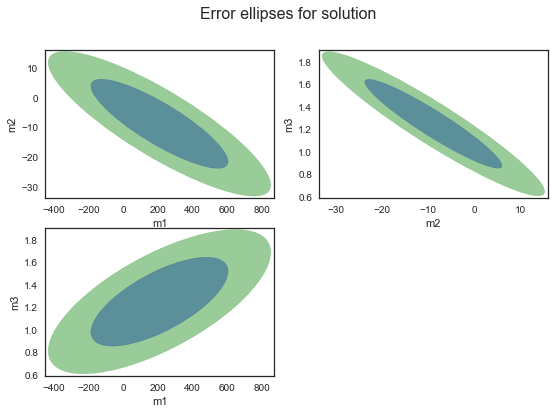

In [357]:
# Write your answer in here
MCcov = np.cov(MCsols.T)
print(' Monte Carlo estimate of covariance matrix\n',MCcov)

print(' Calculated covariance matrix\n',Cm)
CmProj01 = MCcov[np.ix_([0,1],[0,1])]
CmProj02 = MCcov[np.ix_([0,2],[0,2])]
CmProj12 = MCcov[np.ix_([1,2],[1,2])]

fig = plt.figure(figsize=(9,6))
fig.suptitle("Error ellipses for solution", fontsize=16)

ax1 = plt.subplot("221")
pc.plot_cov_ellipse(CmProj01,mls[0:2], ax=ax1,nstd=l68,color='Blue',alpha=0.4,label="68% Confidence")
pc.plot_cov_ellipse(CmProj01,mls[0:2], ax=ax1,nstd=l95,color='Green',alpha=0.4,label="95% Confidence")
ax1.set_xlim(mls[0]-1.3*1.96*sig_param1,mls[0]+1.3*1.96*sig_param1)
ax1.set_ylim(mls[1]-1.3*1.96*sig_param2,mls[1]+1.3*1.96*sig_param2)
ax1.set_xlabel('m1')
ax1.set_ylabel('m2')

ax2 = plt.subplot("222")
pc.plot_cov_ellipse(CmProj12,mls[1:], ax=ax2,nstd=l68,color='Blue',alpha=0.4,label='68% Confidence')
pc.plot_cov_ellipse(CmProj12,mls[1:], ax=ax2,nstd=l95,color='Green',alpha=0.4,label='95% Confidence')
ax2.set_xlim(mls[1]-1.3*1.96*sig_param2,mls[1]+1.3*1.96*sig_param2)
ax2.set_ylim(mls[2]-1.3*1.96*sig_param3,mls[2]+1.3*1.96*sig_param3)
ax2.set_xlabel('m2')
ax2.set_ylabel('m3')

ax3 = plt.subplot("223")
pc.plot_cov_ellipse(CmProj02,[mls[0],mls[2]], ax=ax3,nstd=l68,color='Blue',alpha=0.4,label='68% Confidence')
pc.plot_cov_ellipse(CmProj02,[mls[0],mls[2]], ax=ax3,nstd=l95,color='Green',alpha=0.4,label='95% Confidence')
ax3.set_xlim(mls[0]-1.3*1.96*sig_param1,mls[0]+1.3*1.96*sig_param1)
ax3.set_ylim(mls[2]-1.3*1.96*sig_param3,mls[2]+1.3*1.96*sig_param3)
ax3.set_xlabel('m1')
ax3.set_ylabel('m3')

plt.show()

**Task 4**  Calculate 95% confidence intervals for each parameter using your MC
    estimated model covariance matrix. How do these results compare to
    the ones you obtained in Q1.5 above?

In [358]:
# Write your answer in here
print("\n Solution and Calculated 95% Confidence intervals ")
print(" Parameter 1 {:7.3f} [{:7.3f}, {:7.3f}]".format(mls[0],mls[0]-1.96*sig_param1,mls[0]+1.96*sig_param1))
print(" Parameter 2 {:7.3f} [{:7.3f}, {:7.3f}]".format(mls[1],mls[1]-1.96*sig_param2,mls[1]+1.96*sig_param2))
print(" Parameter 3 {:7.3f} [{:7.3f}, {:7.3f}]".format(mls[2],mls[2]-1.96*sig_param3,mls[2]+1.96*sig_param3))
sig_param1 = np.sqrt(MCcov[0,0])
sig_param2 = np.sqrt(MCcov[1,1])
sig_param3 = np.sqrt(MCcov[2,2])
print("\n Solution and Monte Carlo estimated 95% Confidence intervals ")
print(" Parameter 1 {:7.3f} [{:7.3f}, {:7.3f}]".format(mls[0],mls[0]-1.96*sig_param1,mls[0]+1.96*sig_param1))
print(" Parameter 2 {:7.3f} [{:7.3f}, {:7.3f}]".format(mls[1],mls[1]-1.96*sig_param2,mls[1]+1.96*sig_param2))
print(" Parameter 3 {:7.3f} [{:7.3f}, {:7.3f}]".format(mls[2],mls[2]-1.96*sig_param3,mls[2]+1.96*sig_param3))



 Solution and Calculated 95% Confidence intervals 
 Parameter 1 208.423 [-298.384, 715.231]
 Parameter 2  -8.867 [-27.980,  10.247]
 Parameter 3   1.247 [  0.740,   1.754]

 Solution and Monte Carlo estimated 95% Confidence intervals 
 Parameter 1 208.423 [-305.812, 722.658]
 Parameter 2  -8.867 [-28.269,  10.536]
 Parameter 3   1.247 [  0.734,   1.760]


**Task 5**
Calculate feasible curves corresponding to your Monte Carlo solutions and plot them together with the actual best fit curve. Does this figure look similar to the one you obtained in question 1?

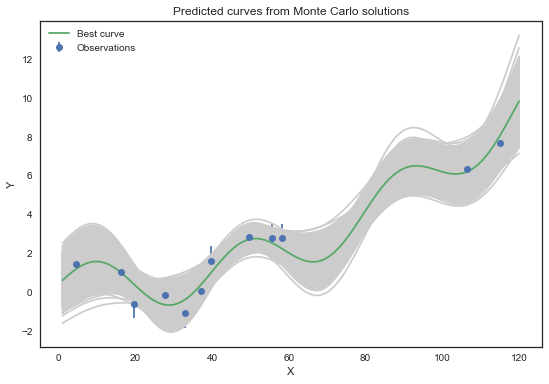

In [359]:
# ----------------------------------------------------------------------------
# Write your answer in here
# ----------------------------------------------------------------------------

s = np.dot(G_true,np.transpose(MCsols))

# ----------------------------------------------------------------------------
# Plot predicted polynomials for Monte Carlo solutions
# ----------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x_true,s,color=[0.8,0.8,0.8])
ax.errorbar(xobs,yobs,yerr=sigmay,fmt='o',color='b',label='Observations')
plt.title('Predicted curves from Monte Carlo solutions')
ax.plot(x_true, ypredicted,label='Best curve',color='g')
plt.legend(loc='upper left',framealpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Practical problem 3. Error propagation with the Bootstrap: The cannonball problem

<img src="Figures/ballistics.png" alt="Cannonball figure" width="600"/>
Figure 2. Cannonball heights as a function of time.

A cannon ball is fired directly upwards from an unknown starting height
above the surface, $m_1$, with unknown initial velocity, $m_2$ and
unknown gravitational acceleration, $m_3$ . Newton’s laws of motion tell
us that the relationship between position and time follows

$$y(t) = m_1 + m_2t -\frac{1}{2}m_3t^2.
\label{eq:cannon}$$

An experiment has been performed and heights, $y_i$, $(i=1,\dots,8)$ are
collected at fixed time intervals of a second. We obtain the data
$y = [26.94, 33.45, 40.72 , 42.32, 44.30 , 47.19 , 43.33 , 40.13 ]$,
$t = [1.0,2.0,\dots,8.0]$.

To find the unknowns $(m_1, m_2, m_3)$ we must fit a quadratic curve
(as above) to the observed data (see figure 2). This can be achieved
by solving the linear system ${\bf d} = G{\bf m}$, where ${\bf d}$ is
the data, ${\bf m}$ is the vector of unknowns and $G$ is the matrix
connecting the two, determined by the expression above. The solution to this is
in your course exercise, but is equivalent to evaluating the expression

$${\bf m} = (G^TG)^{-1} G^T {\bf d}
\label{eq:LS}$$

All terms on the right hand side of this equation are known and so
its a simple case of plugging in values to determine the best fit
estimates of $(m_1, m_2, m_3)$.

Calculate the best fit values of the three unknowns (height, velocity
and gravitational acceleration). We call these values
$(m_1^0, m_2^0, m_3^0)$ our <span>**solution**</span>. Can you guess
where this experiment took place?



 Least squares solution
 [ 17.61607143  10.00761905   1.79238095]


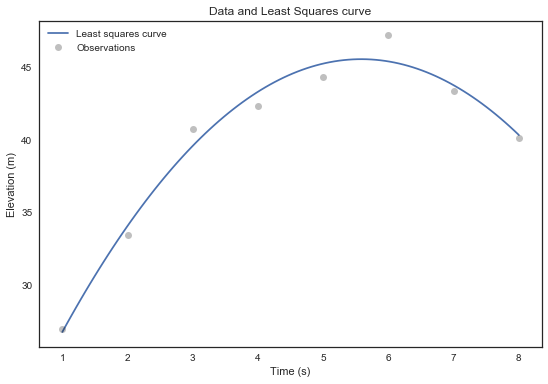

[[  1.    1.   -0.5]
 [  1.    2.   -2. ]
 [  1.    3.   -4.5]
 [  1.    4.   -8. ]
 [  1.    5.  -12.5]
 [  1.    6.  -18. ]
 [  1.    7.  -24.5]
 [  1.    8.  -32. ]]


In [360]:
# Write your answer in here

yobs = [26.94, 33.45, 40.72, 42.32, 44.30, 47.19, 43.33, 40.13]
t = np.linspace(1.0,8.0,len(yobs))
G = np.transpose([np.ones(len(t)), t, -0.5*t*t,]) # G matrix

sol = np.dot(np.linalg.inv(np.dot(np.transpose(G), G)), np.dot(np.transpose(G),yobs)) # Least squares solution 
 
print(' Least squares solution\n',sol)

t_fine = np.linspace(1.0,8.0,100)
G_fine = np.transpose([np.ones(len(t_fine)), t_fine, -0.5*t_fine*t_fine,]) # G matrix

ypredicted = np.dot(G_fine,sol) # predicted y values from least squares solution

# ----------------------------------------------------------------------------   
# plot data and least squares solution
# ----------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(9,6))

ax.plot(t_fine, ypredicted,label='Least squares curve',color='b')
ax.plot(t,yobs,'o',color=(0, 0, 0, 0.25),label='Observations')
plt.legend(loc='upper left',framealpha=0.7)
plt.title('Data and Least Squares curve')
plt.xlabel('Time (s)')
plt.ylabel('Elevation (m)')
plt.show()
print(G)

The problem now is to use the <span>**bootstrap**</span> to determine
how error in the data propagate into the estimated unknowns. We do not
know the size of errors in the data but we can apply the bootstrap.
Since the data are associated with increasing time it does not make
sense to directly resample the data (because we could end up with two
heights of the same value associated with different times). The data are
not IID, since they belong to a trend. However we can still proceed by
applying the bootstrap principle to the data residuals produced by the
best fit solution., i.e. we have 8 residuals, $r_i$, where

$$r_i = y_i - m^0_1 - m^0_2t_i +\frac{1}{2}m^0_3t_i^2.\quad (i=1,\dots, 8).$$

If we assume that the residuals are IID they can be re-sampled with
replacement in the usual way to form multiple sets of 8 residual values
$r^*_j, (j=1,\dots,8)$ and new bootstrap data are constructed using this
set of residuals by

$$y^*_j = r^*_j + m^0_1 + m^0_2t_j -\frac{1}{2}m^0_3t_j^2.\quad (j=1,\dots, 8).$$

Using this approach the residuals are mixed between different data, and
so each y values does not simply get its own residual back.

<span>**Write a python script**</span> to build bootstrap data sets and
for each of these insert them into the above expressions to calculate
the bootstrap estimates of the unknowns. Lets call these
$(m_1^i, m_2^i, m_3^i), (i=1,\dots, B)$. The number of bootstrap samples
$B$ is your choice but it should be at least 100.

It can be instructive to <span>**plot the bootstrap samples**</span> as
a scatter plot for the three pair of variables, i.e. $(m^i_1, m^i_2)$,
$(m^i_2, m^i_3)$ and $(m^i_1, m^i_3)$, $(i=1,\dots, B)$. They should
look something like Figure 3.

<img src="Figures/bootstrap.png" alt="Bootstrap figure" width="400"/>
Figure 3. Bootstrap solutions and confidence ellipses distributed about the best fit solution.

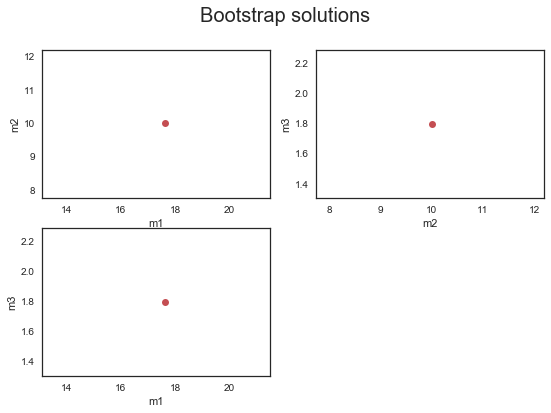

[ 17.61607143  10.00761905   1.79238095]


In [361]:
# Write your answer in here
nBoot = 5000 # Number of bootstrap samples
res = np.dot(G,sol)-yobs # residuals of least squares solution
solBoot = np.zeros((nBoot,np.shape(G)[1]))
for i in range(nBoot):
    yBoot = yobs + np.random.choice(res,size=len(res),replace=True) # random sample residuals with replacement
    solBoot[i] = np.dot(np.linalg.inv(np.dot(np.transpose(G), G)), np.dot(np.transpose(G),yBoot)) # Least squares solution 

fig = plt.figure(figsize=(9,6))
fig.suptitle("Bootstrap solutions", fontsize=20)

ax1 = plt.subplot("221")
xp, yp = solBoot.T[0], solBoot.T[1]
ax1.plot(xp, yp, 'k+')
ax1.plot(sol[0],sol[1], 'ro')
#ax1.set_xlim(mls[0]-1.3*1.96*sig_param1,mls[0]+1.3*1.96*sig_param1)
#ax1.set_ylim(mls[1]-1.3*1.96*sig_param2,mls[1]+1.3*1.96*sig_param2)
ax1.set_xlabel('m1')
ax1.set_ylabel('m2')

ax2 = plt.subplot("222")
xp, yp =  solBoot.T[1], solBoot.T[2]
ax2.plot(xp, yp, 'k+')
ax2.plot(sol[1],sol[2], 'ro')
#ax2.set_xlim(mls[1]-1.3*1.96*sig_param2,mls[1]+1.3*1.96*sig_param2)
#ax2.set_ylim(mls[2]-1.3*1.96*sig_param3,mls[2]+1.3*1.96*sig_param3)
ax2.set_xlabel('m2')
ax2.set_ylabel('m3')

ax3 = plt.subplot("223")
xp, yp =  solBoot.T[0], solBoot.T[2]
ax3.plot(xp, yp, 'k+')
ax3.plot(sol[0],sol[2], 'ro')
#ax3.set_xlim(mls[0]-1.3*1.96*sig_param1,mls[0]+1.3*1.96*sig_param1)
#ax3.set_ylim(mls[2]-1.3*1.96*sig_param3,mls[2]+1.3*1.96*sig_param3)
ax3.set_xlabel('m1')
ax3.set_ylabel('m3')

plt.show()
print(sol)



From the bootstrap output samples
$(m_1^i, m_2^i, m_3^i), (i=1,\dots, B)$ and the formulae in the course
slides, calculate the i) <span>**the mean**</span>, ii) <span>**the
variance**</span>, iii) <span>**the bias corrected solution**</span>,
and iv) <span>**the 95% confidence intervals**</span> for each of the
three unknowns . The mean should look similar to the best fit values and
the bias should be small. The variance and confidence intervals
characterize the error in the estimated values of the unknowns.

In [362]:
# Write your answer in here

# Bootstrap mean
print(' Bootstrap mean solution           ',np.mean(solBoot,axis=0))
print(' Bootstrap variance                ',np.var(solBoot,axis=0))
bcsol = sol - (np.mean(solBoot,axis=0)-sol)
print(' Bootstrap bias corrected solution ',bcsol)
p = np.percentile(solBoot,[2.5,97.5],axis=0)
print(' Bootstrap 95% Confidence intervals: ')
print(" Parameter 1 {:7.3f} [{:7.3f}, {:7.3f}]".format(bcsol[0],p[0,0],p[1,0]))
print(" Parameter 2 {:7.3f} [{:7.3f}, {:7.3f}]".format(bcsol[1],p[0,1],p[1,1]))
print(" Parameter 3 {:7.3f} [{:7.3f}, {:7.3f}]".format(bcsol[2],p[0,2],p[1,2]))

 Bootstrap mean solution            [ 17.62853261  10.00145316   1.79095385]
 Bootstrap variance                 [ 1.69746155  0.44531156  0.02106068]
 Bootstrap bias corrected solution  [ 17.60361025  10.01378494   1.79380806]
 Bootstrap 95% Confidence intervals: 
 Parameter 1  17.604 [ 14.876,  19.848]
 Parameter 2  10.014 [  8.739,  11.355]
 Parameter 3   1.794 [  1.516,   2.088]


## Practical problem 4.1 Parameter search with nested grids

Suppose we have two unknowns, $(x_1, x_2)$. We measure $x_1$ directly
and obtain a value of $1\pm\sigma$ (where the measurement error is
$\sigma=10$). Suppose also that we know the following property should
hold, $x^2_1 = x_2$. We wish to find the best compromise values of
$(x_1, x_2)$ which both fit the data and the extra constraint. We could
solve this problem by finding $(x_1, x_2)$ which minimizes the least
squares misfit function

$$f(x_1, x_2) = \frac{(1-x_1)^2}{100} + (x_2-x_1^2)^2.$$

This is hardly necessary because the solution is fairly obvious, i.e.
$x_1 = x_2 = 1$, and indeed this solution corresponds to a global
minimum in the misfit function $f(1,1) = 0$. The misfit surface is
plotted in figure 4 and is known as the Rosenbrock function[^1].
Although its global minimum is known it can be quite difficult to locate
with an optimization algorithm (because it lies at the end of a long
valley).



<img src="Figures/rosenbrock.png" alt="Bootstrap figure" width="400"/>
Figure 4. The Rosenbrock misfit function for a two parameter problem.

### Tasks to complete:
**Task 1** Find the global minimum of this function using simple uniform Monte
    Carlo random search. <span>**Write a python script**</span> to
    generate random points in a plane in the ranges
    $-1.5 \le x_1 \le 1.5$, and $-1.5 \le x_2 \le 1.5$. Calculate
    $f(x_1, x_2)$ for each of your points and plot the minimum as a
    function of the number of points tested. How many do you need to
    generate to get a good solution? It can be instructive to plot the
    minimum in $f(x_1, x_2)$ as a function of the number of points that you
    generate.


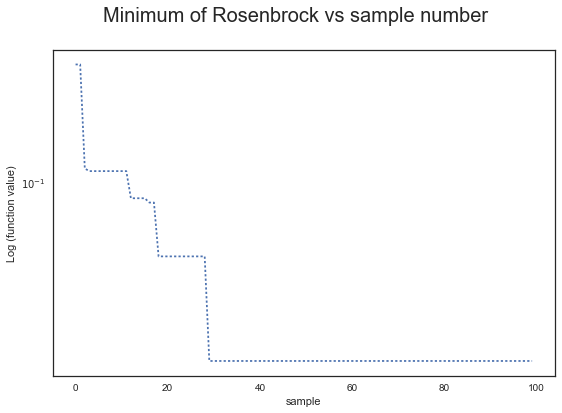

 Lowest point found after 100  samples is at [ 0.00988315  0.08684071]  with value 0.0173276677891


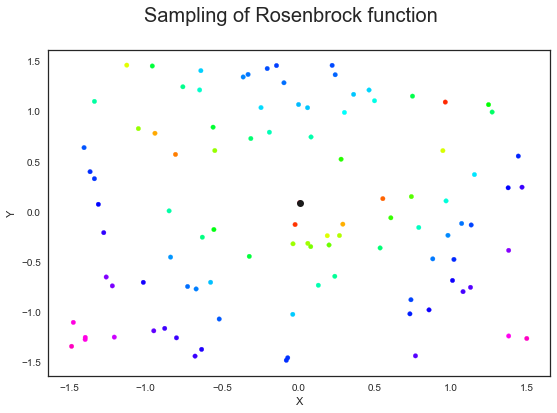

In [363]:
# Write your answer in here
import matplotlib.cm as cm
def rosenbrock2D(x): return 0.01*(1.0-x[0])**2 + (x[1]-x[0]**2)**2
n = 100 # Number of random points
x0,x1 = np.array([-1.5,-1.5]),np.array([1.5,1.5])
x,f = np.zeros((n,2)),np.zeros(n)
for i in range(n):
    x[i] = x0 + (x1-x0)*np.random.random_sample(2)
    f[i] = rosenbrock2D(x[i])

# plot minimum as a function of number of samples
fig = plt.figure(figsize=(9,6))
fig.suptitle("Minimum of Rosenbrock vs sample number", fontsize=20)
ym=np.zeros(n)
for i in range(n): ym[i] = np.min(f[:i+1])
plt.semilogy(ym,'b:')
plt.xlabel('sample')
plt.ylabel('Log (function value)')
plt.show()
print(' Lowest point found after',n,' samples is at', x[np.argmin(f)],' with value',np.min(f))

# plot samples
fig = plt.figure(figsize=(9,6))
fig.suptitle("Sampling of Rosenbrock function", fontsize=20)
plt.scatter(x.T[0], x.T[1],c=np.log(f), s=20,cmap=cm.gist_rainbow)
plt.plot(x.T[0][np.argmin(f)],x.T[1][np.argmin(f)],'ok')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


contour = 0 # add a contour map to help visualize
if(contour==1): # contour the function instead  
    fig = plt.figure(figsize=(9,6))
    fig.suptitle("Contouring the Rosenbrock function", fontsize=20)
    nc = 100 # discretization level
    xc = np.linspace(x0[0],x1[0],nc)
    yc = np.linspace(x0[1],x1[1],nc)
    fc = np.zeros((nc,nc))
    xv, yv = np.meshgrid(xc,yc)
    for i in range(nc):
        for j in range(nc):
            fc[i,j] = rosenbrock2D([xv[i,j],yv[i,j]])
    iy,ix = np.unravel_index(fc.argmin(), fc.shape)
    plt.plot(xc[ix],yc[iy],'ok',markersize=30)
    cs  = plt.contour(xv,yv,fc,180,cmap=cm.gist_rainbow)            
    plt.show()

**Task 2**  Now repeat the exercise but stop the process after a fixed number of
    samples, say $N_s$ (you choose $N_s$). Then centre a new smaller box
    with side length $L$ (you choose $L$, e.g. 1/2 or 3/4 of the length
    of the original) at your current best solution and repeat the
    process. You have built a <span>**nested grid parameter search
    scheme**</span>. Repeat this several times and see if the solution
    is more accurate and the convergence any quicker than with the
    single stage approach.


 Lowest point found after 1000  samples is at [0.97221403630138026, 0.93930281201656962]  with value 4.24989852723e-05
 Lowest point found after 2000  samples is at [0.97221403630138026, 0.93930281201656962]  with value 4.24989852723e-05
 Lowest point found after 3000  samples is at [0.97221403630138026, 0.93930281201656962]  with value 4.24989852723e-05


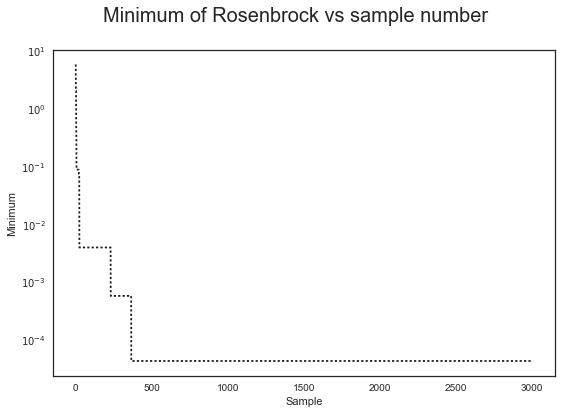

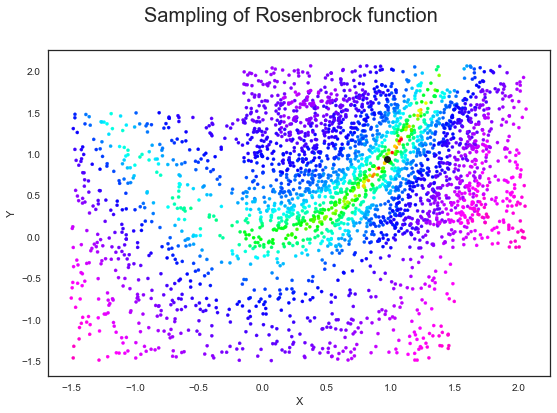

In [364]:
# Write your answer in here

nsamples,niterations,factor = 1000,3,0.75 # number of samples per iteration, number of iterations,box shrink factor
x0,x1 = np.array([-1.5,-1.5]),np.array([1.5,1.5]) # starting box size
boxsize = x1-x0
x,f = np.zeros((niterations,nsamples,2)),np.ones((niterations,nsamples))
for j in range(niterations): # loop over iterations
    for i in range(nsamples):       # loop over samples
        x[j,i] = x0 + (x1-x0)*np.random.random_sample(2)
        f[j,i] = rosenbrock2D(x[j,i])
    xm = [x[:,:,0].flatten()[np.argmin(f)],x[:,:,1].flatten()[np.argmin(f)]]
    print(' Lowest point found after',nsamples*(j+1),' samples is at', xm,' with value',np.min(f))
    x0,x1 = xm[0]-factor*boxsize*0.5,xm[1]+factor*boxsize*0.5 # update box size
    boxsize = x1-x0
fig = plt.figure(figsize=(9,6))
fig.suptitle("Minimum of Rosenbrock vs sample number", fontsize=20)
ym=np.zeros(niterations*nsamples)
for i in range(nsamples*niterations): ym[i] = np.min(f.flatten()[:i+1])
plt.semilogy(np.linspace(1,nsamples*niterations,nsamples*niterations),ym,'k:')
plt.xlabel('Sample')
plt.ylabel('Minimum')
plt.show()

# plot samples
fig = plt.figure(figsize=(9,6))
fig.suptitle("Sampling of Rosenbrock function", fontsize=20)
for j in range(niterations): #
    plt.scatter(x[j,:,0], x[j,:,1],c=np.log(f[j]), s=10,cmap=cm.gist_rainbow)
plt.plot(x[:,:,0].flatten()[np.argmin(f)],x[:,:,1].flatten()[np.argmin(f)],'ok')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


**Task 3**  
If you want a challenge then repeat the problem with multiple
    unknowns and data. The $N$ variable Rosenbrock function is

$$f(x_1, x_2,\dots,x_N) = \sum_{i=1}^{N-1}(1-x_i)^2 + 100(x_{i+1}-x^2_i)^2.$$

But beware this function has local minima as well as a global
    minimum.


** This is difficult and so I will reserve this for another time! **

## Practical problem 4.2 Fully nonlinear inversion of a seismic receiver function

'Receiver functions' are a class of seismic data used to study discontinuities (layering) in the Earth's crust. At each discontinuity, P-to-S conversions occur, introducing complexity in the waveform. By deconvolving horizontal- and vertical-channel waveforms from earthquakes at teleseismic distances, we can isolate information about these conversions, and hence learn about the crustal structure. This deconvolved signal is the receiver function, and has a highly non-linear dependence on the local crustal properties.

In [365]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys
#sys.path.append("./inversionCourse/")
from inversionCourse import rf

The function `rf.rfcalc()` computes synthetic receiver functions (using routines developed by Takuo Shibutani). It is called as follows:
```python
t,rfunc = rf.rfcalc(model)
```
where `model` is a NumPy array of dimension `[nlayers,3]`. The values in `model[:,0]` give the depths of discontinuities in the model, while `model[:,1]` contains the S-wave speed above the interface. `model[:,2]` is the ratio of S-wave speed to P-wave speed. The maximum depth of discontinuity that can be considered is 60km.

For example, here is the Earth model.

In [366]:
model = np.array([[1,4.0,1.7],
                  [3.5,4.3,1.7],
                  [8.0,4.2,2.0],
                  [20, 6,1.7],
                  [45,6.2,1.7]])

Lets plot the Earth model

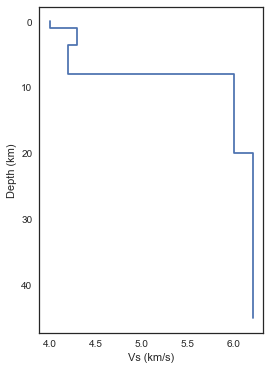

In [367]:
px = np.zeros([2*len(model),2])
py = np.zeros([2*len(model),2])
n=len(model)
px[0::2,0],px[1::2,0],px[1::2,1],px[2::2,1] = model[:,1],model[:,1],model[:,0],model[:-1,0]
plt.figure(figsize=(4,6))
plt.xlabel('Vs (km/s)')
plt.ylabel('Depth (km)')
plt.gca().invert_yaxis()
plt.plot(px[:,0],px[:,1],'b-')
plt.show()

Now we calculate the receiver function and plot it.

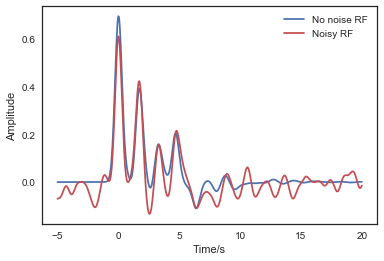

In [368]:
# calculate and plot receiver function
t,rfunc = rf.rfcalc(model)          # Receiver function
t2,rfunc2 = rf.rfcalc(model,sn=0.5) # Receiver function with added correlated noise
plt.plot(t,rfunc,label='No noise RF')
plt.plot(t2,rfunc2,'r-',label='Noisy RF')
plt.xlabel('Time/s')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

**Task 1:** Familiarise yourself with the function `rf.rfcalc()` and explore how the receiver function behaves as you change the model.

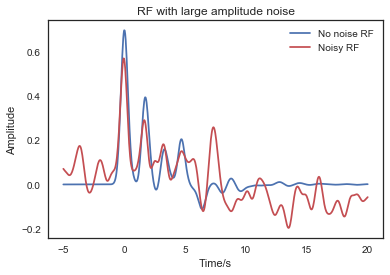

In [369]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

# calculate and plot receiver function with different parameters
t,rfunc = rf.rfcalc(model)          # Receiver function
t2,rfunc2 = rf.rfcalc(model,sn=1.0) # Receiver function with added correlated noise
plt.title('RF with large amplitude noise')
plt.plot(t,rfunc,label='No noise RF')
plt.plot(t2,rfunc2,'r-',label='Noisy RF')
plt.xlabel('Time/s')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


**Task 2:** Invent a model with around 5 layers, plot it and then compute the corresponding receiver function with the noise parameter $sn$ set to some reasonable value, say $sn=0.5$. Plot the noisy and noiseless receiver functions together just as in the figure above. We are going to treat the noisy receiver function as data.

To measure the fit of this observed receiver function to the receiver function predicted by any other model, ${\mathbf d}_{pred}$, we need to compute the negative log of the Likelihood

\begin{equation*}
-\log (p({\mathbf d}_{obs} | {\mathbf m}) = ({\mathbf d}_{obs}-{\mathbf d}_{pred})^T C_D^{-1} ({\mathbf d}_{obs}-{\mathbf d}_{pred})
\end{equation*}

where $C_D^{-1}$ is the inverse data covariance matrix describing correlated noise in the receiver function. You can do this using the supplied routine InvDataCov($\sigma_t$,$\sigma_a$,$n$), which builds an $nxn$ inverse data covariance matrix for a time signal with amplitude variance $\sigma_a^2$ and time correlation length $\sigma_t$, for receiver length of $n$ time samples. In this example you can use $\sigma_t = 2.5$, $\sigma_a=0.01$. Compute the negative log Likelihood between the noisy data and the predicted receiver function of the true model. 

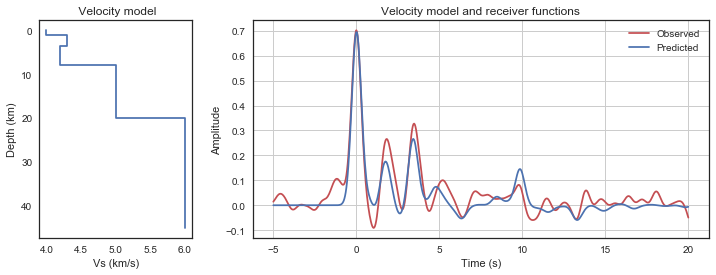

In [370]:
# generate new Earth model and plot it with receiver function
model = np.array([[1,4.0,1.7],
                  [3.5,4.3,1.7],
                  [8.0,4.2,2.0],
                  [20, 5,1.7],
                  [45,6.,1.7]])
px = np.zeros([2*len(model),2])
py = np.zeros([2*len(model),2])
n=len(model)
px[0::2,0],px[1::2,0],px[1::2,1],px[2::2,1] = model[:,1],model[:,1],model[:,0],model[:-1,0]

time1,RFo = rf.rfcalc(model,sn=0.5)          # Calculate observed noisy Receiver function
time2,RFp = rf.rfcalc(model) # Calculate predicted noiseless Receiver function

f, (a0, a1) = plt.subplots(1,2, figsize=(12,4), gridspec_kw = {'width_ratios':[1, 3]})

a1.set_title('Velocity model and receiver functions')
a1.set_xlabel("Time (s)")
a1.set_ylabel("Amplitude")
a1.grid(True)
a1.plot(time1, RFo, 'r-',label='Observed')
a1.plot(time2, RFp, label='Predicted')
a1.legend()

px = np.zeros([2*len(model),2])
py = np.zeros([2*len(model),2])
n=len(model)
px[0::2,0],px[1::2,0],px[1::2,1],px[2::2,1] = model[:,1],model[:,1],model[:,0],model[:-1,0]

a0.set_title(" Velocity model")                   # Plot velocity model with Receiver function
a0.set_xlabel('Vs (km/s)')
a0.set_ylabel('Depth (km)')
a0.plot(px[:,0],px[:,1],'b-')
a0.invert_yaxis()

#plt.tight_layout()
plt.show()

In [371]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

Cdinv = rf.InvDataCov(2.5,0.01,len(rfunc))
# now compute the negative log Likelihood between the receiver functions of your two models.

# Calculate waveform misfit between noisy and noiseless receiver functions

res = RFo-RFp
mref = np.dot(res,np.transpose(np.dot(Cdinv, res)))/2.0
print (' Waveform misfit of reference model',mref)

 Waveform misfit of reference model 960.418255279


**Task 3:** Now we're going to assume that we know everything about the model, except for the depth of one interface. Select one interface in your model which you will pretend is 'unknown', and plot how the agreement between 'data' and synthetics varies with this unknown. Choose ranges for each variable something like the following $(0,60 km)$ for a depth variable. Try and plot the negative log-Likelihood as a function of the depth variable. Is the minimum where you expected it to be? Does your plot give you the impression that this problem is highly nonlinear?

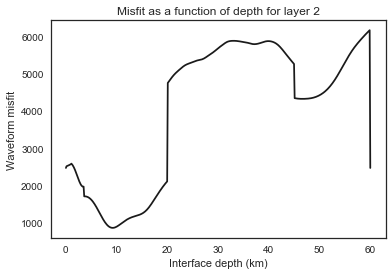

 Minimum misfit at depth  9.25851703407  with true value at  8.0


In [372]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

# Calculate misfit as a function of depth of a chosen layer

depths = np.linspace(0.,60.,500) # depth samples
iface = 2 # index of interface
misfit = np.zeros(len(depths))
for i,d in enumerate(depths):
    m = np.copy(model)
    m[iface,0] = d
    time,RFpm = rf.rfcalc(m) # Calculate predicted noiseless Receiver function for current model
    res = RFo-RFpm
    misfit[i] = np.dot(res,np.transpose(np.dot(Cdinv, res)))/2.0
#print(misfit) 

# plot misfit profile
plt.title('Misfit as a function of depth for layer '+repr(iface))
plt.plot(depths,misfit,'k-')
plt.xlabel('Interface depth (km)')
plt.ylabel('Waveform misfit')
plt.show()
print(' Minimum misfit at depth ',depths[np.argmin(misfit)],' with true value at ',model[iface,0])


**Task 4:** Explore what happens if the unknown parameter is $V_s$ in the layer, or its $V_p/V_s$ ratio, and its depth is known. Choose ranges for each variable something like $\pm 1.0 km/s$ for a $V_s$ variable or $\pm 0.5$ for $V_s/V_p$. 

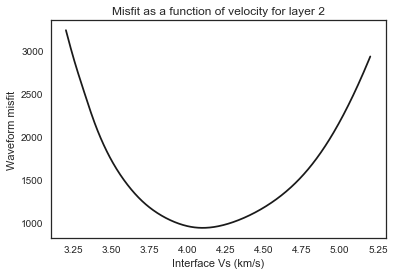

 Minimum misfit at velocity  4.09779559118  with true value at  4.2


In [373]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

# Calculate misfit as a function of shear velocity of a chosen layer

iface = 2 # index of interface
Vs = np.linspace(model[iface,1]-1.0,model[iface,1]+1.0,500) # Vs samples
misfit = np.zeros(len(Vs))
for i,x in enumerate(Vs):
    m = np.copy(model)
    m[iface,1] = x
    time,RFpm = rf.rfcalc(m) # Calculate predicted noiseless Receiver function for current model
    res = RFo-RFpm
    misfit[i] = np.dot(res,np.transpose(np.dot(Cdinv, res)))/2.0
#print(misfit) 

# plot misfit profile
plt.title('Misfit as a function of velocity for layer '+repr(iface))
plt.plot(Vs,misfit,'k-')
plt.xlabel('Interface Vs (km/s)')
plt.ylabel('Waveform misfit')
plt.show()
print(' Minimum misfit at velocity ',Vs[np.argmin(misfit)],' with true value at ',model[iface,1])


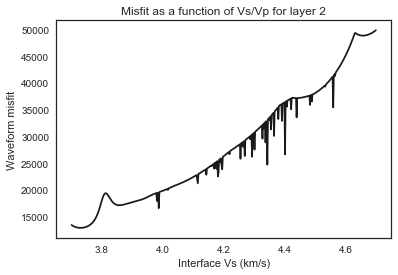

 Minimum misfit at Vs/Vp  3.73006012024  with true value at  2.0


In [374]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

# Calculate misfit as a function of Vs/Vp ratio of a chosen layer

iface = 2 # index of interface
VsVp = np.linspace(model[iface,1]-0.5,model[iface,1]+0.5,500) # depth samples
misfit = np.zeros(len(Vs))
for i,x in enumerate(Vs):
    m = np.copy(model)
    m[iface,2] = x
    time,RFpm = rf.rfcalc(m) # Calculate predicted noiseless Receiver function for current model
    res = RFo-RFpm
    misfit[i] = np.dot(res,np.transpose(np.dot(Cdinv, res)))/2.0
#print(misfit) 

# plot misfit profile
plt.title('Misfit as a function of Vs/Vp for layer '+repr(iface))
plt.plot(VsVp,misfit,'k-')
plt.xlabel('Interface Vs (km/s)')
plt.ylabel('Waveform misfit')
plt.show()
print(' Minimum misfit at Vs/Vp ',VsVp[np.argmin(misfit)],' with true value at ',model[iface,2])



**Task 5:** Now, suppose we have two unknown parameters - the interface depth and associated $V_s$, perhaps, or two depth parameters. Map out how the agreement between 'data' and predicted receiver function varies as you change both parameters. Plot a contour map of this data misfit surface? How multi-modal is this?


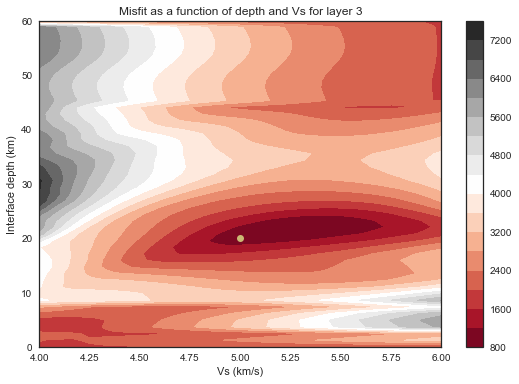

 Minimum misfit at depth  22.0408163265  with true value at  20.0
 Minimum misfit at velocity  5.26530612245  with true value at  5.0


In [375]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

# Calculate misfit as a function of depth of a chosen layer

iface = 3 # index of interface
depths = np.linspace(0.,60.,50) # depth samples
Vs = np.linspace(model[iface,1]-1.0,model[iface,1]+1.0,50) # Vs samples
misfit = np.zeros((len(depths),len(Vs)))
for i,d in enumerate(depths):
    for j,v in enumerate(Vs):
        m = np.copy(model)
        m[iface,0] = d
        m[iface,1] = v
        time,RFpm = rf.rfcalc(m) # Calculate predicted noiseless Receiver function for current model
        res = RFo-RFpm
        misfit[i,j] = np.dot(res,np.transpose(np.dot(Cdinv, res)))/2.0
#print(misfit) 

# plot misfit contours
fig = plt.figure(figsize=(9,6))
plt.title('Misfit as a function of depth and Vs for layer '+repr(iface))
#plt.plot(depths,misfit,'k-')
plt.ylabel('Interface depth (km)')
plt.xlabel('Vs (km/s)')
X, Y = np.meshgrid(Vs, depths)
plt.contourf(X, Y, misfit, 20, cmap='RdGy')
plt.plot(model[iface,1],model[iface,0],'yo')
plt.colorbar()
plt.show()
ix,jx = np.unravel_index(misfit.argmin(), misfit.shape) # location of misfit minimum
print(' Minimum misfit at depth ',depths[ix],' with true value at ',model[iface,0])
print(' Minimum misfit at velocity ',Vs[jx],' with true value at ',model[iface,1])


**Task 6:** Now choose to search this 2-D space with either a (nested) grid search in a square or a (nested) Gaussian sampler. In each case you must choose the density of the sampling, adjust the centre of the sampling in each iteration and record the progress toward finding the best fit solution. How close do you get to the known true values? How does the distance between the best fit solution and the true solution change with numbers of random samples? Try and plot this.

 Lowest misfit solution found after  0  iterations of Gaussian cloud  [  4.5  30. ]
 Lowest misfit solution found after  1  iterations of Gaussian cloud  [  4.70245693  20.73729992]
 Lowest misfit solution found after  2  iterations of Gaussian cloud  [  5.19697662  21.1229151 ]
 Lowest misfit solution found after  3  iterations of Gaussian cloud  [  5.19697662  21.1229151 ]
 Lowest misfit solution found after  4  iterations of Gaussian cloud  [  5.22305637  21.26528005]


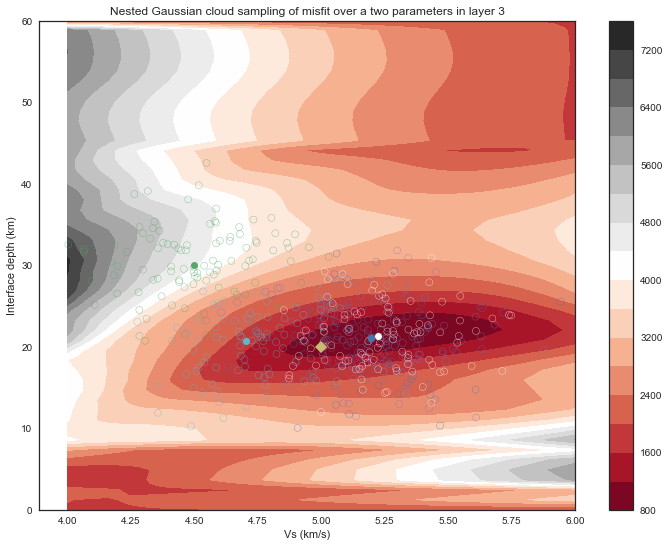

 True solution is 5.0 20.0


In [376]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

nits = 5 # number of nested iterations
nump = 100 # number of points per iteration
cov = [[0.05,0],[0,20]] # Covariance for Gaussian samples
p = np.array([])
allp = [0]*nits
bp = [0]*(nits+1)
bp[0] = np.array([4.5,30]) # starting point for Gaussian cloud matters
#bp[0] = np.array([4.5,40]) # starting point for Gaussian cloud matters
mis0 = 1e6
for it in range(nits):
    p0 = np.random.multivariate_normal(bp[it], cov,nump)
    bp[it+1] = bp[it]
    for i,x in enumerate(p0):
        if(x[1]<=depths[-1] and x[1] >= depths[0] and x[0]<=Vs[-1] and x[0] >= Vs[0]):
            p=np.append(p,[x[0],x[1]])
            m = np.copy(model)
            m[iface,0] = x[1]
            m[iface,1] = x[0]
            time,RFpm = rf.rfcalc(m) # Calculate predicted noiseless Receiver function for current model
            res = RFo-RFpm
            mis = np.dot(res,np.transpose(np.dot(Cdinv, res)))/2.0
            if(mis < mis0):
                mis0 = np.copy(mis)
                bp[it+1] = np.copy(x)
    allp[it] = np.reshape(p,(-1,2))
    p = np.array([])

fig = plt.figure(figsize=(12,9))
plt.title('Nested Gaussian cloud sampling of misfit over a two parameters in layer '+repr(iface))
#plt.plot(depths,misfit,'k-')
plt.ylabel('Interface depth (km)')
plt.xlabel('Vs (km/s)')
X, Y = np.meshgrid(Vs, depths)
plt.contourf(X, Y, misfit, 20, cmap='RdGy')
plt.plot(model[iface,1],model[iface,0],'yo')
plt.colorbar()
c = ['g','c','m','b','w']
for i in range(nits):
    plt.scatter(allp[i].T[0], allp[i].T[1], facecolors='none',edgecolors=c[i],alpha=1.0)
    plt.plot(bp[i].T[0],bp[i].T[1],'o',color=c[i])
    print(' Lowest misfit solution found after ',i,' iterations of Gaussian cloud ',bp[i])
#plt.plot(bp[i].T[0],bp[i].T[1],'wo',markersize=3.0)
plt.plot(model[iface,1],model[iface,0],'yD',markersize=8.0)
plt.scatter(bp[i].T[0],bp[i].T[1], facecolors='none',edgecolors='w',s=10.0,lw=1.0)
plt.show()
print(' True solution is',model[iface,1],model[iface,0])


** Gaussian nested sampling **
This result shows the convergence of a random Gaussian cloud of 100 points initially centred on the location Vs=4.5km/s and d = 30 km. Five iterations are shown where the mean of the Gaussian samples is shifted to the best fit of the previous iteration. It gradually converges to the misfit minimum of this 2D slice. The lowest misfit found solution is the white circle and the true solution is the yellow circle.

#### A second try with a further away starting centre of the Gaussian cloud

 Lowest misfit solution found after  0  iterations of Gaussian cloud  [  4.5  40. ]
 Lowest misfit solution found after  1  iterations of Gaussian cloud  [  4.92131705  44.08205159]
 Lowest misfit solution found after  2  iterations of Gaussian cloud  [  5.41845038  44.6688344 ]
 Lowest misfit solution found after  3  iterations of Gaussian cloud  [  5.6068662   44.91372659]
 Lowest misfit solution found after  4  iterations of Gaussian cloud  [  5.6068662   44.91372659]


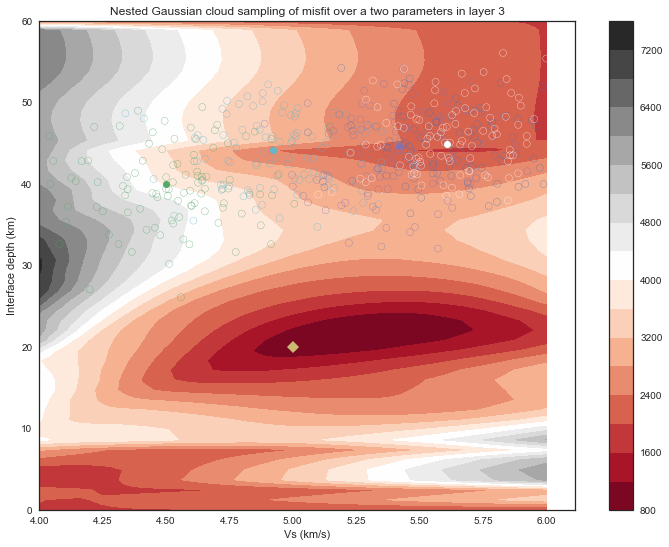

 True solution is 5.0 20.0


In [377]:
nits = 5 # number of nested iterations
nump = 100 # number of points per iteration
cov = [[0.05,0],[0,20]] # Covariance for Gaussian samples
p = np.array([])
allp = [0]*nits
bp = [0]*(nits+1)
bp[0] = np.array([4.5,40]) # starting point for Gaussian cloud matters
mis0 = 1e6
for it in range(nits):
    p0 = np.random.multivariate_normal(bp[it], cov,nump)
    bp[it+1] = bp[it]
    for i,x in enumerate(p0):
        if(x[1]<=depths[-1] and x[1] >= depths[0] and x[0]<=Vs[-1] and x[0] >= Vs[0]):
            p=np.append(p,[x[0],x[1]])
            m = np.copy(model)
            m[iface,0] = x[1]
            m[iface,1] = x[0]
            time,RFpm = rf.rfcalc(m) # Calculate predicted noiseless Receiver function for current model
            res = RFo-RFpm
            mis = np.dot(res,np.transpose(np.dot(Cdinv, res)))/2.0
            if(mis < mis0):
                mis0 = np.copy(mis)
                bp[it+1] = np.copy(x)
    allp[it] = np.reshape(p,(-1,2))
    p = np.array([])

fig = plt.figure(figsize=(12,9))
plt.title('Nested Gaussian cloud sampling of misfit over a two parameters in layer '+repr(iface))
#plt.plot(depths,misfit,'k-')
plt.ylabel('Interface depth (km)')
plt.xlabel('Vs (km/s)')
X, Y = np.meshgrid(Vs, depths)
plt.contourf(X, Y, misfit, 20, cmap='RdGy')
plt.plot(model[iface,1],model[iface,0],'yo')
plt.colorbar()
c = ['g','c','m','b','w']
for i in range(nits):
    plt.scatter(allp[i].T[0], allp[i].T[1], facecolors='none',edgecolors=c[i],alpha=1.0)
    plt.plot(bp[i].T[0],bp[i].T[1],'o',color=c[i])
    print(' Lowest misfit solution found after ',i,' iterations of Gaussian cloud ',bp[i])
#plt.plot(bp[i].T[0],bp[i].T[1],'wo',markersize=3.0)
plt.plot(model[iface,1],model[iface,0],'yD',markersize=8.0)
plt.scatter(bp[i].T[0],bp[i].T[1], facecolors='none',edgecolors='w',s=10.0,lw=1.0)
plt.show()
print(' True solution is',model[iface,1],model[iface,0])


** Gaussian nested sampling convergence to a secondary minimum**
This result shows the convergence of a random Gaussian cloud of 100 points initially centred on the location Vs=4.5km/s and d = 40 km. Five iterations are shown where the mean of the Gaussian samples is shifted to the best fit of the previous iteration. It gradually converges to a secondary minimum of this 2D slice and **not** the true global minimum. The lowest misfit found solution is the white circle and the true solution is the yellow circle.

**Task 7:** What do you think would happen if you repeat this process and increase the number of unknown parameters in your inversion?

In [378]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

print(' It gets slower and performs worse in higher dimensions!')

 It gets slower and performs worse in higher dimensions!


## Practical problem 5.1  Applying Bayesian inference to the biased coin problem

In this practical, we will perform Bayesian inference for a single parameter, constrained by some obervational data, and examine how the posterior knowledge of the parameter changes as we collect new data.

If $\alpha$ is the probability that a head will occur when a coin is tossed, then a biased  coin is described by a value $\alpha \ne 0.5$. We have $0\le \alpha \le 1$, where a value of $\alpha=1$ means a head will always be the result of a coin toss and if $\alpha=0$ a tail will always result.
 
As in every Python program, we need to begin by loading some libraries. For Jupyter we also need the `%matplotlib inline` command, which ensures that figures are rendered properly within the Notebook. This could be omitted if you wanted to reproduce this practical as a 'standard' Python program.



In [379]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Now we read in the coin toss data as ones for heads and zeros for tails.

In [380]:
#initialise the list of coin flip results
tosses = open('Datasets/coin_data1-numeric.txt','r')
tosses = tosses.readlines()
tosses = np.array([int(flip) for flip in tosses])

The Binomial theorem tells us the probability that there are $R$ heads in $N$ coin tosses for a coin where the the probability of a head is $\alpha$ is given by

\begin{equation*}
p(R|\alpha,N) = \frac{N!}{R!(N-R)!} \alpha^R (1-\alpha)^{N-R}
\end{equation*}

**Task 1:** Decide on an appropriate Likelihood function to use the observed value of $R$ to constrain the unknown $\alpha$ and write it down, $p(R | \alpha)$. Assuming we have no particular prior preference for $\alpha$ decide on a prior PDF, $p(\alpha)$. From these determine the form of the posterior PDF, $p(\alpha | R)$ and write these down. Remember you only need to know the posterior PDF up to a multiplicative constant, ignoring normalization terms that do not depend on $\alpha$.

**Task 2:** Use the coin toss data to calculate the poster PDF, $p(\alpha | R(N))$ for $N=1, 2, 3, 4, 8, 64, 1024$, and plot the PDF for each case. What do you conclude about the true value of $\alpha$?

Hint: In any computer program it is always best to calculate log p(njd)
first and then take an exponent to evaluate the curve as a function
of n. Stirling’s formulae for the approximation to n! may be useful.

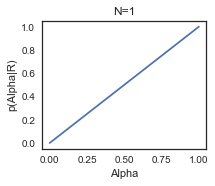

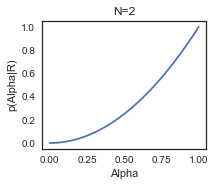

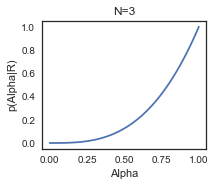

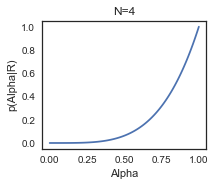

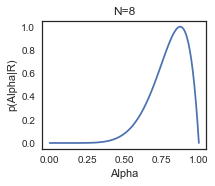

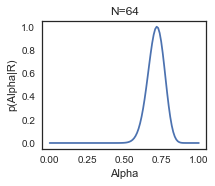

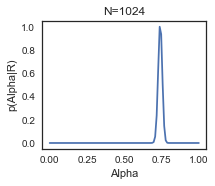

In [381]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 
#

N = [1,2,3,4,8,64,1024]

k = 1
for n in N:
    n_tosses = tosses[:n]
    # sum <n_tosses> to find the total number of heads (value 1)
    R = n_tosses.sum()
    alpha = np.linspace(0,1,100)
    posterior = (alpha**R)*(1-alpha)**(n-R)
    # normalise posterior pdf
    pdf =posterior/posterior.max()

    plt.figure(figsize=(10,8))
    plt.subplot(3,3,k)
    plt.plot(alpha,pdf,'-')
    plt.title('N='+repr(n))
    plt.xlabel('Alpha')
    plt.ylabel('p(Alpha|R)')
    k+=1
    
plt.show()

**Task 3:** Now calculate an estimate of $\alpha$ for each case using a Frequentist approach. Decide on what a good estimator of $\alpha$ would be given $R$ and $N$. Calculate this estimator for each case and place on the same figure. How well does it compare to the Posterior PDF?

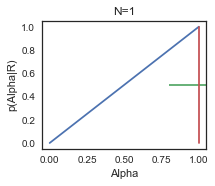

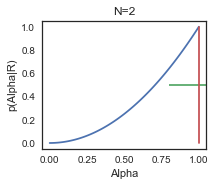

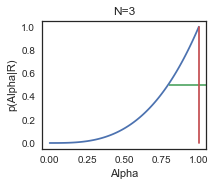

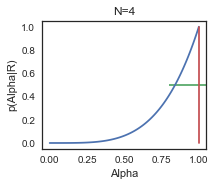

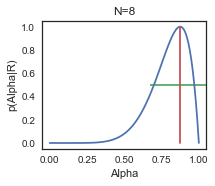

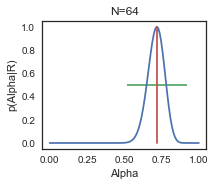

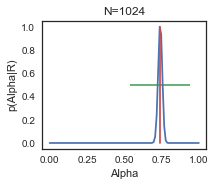

In [382]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 
#


N = [1,2,3,4,8,64,1024]

k = 1
for n in N:
    n_tosses = tosses[:n]
    # sum <n_tosses> to find the total number of heads (value 1)
    R = n_tosses.sum()
    alpha = np.linspace(0,1,100)
    posterior = (alpha**R)*(1-alpha)**(n-R)
    # normalise posterior pdf
    pdf =posterior/posterior.max()

    # Frequentist
    max_l = R/float(n)
    # Plot results
    plt.figure(figsize=(10,8))
    plt.subplot(3,3,k)
    plt.plot(alpha,pdf,'-')
    plt.plot([max_l,max_l],[0.0,1.0],'r-')
    plt.errorbar(max_l,[0.5], xerr=sigma)
    plt.title('N='+repr(n))
    plt.xlabel('Alpha')
    plt.ylabel('p(Alpha|R)')
    plt.xlim(-0.05,1.05)
    k+=1
    
plt.show()

**Task 4:** More formally a good Frequentist estimator is the maximum of the Likelihood. You can get an expression of the maximum Likelihood value for $\alpha$, by finding $\alpha$ such that $\frac{d L}{d\alpha} = 0$, where $L$ is your Likelihood expression. Try and differentiate your expression for the Likelihood and solve this equation for $\alpha$. How does this expression compare to your estimator you produced in Task 3?

Theory tells us that an estimated error in the Frequentist estimator is given by $\sigma = \left( \frac{d^2 L_o}{d \alpha^2}\right)^{1/2}$, where $L_o = -\log L$, the negative log-Likelihood. Calculate this error estimate for the Frequentist estimator and put on the figures above. How does the estimator and its error compare to the Posterior PDF for each case?

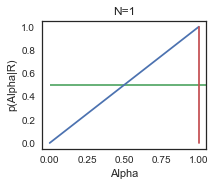

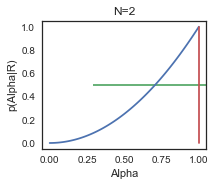

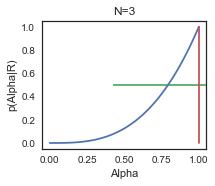

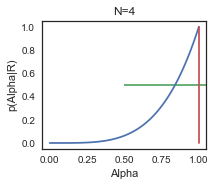

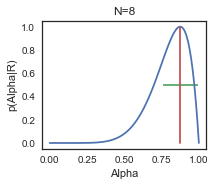

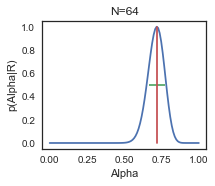

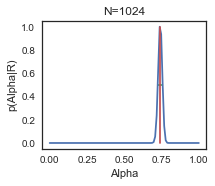

In [383]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 
#


N = [1,2,3,4,8,64,1024]

k = 1
for n in N:
    n_tosses = tosses[:n]
    # sum <n_tosses> to find the total number of heads (value 1)
    R = n_tosses.sum()
    alpha = np.linspace(0,1,100)
    posterior = (alpha**R)*(1-alpha)**(n-R)
    # normalise posterior pdf
    pdf =posterior/posterior.max()

    # Frequentist
    max_l = n_tosses.sum()/float(n)
    if max_l != 1:
        sigma = 1./np.sqrt((n-R)/(1-max_l)**2+R/max_l**2)
    else:
        sigma = 1./np.sqrt(R)
    # Plot results
    plt.figure(figsize=(10,8))
    plt.subplot(3,3,k)
    plt.plot(alpha,pdf,'-')
    plt.plot([max_l,max_l],[0.0,1.0],'r-')
    plt.errorbar(max_l,[0.5], xerr=sigma)
    plt.title('N='+repr(n))
    plt.xlabel('Alpha')
    plt.ylabel('p(Alpha|R)')
    plt.xlim(-0.05,1.05)
    k+=1
    
plt.show()

**Task 5:** Repeat the above steps for the second data set. Do you notice a difference in the rate of convergence of the posterior PDF to the true solution? Why would this be?

In [384]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 
#

#initialise the list of coin flip results
tosses = open('Datasets/coin_data2-numeric.txt','r')
tosses = tosses.readlines()
tosses = np.array([int(flip) for flip in tosses])

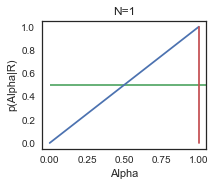

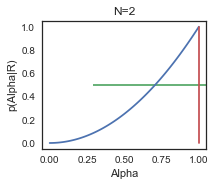

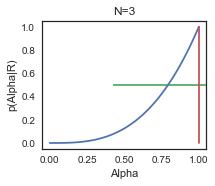

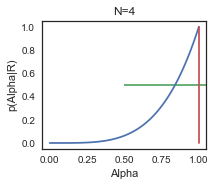

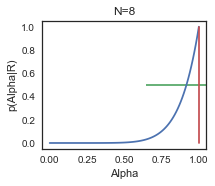

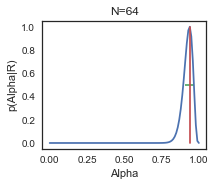

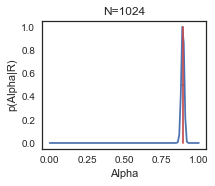

In [385]:
N = [1,2,3,4,8,64,1024]

k = 1
for n in N:
    n_tosses = tosses[:n]
    # sum <n_tosses> to find the total number of heads (value 1)
    R = n_tosses.sum()
    alpha = np.linspace(0,1,100)
    posterior = (alpha**R)*(1-alpha)**(n-R)
    # normalise posterior pdf
    pdf =posterior/posterior.max()

    # Frequentist
    max_l = n_tosses.sum()/float(n)
    if max_l != 1:
        sigma = 1./np.sqrt((n-R)/(1-max_l)**2+R/max_l**2)
    else:
        sigma = 1./np.sqrt(R)
    # Plot results
    plt.figure(figsize=(10,8))
    plt.subplot(3,3,k)
    plt.plot(alpha,pdf,'-')
    plt.plot([max_l,max_l],[0.0,1.0],'r-')
    plt.errorbar(max_l,[0.5], xerr=sigma)
    plt.title('N='+repr(n))
    plt.xlabel('Alpha')
    plt.ylabel('p(Alpha|R)')
    plt.xlim(-0.05,1.05)

    k+=1
    
plt.show()

## Practical problem 5.2  Applying Bayesian inference to a lottery

In this example we will compare Bayesian and Frequentist approaches to using published data to estimate the number of tickets sold in a national lottery. The single unknown in the problem is the total number of entries (i.e. sets of 6 numbers) sold, which we will call $n$. The data is the number of
winning entries of each division $d_i, (i=1,\dots,N_{div}) $, where $N_{div}$ is
6 for the example below. These are given without error. Of
course, since both the cost per entry and the total prize money are
published then an estimate of $n$, allows a direct inference on the
total profit before costs made by the lotto organisation. (In reality
the real value of $n$ is never made public!)

We will look at the problem both from a Frequentist viewpoint, using the
data to make a single estimate of $n$, and also a Bayesian inference
viewpoint where we use the data to construct a probability distribution
for $n$.

### Background theory

The probability of winning each division, is independent of the total
number of entries $n$, so these may be treated as a set of known
constants, $p_i, (i=1,\dots, N_{div})$, the value of which depends on
the details of the game. 

<img src="Figures/table.png" alt="Bootstrap figure" width="600"/>

Table 1. $p_i$ is the probability of winning division $i$ and $d_i$ are the number of actual winners in division $i$. Australian Tattslotto dividend results for draw number 3253 on 29/09/2012. Total prize pool of \$49.92m, with division 1 prize of \$22m. The cost of a single entry is about \$0.65.

### Tasks to complete:
**Task 1**  A Frequentist solution might be to take the number of winners of
    each division and divide by the probability of winning to get
    multiple estimates of $n$. These estimates are independent and we
    could average them. Do this for the data above to get an estimate
    for $n$. By how much do these estimates vary ?

In [386]:
# Write your answer in here

ds = [14.,169.,3059.,149721.,369543.,802016.]
pm1s = [8145060.,678756.,36696.,732.,300.,144.]

xave = np.dot(ds,pm1s)/len(ds)
print(' Average of frequentist estimates of number of tickets = ',xave)
print(' Estimates of number of tickets = ',np.multiply(ds,pm1s))
print(' Range in estimates of number of tickets = ',np.min(np.multiply(ds,pm1s)),' to',np.max(np.multiply(ds,pm1s)))

 Average of frequentist estimates of number of tickets =  112823774.0
 Estimates of number of tickets =  [  1.14030840e+08   1.14709764e+08   1.12253064e+08   1.09595772e+08
   1.10862900e+08   1.15490304e+08]
 Range in estimates of number of tickets =  109595772.0  to 115490304.0


**Task 2**  A Bayesian inference approach requires us to find the Likelihood and
    prior and then multiply them together. Lets assume our prior is
    uniform between $1< n < 3\times 10^8$ which is a safe assumption.
    The likelihood is the probability of the data given the model, i.e.
    the probability that there would be $d_i$ winners of division $i$
    and $n - d_i$ non winners when there are $n$ tickets sold. The
    binomial theorem tells us that this probability, $p(d_i | n)$, is
    given by
$$p(d_i | n) = \frac{n!}{d_i! (n-d_i)!} \times p_i^{d_i} (1-p_i)^{n-d_i}$$

All values in this expression are known except the value of
    $n$. Since the number of winners in each division provides
    independent data, the total likelihood is the product of similar
    terms for each division, i.e.   
$$p({\bf d}| n) =\prod_{i=1}^{N_{div}} p(d_i | n)$$

Bayes’ theorem says that to find the <span>*a posteriori*</span>
    probability distribution for the unknown $n$ we just multiply the
    likelihood by the prior. Since the prior is a constant the result is
$$p(n | {\bf d}) \propto  \prod_{i=1}^{N_{div}} \frac{n!}{(n-d_i)!} \times (1-p_i)^{n-d_i}
       $$

which holds for $1 \le n \le 3\times 10^8$. Outside this range the
    posterior PDF is zero because the prior is zero. Our only interest
    is in the unknown $n$ and so the constant of proportionality is used
    to absorb all quantities independent of $n$.

Your task is to use the values of $(d_i, p_i), i=1,\dots, 6$ from
    the table and plot the posterior probability distribution as a function of
    $n$. Do this in the range 112.5m - 114.5m. Did you get the type of figure that you expected? 
    Compare this curve to the single frequentist estimate of $n$ you obtained in part 1, what do you
    notice?
    
[Hint: In any computer program it is always best to calculate $\log p(n | {\bf d})$ first and then take an exponent to evaluate the curve as a function of $n$. Stirling's formulae for the approximation to $n!$ may be useful.]


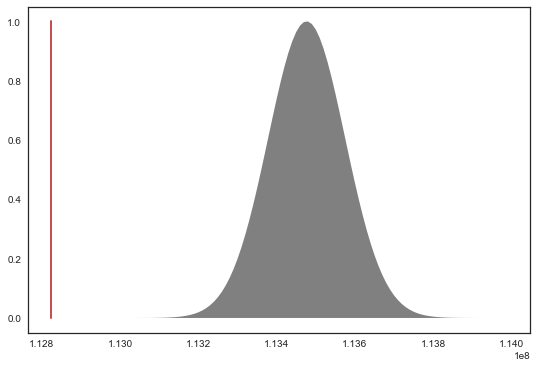

In [387]:
# Write your answer in here
import math as mt

ds = [14.,169.,3059.,149721.,369543.,802016.]
pm1s = [8145060.,678756.,36696.,732.,300.,144.]

# Stirlings formual for log(N!), valid for N large
def logfac(N):
    fN = float(N)
    return fN*mt.log(fN) + mt.log(2*mt.pi*fN)/2 - fN + \
      (fN**-1)/12 - (fN**-3)/360 + (fN**-5)/1260 - (fN**-7)/1680 + (fN**-9)/1188

def logp(n):
    res = 0.
    for pm1,d in zip(pm1s,ds):
        res += logfac(n) - logfac(n-d)
        res += (n-d)*mt.log((pm1-1.)/pm1)
    return res

ns=range(113000000,114000000,10000)
y = np.zeros(len(ns))
for i in range(0,len(y)):
    y[i] = logp(ns[i])

xave = np.dot(ds,pm1s)/len(ds)
fig = plt.figure(figsize=(9,6))
plt.plot([xave,xave],[0.,1.],'r',lw=2.0)
plt.fill(ns,np.exp(y-y.max()),facecolor='grey')
plt.show()


**Task 3**  
Repeat the problem using the Maximum Likelihood (ML) approach. This
    is done by finding the value of $n$ which maximises the 
    likelihood. Since the prior is a
    constant for this problem the likelihood is proportional to the
    curve you produced in part 2. You could probably do it visually.
    Plot the average estimate you obtained in part 1 on top of the curve
    from part 2. How does the ML solution compare to the Bayesian solution and the Frequentist solution?

 Average of simple frequentist estimates of number of tickets 112823774.0
 Maximum Likelihood of estimates of number of tickets 113480000


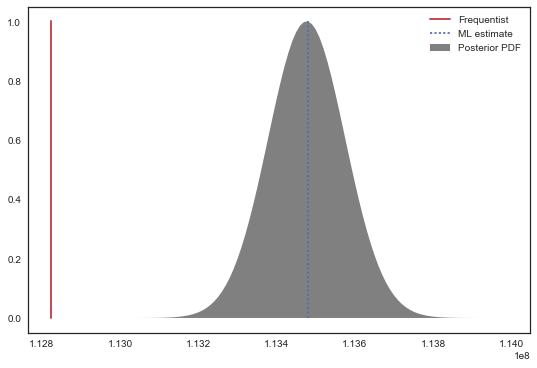

In [388]:
# Write your answer in here

print(' Average of simple frequentist estimates of number of tickets',xave) 
print(' Maximum Likelihood of estimates of number of tickets',ns[np.argmax(y)]) 

fig = plt.figure(figsize=(9,6))
plt.plot([xave,xave],[0.,1.],'r',lw=2.0,label='Frequentist')
plt.plot([ns[np.argmax(y)],ns[np.argmax(y)]],[0.,1.],'b:',label='ML estimate')
plt.fill(ns,np.exp(y-y.max()),facecolor='grey',label='Posterior PDF')
plt.legend()
plt.show()

## Pracitcal problem 5.3: Probabilistic sampling for mixture of Gaussian PDFs

**Task 1:**
In this example we will define a target PDF to be a mixture of three Gaussians

$$p(x,y) \propto \sum_{i=1}^3w_i \exp\left\{ -0.5 (\bar {\mathbf x}_i - {\mathbf x})^TC_i^{-1} (\bar {\mathbf x}_i - {\mathbf x})\right\}  $$

where the means, covariances and weights of the three distributions are given by, $\bar {\mathbf x}_1 = (0.6,0.6), \bar {\mathbf x}_2 = (0.8,0.2), \bar {\mathbf x}_3 = (0.2,0.3)$; $C_1 = 0.02I, C_2 = \left(\begin{array}
 0.1 & 0.08\\
0.08 & 0.1
\end{array}\right), C_3 = \left(\begin{array}
 0.1 & -0.06\\
-0.06 & 0.1
\end{array}\right) $, and $w_1 = 0.1, w_2 = 0.4, w_3 = 0.5$, respectively.

Your first task to write a function to evaluate this PDF and then contour it over the region $0<= x,y <= 1)$

In [389]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

def make_thetas(xmin, xmax, n):
    xs = np.linspace(xmin, xmax, n)
    widths =(xs[1:] - xs[:-1])/2.0
    thetas = xs[:-1]+ widths
    return thetas

In [390]:
thetas1 = make_thetas(0, 1, 101)
thetas2 = make_thetas(0, 1, 101)
X, Y = np.meshgrid(thetas1, thetas2)


In [391]:
from scipy.stats import multivariate_normal
def target(X,Y):
    x1,x2,x3 = np.array([0.6,0.6]),np.array([0.8,0.2]),np.array([0.2,0.3])
    cov1,cov2,cov3 = 0.02*np.eye(2), np.array([[0.1,0.08],[0.08,0.1]]), np.array([[0.1,-0.06],[-0.06,0.1]])
    p1 = multivariate_normal(x1,cov1)
    p2 = multivariate_normal(x2,cov2)
    p3 = multivariate_normal(x3,cov3)
    #print(np.shape(X))
    if(np.ndim(X) == 0): 
        #print('Ndim of X is zero')
        pos = [X,Y]
    else:
        pos = np.empty(X.shape + (2,))
        print(np.shape(pos))
        pos[:, :, 0] = X; pos[:, :, 1] = Y
    pdf = 0.1*p1.pdf(pos) + 0.4*p2.pdf(pos) + 0.5*p3.pdf(pos)
    return pdf

(100, 100, 2)


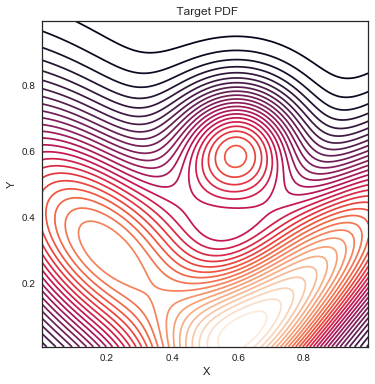

In [392]:

# draw contour map of target PDF

pdf = target(X,Y)

fig, ax = plt.subplots(1,1, subplot_kw=dict(aspect='equal'), figsize=(6,6))
ax.contour(X, Y, pdf,40)
plt.title(' Target PDF')
plt.xlabel(' X')
plt.ylabel('Y')
plt.show()

**Task 2:** 
Write a simple McMC sampler to sample the target PDF . 


You could do this by implementing the following simple algorithm:
- Step 0. Generate a  starting point for a random walk ${\mathbf x} = (x_1,y_1)$ and calculate the value of the PDF $p( {\mathbf x}) $.
- Step 1. Generate a new position ${\mathbf x}^{\prime}$ as a random draw from a symmetric proposal distribution,
$q({\mathbf x}^{\prime}|{\mathbf x}) $. There is flexibility in choosing the form of this proposal distribution. 
Try using $q({\mathbf x}^{\prime}|{\mathbf x}) = N({\mathbf x}, \sigma^2I$), where $\sigma$ is some distance you choose, e.g. $\sigma=0.05$.
- Step 2. Evaluate the target PDF at the proposed location $p({\mathbf x}^{\prime})$.
- Step 3. Generate $r$ as a random draw from $U[0,1]$. If $r < \frac{p({\mathbf x}^{\prime})}{p({\mathbf x})}$ accept the random step by setting ${\mathbf x} = {\mathbf x}^{\prime}$; Otherwise discard ${\mathbf x}^{\prime}$.
- Step 4. Record ${\mathbf x}$ as an entry of your output ensemble and go to 1.

Use your Metropolis sampler to generate an ensemble of $N$ points, where you choose $N$, and compare them to a contour plot of the target PDF, $p({\mathbf x})$. Does the density of samples reflect the target distribution?

In [393]:
def inside(x): 
    return (x[0] < 1.0 and x[0] > 0. and x[1] > 0. and x[1] < 1.)

# draw samples  of target PDF

def McMCSampler(nsteps,start,sig): # McMC random walk of nsteps, starting at start using Gaussian proposal with width=sig
    x,L = np.zeros((nsteps+1,2)),np.zeros((nsteps+1))
    x[0] = start  # starting pint of random walk
    covq = sig*sig*np.eye(2)
    L[0] = target(x[0,0],x[0,1])
    q = multivariate_normal([0.0, 0.0],covq) # proposal distribution
    k = 0
    for step in range(nsteps): # loop over McMC steps
        xnew = x[step] + q.rvs() # proposed step position
        Lp = target(xnew[0],xnew[1]) # target distribution value at proposed position
        r = np.random.uniform() # random decision variable
        #print(step,L[step],Lp,r)
        if ( np.log(Lp)-np.log(L[step]) > np.log(r) and inside(xnew)): # accept proposed new position
            #print(' accept', np.log(Lp)-np.log(L[step]),np.log(r))
            L[step+1] = Lp
            x[step+1] = xnew
            k+=1
        else: # reject proposed new position
        #print(' reject')
            L[step+1] = L[step]
            x[step+1] = x[step]
    return x,L,100*k/nsteps # retrun path of random walk, target PDF values and percentage of accepted steps
    
nsteps = 10000 # Number of iterations
np.random.seed(1234)
xstart = np.array([ 0.2, 0.2])  # starting pint of random walk
qsig = 0.05# variance of random walk
x,L,e = McMCSampler(nsteps,xstart,qsig)
print(' Accept ratio of Metropolis = ',e,'%')

 Accept ratio of Metropolis =  88.44 %


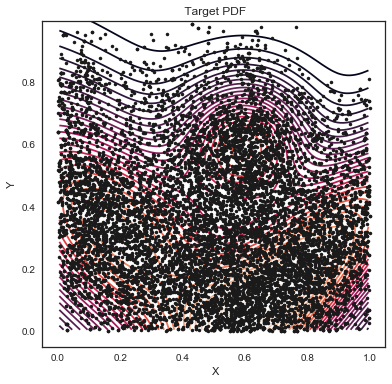

In [394]:
# plot random walk

fig, ax = plt.subplots(1,1, subplot_kw=dict(aspect='equal'), figsize=(12,6))
ax.contour(X, Y, pdf,40)
ax.set_title(' Target PDF')
ax.plot(x.T[0],x.T[1],'k.')
ax.set_xlabel(' X')
ax.set_ylabel('Y')

plt.show()

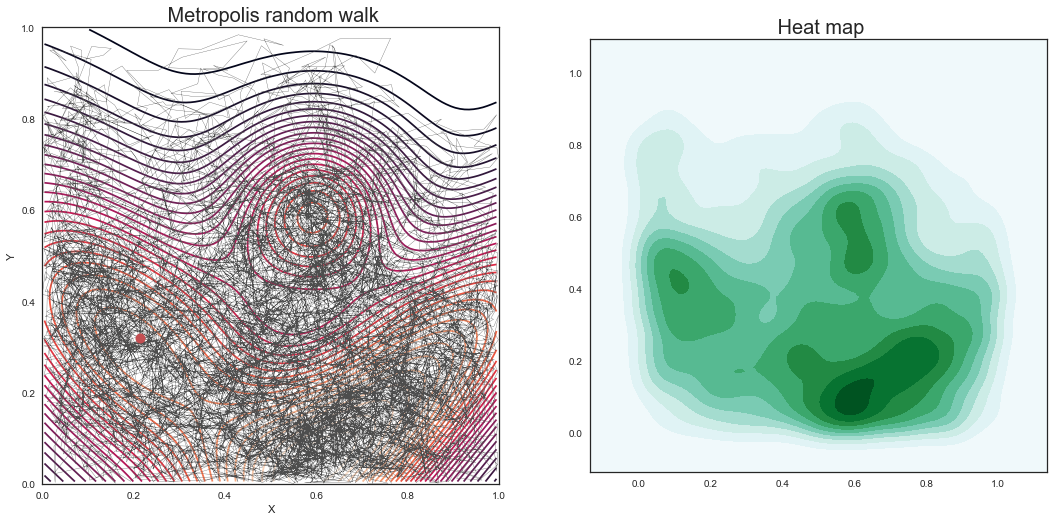

In [395]:
import seaborn as sns; 
#sns.set(style="white",color_codes=True)
# final whole walk
fig, ax = plt.subplots(1,2, subplot_kw=dict(aspect='equal'), figsize=(18,9))
ax[0].contour(X, Y, pdf,40,color='viridis')
ax[0].set_title(' Metropolis random walk',size=20)
ax[0].plot(x.T[0],x.T[1],'-',color='0.3',linewidth=0.3)
ax[0].plot(x[-1].T[0],x[-1].T[1],'ro',markersize=10)
ax[0].set_xlabel(' X')
ax[0].set_ylabel('Y')
ax[0].set_xlim(0.0,1.0)
ax[0].set_ylim(0.0,1.0)
#g = sns.jointplot(x.T[0],x.T[1],kind="kde", space=0, color='r',ax=ax[1])
ax[1].set_title(' Heat map',size=20)
ax[1] = sns.kdeplot(x.T[0], x.T[1], shade=True,color="b")
#plt.savefig('randomwalk_all.png',format='PNG')
plt.show()

**Task 3** Compare your samples to the original by plotting 1-D and 2-D marginal distributions for $x$ and $y$. You may find using the seaborn library very useful for this task.

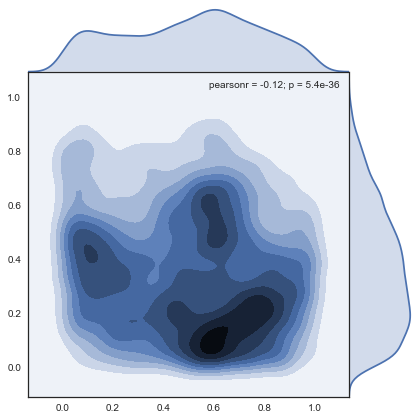

In [396]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

import seaborn as sns; 
sns.set(style="white",color_codes=True)

# use seaborn to plot density of samples together with marginals

g = sns.jointplot(x.T[0],x.T[1],kind="kde", space=0, color="b")
plt.show()

Change the proposal distribution by increasing or decreasing $\sigma$. What do you notice?

In [397]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

nsteps = 10000 # Number of iterations
np.random.seed(1234)
xstart = np.array([ 0.2, 0.2])  # starting pint of random walk
qsig = 0.001# variance of random walk
x,L,e = McMCSampler(nsteps,xstart,qsig)
print(' Accept ratio of Metropolis = ',e)


 Accept ratio of Metropolis =  99.98


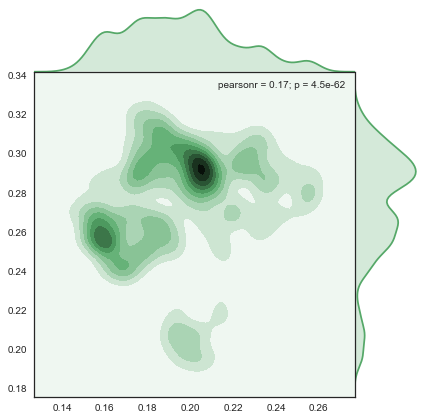

In [398]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

#import seaborn as sns; 
#sns.set(style="white",color_codes=True)

# you can use seaborn.jointplot to plot density of samples together with marginals

g = sns.jointplot(x.T[0],x.T[1],kind="kde", space=0, color="g")

#g = (sns.jointplot(x.T[0],x.T[1], color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6))
plt.show()


** Conclusion: ** Increasing the proposal distribution width decreases the acceptance ratio of the random walk, while decreasing it increases the acceptance ratio, but more steps are required to explore the space. Plotting random walk samples becomes less useful as the number increase because it is all black. Calculating densities and marginals with seabon library allows one to view the densities better.

## Pracitcal problem 5.4: Probabilistic sampling for a seismic Earth model

'Receiver functions' are a class of seismic data used to study discontinuities (layering) in the Earth's crust. At each discontinuity, P-to-S conversions occur, introducing complexity in the waveform. By deconvolving horizontal- and vertical-channel waveforms from earthquakes at teleseismic distances, we can isolate information about these conversions, and hence learn about the crustal structure. This deconvolved signal is the receiver function, and has a highly non-linear dependence on the local crustal properties.

In [399]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from inversionCourse import rf
from inversionCourse import plotcovellipse as pc
from scipy import stats

The function `rf.rfcalc()` computes synthetic receiver functions (using routines developed by Dr. Takuo Shibutani). It is called as follows:
```python
t,rfunc = rf.rfcalc(model)
```
where `model` is a NumPy array of dimension `[nlayers,3]`. The values in `model[:,0]` give the depths of discontinuities in the model, while `model[:,1]` contains the S-wave speed above the interface. `model[:,2]` is the ratio of S-wave speed to P-wave speed. The maximum depth of discontinuity that can be considered is 60km.

For example, here is the Earth model.

In [400]:
model = np.array([[1,4.0,1.7],
                  [3.5,4.3,1.7],
                  [8.0,4.2,2.0],
                  [20, 6,1.7],
                  [45,6.2,1.7]])

Lets plot the Earth model

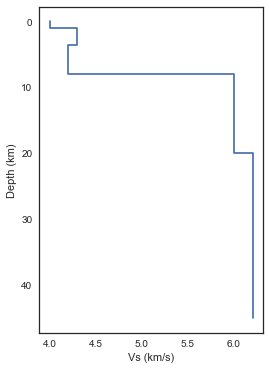

In [401]:
px = np.zeros([2*len(model),2])
py = np.zeros([2*len(model),2])
n=len(model)
px[0::2,0],px[1::2,0],px[1::2,1],px[2::2,1] = model[:,1],model[:,1],model[:,0],model[:-1,0]
plt.figure(figsize=(4,6))
plt.xlabel('Vs (km/s)')
plt.ylabel('Depth (km)')
plt.gca().invert_yaxis()
plt.plot(px[:,0],px[:,1],'b-')
plt.show()

Now we calculate the receiver function and plot it.

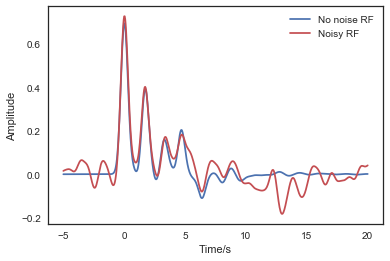

In [402]:
# calculate and plot receiver function
t,RFp = rf.rfcalc(model)          # Receiver function
t2,RFo = rf.rfcalc(model,sn=0.5) # Receiver function with added correlated noise
plt.plot(t,RFp,label='No noise RF')
plt.plot(t2,RFo,'r-',label='Noisy RF')
plt.xlabel('Time/s')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

**Task 1:** Familiarise yourself with the function `rf.rfcalc()` and explore how the receiver function behaves as you change the model.

**Task 2:** Invent a model with around 5 layers, plot it and then compute the corresponding receiver function with the noise parameter $sn$ set to some reasonable value, say $sn=0.5$. Plot the noisy and noiseless receiver functions together just as in the figure above. We are going to treat the noisy receiver function as data.


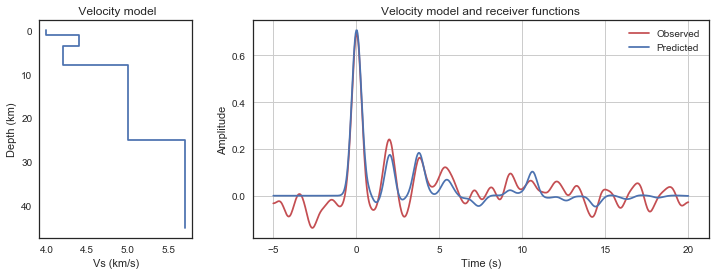

In [403]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

# generate new Earth model and plot it with receiver function

def plotmodRF(model,RFo,RFp):
    f, (a0, a1) = plt.subplots(1,2, figsize=(12,4), gridspec_kw = {'width_ratios':[1, 3]})

    a1.set_title('Velocity model and receiver functions')
    a1.set_xlabel("Time (s)")
    a1.set_ylabel("Amplitude")
    a1.grid(True)
    a1.plot(time1, RFo, 'r-',label='Observed')
    a1.plot(time2, RFp, label='Predicted')
    a1.legend()

    px = np.zeros([2*len(model),2])
    py = np.zeros([2*len(model),2])
    n=len(model)
    px[0::2,0],px[1::2,0],px[1::2,1],px[2::2,1] = model[:,1],model[:,1],model[:,0],model[:-1,0]

    a0.set_title(" Velocity model")                   # Plot velocity model with Receiver function
    a0.set_xlabel('Vs (km/s)')
    a0.set_ylabel('Depth (km)')
    a0.plot(px[:,0],px[:,1],'b-')
    a0.invert_yaxis()

    plt.show()
    return

model = np.array([[1,4.0,1.7],
                  [3.5,4.4,1.7],
                  [8.0,4.2,2.0],
                  [25, 5,1.7],
                  [45,5.7,1.7]])
n=len(model)
time1,RFo = rf.rfcalc(model,sn=0.5)          # Calculate observed noisy Receiver function
time2,RFp = rf.rfcalc(model) # Calculate predicted noiseless Receiver function
plotmodRF(model,RFo,RFp)   # Plot velocity model and Receiver functions

**Task 3:** To measure the fit of the observed and calculationed Receiver function we specify a Likelihood function $p({\mathbf d}_{obs}| {\mathbf m})$ 

\begin{equation*}
p({\mathbf d}_{obs} | {\mathbf m}) \propto \exp \left\{- \frac{1}{2} ({\mathbf d}_{obs}-{\mathbf d}_{pred}({\mathbf m}))^T C_D^{-1} ({\mathbf d}_{obs}-{\mathbf d}_{pred}({\mathbf m})) \right\}
\end{equation*}

where ${\mathbf d}_{obs}$ is the observed receiver function and ${\mathbf d}_{pred}({\mathbf m})$ is the one predicted by model $({\mathbf m})$. The Likelihood is defined as the probability of observing the data actually observed, given an Earth model.

In practice we usually need to evaluate the negative log of the Likelihood
which involves the inverse data covariance matrix describing correlated noise in the receiver function, $C_D^{-1}$ . For this problem you can evaluate $C_D^{-1}$ using the supplied routine InvDataCov($\sigma_t$,$\sigma_a$,$n$), which builds an $nxn$ inverse data covariance matrix for a time signal with amplitude variance $\sigma_a^2$ and time correlation length $\sigma_t$, for receiver length of $n$ time samples. In this example you can use $\sigma_t = 2.5$, $\sigma_a=0.01$. 

In this example we will also temper the Likelihood by rescaling the data covariance matrix by a temperature value, $T$, i.e. use $C_D^{-1}/T$ as the data covariance matrix in all calculations. This effectively reduces the size of `peakiness' of the posterior PDF to a simpler more manageable distribution. For this example set $T=100$.

Write a routine to compute the Likelihood of any test model using the above expression tempered by $T$.

In [404]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 
Temp = 100 # Temperature
Cdinv = rf.InvDataCov(2.5,0.01,len(RFo))
Cdinv /= Temp # Temper Data covariance matrix

# now compute the negative log Likelihood between the receiver functions of your two models.

# Calculate waveform misfit between noisy and noiseless receiver functions

res = RFo-RFp
mref = np.dot(res,np.transpose(np.dot(Cdinv, res)))/2.0
print (' Waveform misfit of reference model',mref)

 Waveform misfit of reference model 9.84170015579


**Task 4:** Select two interface depth parameters in your model, i.e. 2 amd 3 would be a good pair. We will now pretend that the true depths of these two interfaces in the Earth model are 'unknown'. We will use McMC to try and sample the 2-D multi-modal PDF for these eparameters.

Choose a reasonable prior $p({\mathbf m})$ for this problem that you can generate samples from. A simple one might be uniform between fixed bounds. 

Suitable ranges for each variable would be $(0,60km)$ for an interface depth, $\pm 1.0 km/s$ for a $V_s$ variable and $\pm 0.5$ for $V_s/V_p$. 

Write a simple McMC sampler to determine the posterior distribution over these two parameters. 

You could do this by implementing the following simple algorithm:
- Step 0. Generate a  set of depths for your two interfaces ${\mathbf m} = (z_1,z_2)$ and calculate the Likelihood $L = p({\mathbf d}_{obs} | {\mathbf m}) $
- Step 1. Generate a new proposed model ${\mathbf m}^{\prime}$ as a random draw from the prior, and calculate its Likelihood, $L^{\prime}=p({\mathbf d}_{obs} | {\mathbf m}^{\prime}) $.
- Step 2. Generate $r$ as a random draw from $U[0,1]$. If $r < \frac{L^{\prime}}{L}$ set ${\mathbf m} = {\mathbf m}^{\prime}$.
- Step 3. Record ${\mathbf m}$ as an entry of your output ensemble and go to 1.

To do this you are advise to write routines to evaluate the Likelihood for a given model and data; and to draw a model from the prior.

To run your McMC sampler you will need to choose the length of the McMC chain. perhaps 100 for testing and at least $10^4$ for a reasonable run. Calculate and print out the percentage of accepted steps in the McMC chain. This number measured how efficient your chain is in drawing samples from the posterior PDF. It depends on the complexity of the target PDF. Ideally we would like values around 20%, but can live with > 5%. The lower it is the fewer useful samples you will have in the output chain and the more likely you will have to thin the output chain before calculating properties of your ensemble.

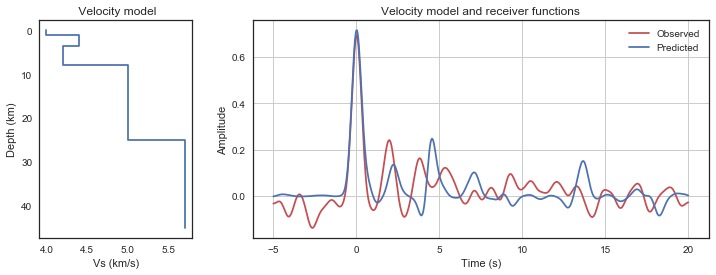

In [405]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

# First we define routines for prior and Likelihood, calculate data and model and plot them
int0 = 2 # First interface
int1 = 3 # Second interface
def logprior(): # uniform prior for interface depths
    m = np.random.uniform(0.0,60.,2)
    return m,np.log(1/60)

def logLikelihood(m,RFo,Cdinv): # calculate logLikelikodd given two interface depths
    mod = np.copy(model)
    mod[int0,0] = m[0]
    mod[int1,0] = m[1]
    t,RFp = rf.rfcalc(mod)
    res = RFo-RFp
    logLike = -0.5*np.dot(res,np.transpose(np.dot(Cdinv, res)))/2.0 # proportional to log of Likelihood
    return logLike,RFp
m,lprior = logprior()
logLike,RFp = logLikelihood(m,RFo,Cdinv)
#print(m,lprior,lLike)
plotmodRF(model,RFo,RFp)   # Plot velocity model and Receiver functions

In [406]:
# Now we write our metroplois sample and generate an ensemble
def inside(x): 
    return (x[0] < 60.0 and x[0] > 0. and x[1] > 0. and x[1] < 60.)

# draw samples  of target PDF

def McMCSamplerRF2D(nsteps,RFo,Cdinv):
    x,L = np.zeros((nsteps+1,2)),np.zeros((nsteps+1))
    #print(logLikelihood(x,RFo,Cdinv)[0])
    x[0],lprior = logprior()  # starting point of random walk drawn from prior
    L[0],RFp = logLikelihood(x[0],RFo,Cdinv) # Likelihood of initial point
    L[0] /= Temp
    k = 0
    for step in range(nsteps):
        xnew,lprior = logprior()  # starting point of random walk drawn from prior
        Lp = logLikelihood(xnew,RFo,Cdinv)[0] # Likelihood of proposed point
        Lp /= Temp
        r = np.random.uniform()
        if ( Lp-L[step] > np.log(r) and inside(xnew)):
            #print(' accept', Lp-L[step],np.log(r))
            L[step+1] = Lp
            x[step+1] = xnew
            k+=1
        else:
        #print(' reject')
            L[step+1] = L[step]
            x[step+1] = x[step]
    return x,L,100*k/nsteps
    
nsteps = 10000 # Number of iterations
np.random.seed(1234)
Temp = 1.
ensemble,logLikes,e = McMCSamplerRF2D(nsteps,RFo,Cdinv)
print(' Accept ratio of Metropolis random walk = ',e)

# thin the chain
thin = int(100/e) # choose thining based on acceptance ratio
ensemble = ensemble[::thin]
logLikes = logLikes[::thin]

 Accept ratio of Metropolis random walk =  2.99


In [407]:
# Calculate true posterior across 2-D parameter space
nints = 80
depths = np.linspace(0,60.,nints)
lpost = np.zeros((nints,nints))
for i,d0 in enumerate(depths):
    for j,d1 in enumerate(depths):
        m = [d0,d1]
        lpost[j,i] = logLikelihood(m,RFo,Cdinv)[0]/Temp

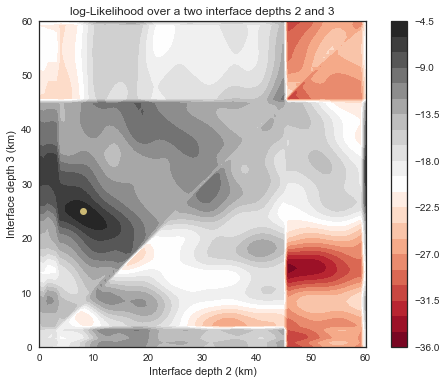

In [408]:
# plot true posterior across 2-D parameter space
fig = plt.figure(figsize=(9,6))
plt.axes().set_aspect('equal')
plt.title('log-Likelihood over a two interface depths '+repr(int0)+' and '+repr(int1))
plt.ylabel('Interface depth '+repr(int1)+' (km)')
plt.xlabel('Interface depth '+repr(int0)+' (km)')
X, Y = np.meshgrid(depths, depths)
plt.contourf(X, Y, lpost, 20, cmap='RdGy')
plt.plot(model[int0,0],model[int1,0],'yo')
plt.colorbar()
plt.show()

**Task 5:** Adjust your Markov chain until you are satsified that it has converged and use the output to select an ensemble of samples that you feel are reasonably distributed according to the posterior PDF for your two variables.
You may need to thin out the ensemble by subsampling. 

Plot the density of your McMC samples as a function of the two interface depths together with 1-D marginals for each interface. Compare these to a contour plot of the posterior distribution over the 2D model space.

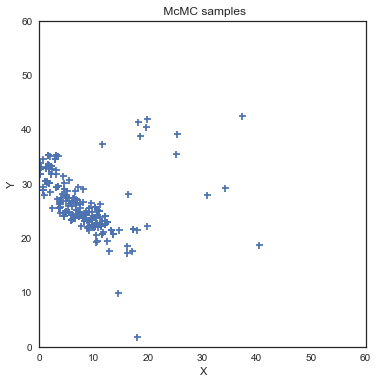

In [409]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

fig, ax = plt.subplots(1,1, subplot_kw=dict(aspect='equal'), figsize=(12,6))
#ax.contour(X, Y, pdf,40)
ax.set_title(' McMC samples')
#ax.plot(ensemble.T[0],ensemble.T[1],'ko')
ax.scatter(ensemble.T[0], ensemble.T[1],edgecolors='k',alpha=1.0,marker='+')
ax.set_xlim(0.,60.)
ax.set_ylim(0.,60.)
ax.set_xlabel(' X')
ax.set_ylabel('Y')

plt.show()


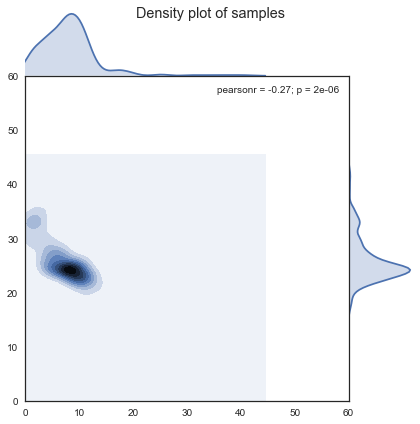

In [410]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

import seaborn as sns; 
sns.set(style="white",color_codes=True)

# use seaborn to plot density of samples together with marginals

thin = 1
xp = np.array(ensemble[::thin])
g = sns.jointplot(xp.T[0],xp.T[1],kind="kde", space=0, color="b",xlim=[0.,60.],ylim=[0.,60.])
g.fig.suptitle('Density plot of samples') 
plt.show()

**Task 6:** Calculate the MAP and mean models of the posterior ensemble.

In [411]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

# map model
print(' Map model of posterior ensemble',ensemble.T[0][np.argmax(logLikes)],ensemble.T[1][np.argmax(logLikes)])
print(' Depth of interface ',int0,' is ',ensemble.T[0][np.argmax(logLikes)])
print(' Depth of interface ',int1,' is ',ensemble.T[1][np.argmax(logLikes)])

 Map model of posterior ensemble 8.63189281601 24.318218073
 Depth of interface  2  is  8.63189281601
 Depth of interface  3  is  24.318218073


**Task 7:** Calculate the posterior model covariance matrix and standard devistions of each depth parameter from this ensemble.

In [412]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

Cm_cov= np.cov(ensemble.T)
Cm_std= np.std(ensemble,axis=0)
print(' Model covariance matrix from posterior ensemble\n',Cm_cov)
print(' Posterior PDF standard deviation of interface ',int0,' is ',Cm_std[0])
print(' Posterior PDF standard deviation of interface ',int1,' is ',Cm_std[1])


 Model covariance matrix from posterior ensemble
 [[ 28.06899594  -6.52743404]
 [ -6.52743404  21.03956965]]
 Posterior PDF standard deviation of interface  2  is  5.2892970909
 Posterior PDF standard deviation of interface  3  is  4.57934062279


**Task 8:** Plot the 68% and 95 Credible ellipses for this posterior model covariance matrix and compare to the density plot you obtained in task4.

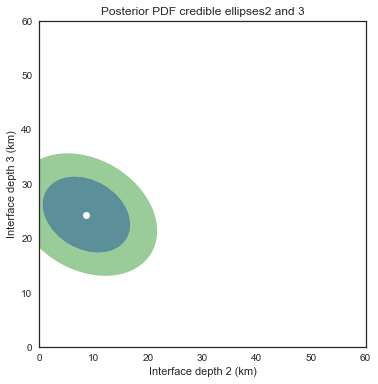

In [413]:
# plot credible intervals from posterior ensemble

fig = plt.figure(figsize=(9,6))
plt.axes().set_aspect('equal')
plt.title('Posterior PDF credible ellipses'+repr(int0)+' and '+repr(int1))
l68 = np.sqrt(stats.chi2.ppf(q=0.68,df=2)) # number of standard deviations equivalent to 68% confidence ellipse
l95 = np.sqrt(stats.chi2.ppf(q=0.95,df=2)) # number of standard deviations equivalent to 95% confidence ellipse
pc.plot_cov_ellipse(Cm_cov,[ensemble.T[0][np.argmax(logLikes)],ensemble.T[1][np.argmax(logLikes)]], nstd=l68,color='Blue',alpha=0.4,label='68% Confidence')
pc.plot_cov_ellipse(Cm_cov,[ensemble.T[0][np.argmax(logLikes)],ensemble.T[1][np.argmax(logLikes)]], nstd=l95,color='Green',alpha=0.4,label='95% Confidence')
plt.xlim(0.,60.)
plt.ylim(0.,60.)
plt.plot(ensemble.T[0][np.argmax(logLikes)],ensemble.T[1][np.argmax(logLikes)],'wo')
plt.ylabel('Interface depth '+repr(int1)+' (km)')
plt.xlabel('Interface depth '+repr(int0)+' (km)')

plt.show()


Some further things to think about with your results
- What fraction of your proposed samples are accepted?
- How does the level of noise assumed in the Likelihood function impact results? You can test this by repeating with a different data covariance matrix. Can you explain the features that you observe?
- How many samples do you need to generate to get good results? Is your Markov chain stable (i.e., do two different portions of your chain share the same distribution)?

## Pracitcal problem 6. Bayesian inference for Regression

Suppose we have a 2-D data set of noisy $(x,y)$ values and have no idea
about the underlying function which produced it (Figure 6). The task is
to recover information about the (red) function from the observations.
In this exercise you can do this without fixing the complexity
(polynomial order) of the curve in advance. Instead the data is used to
constrain the number of degrees of freedom in the curve using
(transdimensional) Bayesian sampling.

<img src="Figures/rjmcmc_single/ch0-exampledata.png" alt="RJMCMC figure" width="400"/>
Figure 5. 2-D data set. Red curve is the true function, dots are the observed data.

This exercise makes use of Bayesian Markov chain Monte Carlo sampling
software contained in the <span>*ilab*</span> inversion software
library. The library is available as Fortran or C source code with a
python interface. A PDF tutorial to the python routines is available and called
<span>*tutorial_single.pdf*</span>
[available here](files/Figures/tutorial_single.pdf).
The tutorial can be used as a guide to carry out the
following exercises with detailed descriptions of what each component does. Here you can either try and write python scripts
yourself to carry out the exercises below, or just load the solutions written in the tutorial,
run them and examine what they do.

The task is to estimate the red curve, as well as its uncertainty using
the Partition Modelling algorithm. This is
implemented in the python software library <span>*rjmcmc*</span>.

For this tutorial we will use a non-trivial (in the sense that it will
require a higher order polynomial to fit the function correctly) synthetic
dataset with added noise.
The function that is used is an exponentially increasing sine wave
over the domain 0 . . . 10, i.e.

$$y = e^{x/3} \sin \frac{2x}{3}$$

Lets assume that the errors are independent and only in the
y-co-ordinate and have a Gaussian distribution, with variance
$\sigma_i^2$. If the data are $y_i, (i=1,\dots, n)$ and the model
predictions at the same locations are $y_i, (i=1,\dots, n)$, then the
Likelihood function which measures the success of the model in fitting
the data is given by

$$p({\bf d} | {\bf m}) = \frac{1}{(2\pi)^{n/2}\prod_{i=1}^n \sigma_i} e ^{-\sum_{i=1}^n [y^{obs}_i - y_i({\bf m})]^2/\sigma_i^2}.$$

### Tasks to complete:

** Task 1**.  First load the given data set of $(x^{obs}_i, y^{obs}_i)$ values and
    plot the data. You should see a figure similar to the one above.


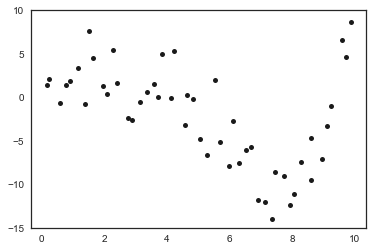

In [414]:
# Write your answer in here
#
# Open our data file which consists of one (x, y) coordinater per line
# separated by whitespace
#
f = open('Datasets/rjmcmc_single_data.txt', 'r')
lines = f.readlines()

x = []
y = []

for line in lines:
    columns = line.split()

    x.append(float(columns[0]))
    y.append(float(columns[1]))

f.close()

# plot the data
fig = plt.figure()
plt.plot(x, y, 'ko',markersize=5)
plt.ylim(-15,10)
plt.show()


** Task 2**. In this exercise we assume a polynomial representation for the
    unknown function (red curve) with maximum order 5 and a uniform
    prior PDF.


For performing a regression analysis on a continuous dataset the
function is called <span> *regression_single1d </span>. The parameters for this
function are as follows with default values shown where applicable:

dataset The dataset object to run the analysis on. This is an rjmcmc.
dataset1d object which wraps the x and y vectors you load
from the file and includes individual point noise values. This is the
only parameter which doesn’t have a default value.

burnin = 10000 The number of initial samples to throw away.

total = 50000 The total number of samples to use for the analysis.

max_order = 5 The maximum order of polynomial to use to fit the
data.

xsamples = 100 The number of points to sample along the x direction
for the curve.

ysamples = 100 The number of points to sample along the y directory
for the statistics such as mode, median and confidence intervals.
This is the number of bins for the histograms in the y direction.

confidence_interval = 0.95 The confidence interval to use for minimum
and maximum confidence intervals. This should be a value
between 0 and 1.
single partition regression analysis 3

For this analysis we are only going to use the default values

Use the 1-D Partition modelling software to generate
    50000 curves and take the mean. It should look like the figure below.



<img src="Figures/rjmcmc_single/ch2-analyse.png" alt="RJMCMC figure" width="400"/>
Figure 6. 2-D data set with mean reconstructed model from 50000 McMC samples.

In [415]:
import rjmcmc 

# Write your answer in here

#
# Estimate our error standard deviation
#
sigma = 3.0
n = [sigma] * len(x)

#
# Create the rjmcmc dataset
#
data = rjmcmc.dataset1d(x, y, n)

#
# Run the default analysis
#
results = rjmcmc.regression_single1d(data)

#
# Retrieve the mean curve for plotting
#
xc = results.x()
meancurve = results.mean()

#
# Plot the data with black crosses and the mean with a red line
#
fig = plt.figure()
plt.plot(x, y, 'ko', xc, meancurve, 'r-')
plt.show()


ImportError: No module named 'rjmcmc'



** Task 3**  
In this example the maximum order of the polynomial has been fixed
    at 5. Adjust the
    maximum order between 0 and 5 and plot the posterior distribution of
    the order. Plot the two figures showing the mean predicted curve
    for each case and the posterior PDF on the order of the
    polynomial, as below. The shows how the data support has detected
    the degree of the polynomial.
    
 <img src="Figures/rjmcmc_single/ch3-orderanalysis.png" alt="RJMCMC figure" width="400"/>
 <img src="Figures/rjmcmc_single/ch3-orderanalysishist.png" alt="RJMCMC figure" width="400"/>
Figure {a) (Upper panel) Mean models for 6 separate McMC runs with different maximum order of polynomial, 0 to 5; b) (Lower panel) Posterior probability distribution showing the support of the data for different polynomial orders as a function of maximum order.   

In [ ]:
# Write your answer in here
from mpl_toolkits.mplot3d import Axes3D


# Run a series of analyses with varying maximum allowed order
#
results = []
burnin = 100
total = 1000
orderlimit = 5
for maxorder in range(orderlimit + 1):
    print (maxorder)
    results.append(rjmcmc.regression_single1d(data, burnin, total, maxorder))

colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
formats = list(map(lambda x: x + '-', colours))

#
# Plot the data with black crosses the curves from each of the analyses
# with a different colour
#
fig = plt.figure(1)
ax = fig.add_subplot(111)

orders = []
for result in results:

    order = result.order_histogram()
    if order == None: # The max order = 0 case will return None so 
        order = [total]

    ax.plot(result.x(), result.mean(), c =colours[len(orders)], label= 'Max. Order %d' % len(orders),linewidth=2.0)
    #
    # Create the order histogram data (append zeros for orders not allowed
    # in the analyses
    #
    orders.append(order + [0] * (orderlimit + 1 - len(order)))

ax.plot(x, y, 'ko')
#
plt.legend()
plt.show()

In [ ]:

#
# Plot a 3D bar chart showing the progression of the order histogram
# as the analysis maximum order is increased.
#
fig = plt.figure(2)
ax = Axes3D(fig)
xs = range(orderlimit + 1)
for maxorder in xs:
    ax.bar(xs, 
           orders[maxorder], 
           zs=maxorder, 
           zdir = 'y', 
           color=colours[maxorder])

ax.set_xlabel('Order')
ax.set_ylabel('Maximum Order')
ax.set_zlabel('Count')

#fig.savefig('ch3-orderanalysishist.pdf', format='PDF')
plt.show()

** Task 4** 
Repeat the run with maximum order 5 to generate an ensemble of
    solutions, just as in exercise 2 above, only this time use the
    library routines to plot a density model of the entire ensemble. In
    this way we get a visual impression of the error in the predicted
    curve. You can use script Use script <span>ch4-confidence.py</span>
    to do this and you should get a plot similar to Figure 8.
    
<img src="Figures/rjmcmc_single/ch4-confidence.png" alt="RJMCMC figure" width="400"/>
Figure  Grayscale image of probability density of all curves in the ensemble when assuming maximum polynomial order equal to 5

In [ ]:
# Write your answer in here
#
# This is a callback function which can be passed to rjmcmc routines to sample the curves generated 
# during the analysis
#
sample_x = None
sample_curves = []
sample_i = 0
sample_rate = 5
def sampler_cb(x, y):
    global sample_x, sample_curves, sample_i, sample_rate

    if sample_i == 0:
        sample_x = x

    if sample_i % sample_rate == 0:
        sample_curves.append(y)

    sample_i = sample_i + 1

#
# Run a series of analyses with varying maximum allowed order
#
results = []
burnin = 100
total = 1000
maxorder = 5
results = rjmcmc.regression_single1d_sampled(data, 
                                             sampler_cb,
                                             burnin, 
                                             total, 
                                             maxorder)

#
# Plot the data with black crosses, the sample curves as faint lines, and
# the mean as a red line
#
fig = plt.figure()
ax = fig.add_subplot(111)

yc = 0.5
yalpha = 1.0/((1.0 - yc) * float(len(sample_curves)))
for sy in sample_curves:

    ax.plot(sample_x, sy, 
            color = str(yc),
            alpha = yalpha,
            linestyle = '-',
            linewidth = 10)

ax.plot(results.x(), results.mean(), 'r-')
ax.plot(x, y, 'ko')

plt.show()


** Task 5** 
Use the routines to try and estimate
    the standard deviation of the noise in the data. In fact we invert
    for a parameter $\lambda$ which is the ratio of the estimated noise
    (i.e. $\sigma$ in eqn. 10) to the true noise. Plot a histogram of
    the results and see how well the Bayesian sampling is able to
    constrain the level of noise in the data. Your results should be
    similiar to Figure below. If the data were estimated with $\sigma=3$,
    what do you think the true value was ?

<img src="Figures/rjmcmc_single/ch5-hierarchical.png" alt="RJMCMC figure" width="400"/>
Figure  Posterior PDF of the data noise parameter λ values found from sampling.

In [ ]:
# set up lambda ranges
lambda_min = 0.5
lambda_max = 2.0
lambda_std = 0.05

data.set_lambda_range(lambda_min, lambda_max)
data.set_lambda_std(lambda_std)


#
# Run the default analysis
#
results = rjmcmc.regression_single1d(data)

#
# Retrieve the mean curve for plotting
#
xc = results.x()
meancurve = results.mean()

#
# Retrieve the results of the hierarchical
#
p = results.proposed()
a = results.acceptance()

print ('Lambda Acceptance Rate:', float(a[1])/float(p[1]) * 100.0)

lh = results.lambda_history()

#
# Plot the data with black crosses and the mean with a red line
#
fig = plt.figure(1)
plt.plot(x, y, 'ko', xc, meancurve, 'r-')


fig = plt.figure(2)
plt.plot(range(len(lh)), lh)

fig = plt.figure(3)

a = plt.subplot(111)
lsamples = lh[10000:]

n, bins, patches = a.hist(lsamples, 100, range=(lambda_min, lambda_max))
a.set_title('Histogram of Lambda')
a.set_xlabel('Lambda')
a.set_ylabel('Count')

print ('Lambda average:', np.sum(lsamples)/float(len(lsamples)))
plt.show()


### Problem 6: Bayesian inference: Regression with discontinuities 

Now consider a new data set of noisy $(x,y)$ values only this time with
discontinuities evident (See figure below). The task is again to recover
information about the (red) function from the observations, but this
time the data must also be used to constrain the number and position of
discontinuities.

<img src="Figures/rjmcmc_multi/ch0-exampledata.png" alt="RJMCMC figure" width="400"/>
Figure 10.  2-D data set. Red curve is the true function, dots are observed data.

This exercise is an expanded version of the previous one only now we
allow for multiple polynomial functions separated into partitions along
the x axis. We do not know where the discontinuities occur, nor how many
there are. Algorithms for constructing solutions using the Partition
modelling approach are in the python software library
<span>*rjmcmc*</span>. Again you can either  follow the
<span>*rjmcmc library tutorial guide*</span> [[available here](files/Figures/tutorial_multi.pdf)]
to get the solutions to each section and run them, or you can attempt to write solutions yourself using the rjmcmc package.

The same Likelihood function and prior is assumed as in the previous problem, only
now we introduce the number of partitions as unknowns and this also has
a flat prior.

### Tasks to complete:

** Task 1**.  First load the given data set of $(x^{obs}_i, y^{obs}_i)$ values and
    plot the data. You should see a figure similar to the one above.


In [ ]:
# Write your answer in here

#
# Import the libraries we will need for analysis and plotting.
#
import rjmcmc 

#
# Open our data file which consists of one (x, y) coordinater per line
# separated by whitespace
#
f = open('Datasets/rjmcmc_multi_data.txt', 'r')
lines = f.readlines()

x = []
y = []

for line in lines:
    columns = line.split()

    x.append(float(columns[0]))
    y.append(float(columns[1]))

f.close()

fig = plt.figure()

plt.plot(x, y, 'ko')

plt.show()

** Task 2**. 
In this exercise we assume a polynomial representation for the
    unknown function (red curve) with maximum order 1 and a uniform
    prior PDF, and also sample over the number of partitions and the
    locations of the discontinuities.

Use the 1-D Partition modelling software to generate
    50000 curves and take the mean.  Plot the a) the mean curve, b)
    the posterior PDF of the discontinuity locations and c) the
    posterior PDF of the number of partitions. Your figures should be
    similar to the one below.
  
<img src="Figures/rjmcmc_multi/ch2-analyse.png" alt="RJMCMC figure" width="400"/>
<img src="Figures/rjmcmc_multi/ch2-analyse-partcount.png" alt="RJMCMC figure" width="400"/>
Figure (Upper panel) 2-D data set with mean reconstructed model from
    50000 McMC samples; b) (Middel panel) the posterior PDF of the
    location of discontinuities in the data (notice the two peaks); c) (Lower panel)
    the posterior PDF of the number of partitions detected in the
    data.

 

In [ ]:
# Write your answer in here

#
# Set our x range
#
xmin = 0.0
xmax = 10.0

#
# Estimate our error standard deviation
#
sigma = 3.0
n = [sigma] * len(x)

#
# Create the rjmcmc dataset
#
data = rjmcmc.dataset1d(x, y, n)

#
# Specify the standard deviation for the move partition 
#
pd = 1.0

#
# Run an analysis with reduced max order to only allow linear 
# segments
#
burnin = 10000
total = 50000
max_partitions = 10
max_order = 1

results = rjmcmc.regression_part1d(data, 
                                   pd, 
                                   burnin, 
                                   total, 
                                   max_partitions,
                                   max_order)

#
# Retrieve the mean curve for plotting
#
xc = results.x()
meancurve = results.mean()

#
# Retrieve the partition location and count information
#
partlocation = results.partition_location_histogram()
partcount = results.partitions()

#
# Plot the data with black crosses and the mean with a red line
#
fig = plt.figure(1)

a = plt.subplot(211)

a.plot(x, y, 'ko', xc, meancurve, 'r-')
a.set_xlim(xmin, xmax)

b = plt.subplot(212)
b.bar(xc, partlocation, xc[1] - xc[0])
b.set_xlim(xmin, xmax)

fig.savefig('ch2-analyse.pdf', format='PDF')

fig = plt.figure(2)

a = plt.subplot(111)
a.hist(partcount, bins=5, range=(0, 5), align='left')

plt.show()


Looking at the results of the Bayesian sampling try and answer the
    following: How many partitions have been detected ? Where are the
    most likely location of the partition boundaries/discontinuities ?
    Can you see a difference in how well the data is able to detect
    boundaries of each partition ? What would you estimate as the likely
    position and error of the discontinuities ?


** Task 3**.   In the previous example linear polynomials were used in each
    partition. We now increase the maximum order of the polynomial to 5,
    meaning that up to quintic polynomials are used within each
    partition. Plot the same figures as in the
    previous exercise showing a) the mean curve, b) the posterior PDF of
    the discontinuity locations and c) the posterior PDF of the number
    of partitions. See how they have changed at the inference process
    now picks out the discontinuity number and location much better.
    Your figures should be similar to Figure below. Using these
    probabilistic sampling results we might draw different conclusions
    than in Q2, but remember here the maximum polynomial order provided
    as prior information to the Bayesian procedure is different from in
    the previous case.

<img src="Figures/rjmcmc_multi/ch3-order.png" alt="RJMCMC figure" width="400"/>
<img src="Figures/rjmcmc_multi/ch3-orderpartcount.png" alt="RJMCMC figure" width="400"/>
Figure. (Top panel) 2-D data set with mean reconstructed model from
    50000 McMC samples, with maximum order of polynomial set to 5; b) 
    (Middle panel) the posterior PDF of the location of discontinuities
    in the data (notice the two peaks); c) (Lower panel) the posterior PDF of the
    number of partitions detected in the
    data.]

In [ ]:
# Write your answer in here

#
# Specify the standard deviation for the move partition 
#
pd = 1.0

#
# Run the default analysis
#
results = rjmcmc.regression_part1d(data, pd)

#
# Retrieve the mean curve for plotting
#
xc = results.x()
meancurve = results.mean()

#
# Retrieve the partition location and count information
#
partlocation = results.partition_location_histogram()
partcount = results.partitions()

#
# Plot the data with black crosses and the mean with a red line
#
fig = plt.figure(1)

a = plt.subplot(211)

a.plot(x, y, 'ko', xc, meancurve, 'r-')
a.set_xlim(xmin, xmax)

b = plt.subplot(212)
b.bar(xc, partlocation, xc[1] - xc[0])
b.set_xlim(xmin, xmax)

fig.savefig('ch3-order.pdf', format='PDF')

fig = plt.figure(2)

a = plt.subplot(111)
a.hist(partcount, bins=5, range=(0, 5), align='left')

plt.show()


** Task 4**. Repeat the run, only this time use the library routines to plot a
    density model of the entire ensemble of curves and 95% confidence
    intervals at each point along the axes. In this way we get a visual
    impression of the error in the predicted curve. You should
    get a plot similar to Figure below. This gives an indication of the
    confidence in the predictive capability of the ensemble of curves.

<img src="Figures/rjmcmc_multi/ch4-confidence.png" alt="RJMCMC figure" width="400"/>
<img src="Figures/rjmcmc_multi/ch4-confidenceintervals.png" alt="RJMCMC figure" width="400"/>
Figure (Upper panel) Grayscale image of probability density of all curves in
    the ensemble when maximum polynomial order equal to 5 inside each
    partition; b) ((Lower panel) 95% (point by point) confidence intervals from
    the ensemble of solutions.]

In [ ]:
# Write your answer in here

#
# This is a callback function which can be passed to rjmcmc routines to sample the curves generated 
# during the analysis
#
sample_x = None
sample_curves = []
sample_i = 0
sample_rate = 250
def sampler_cb(x, y):
    global sample_x, sample_curves, sample_i, sample_rate

    if sample_i == 0:
        sample_x = x

    if sample_i % sample_rate == 0:
        sample_curves.append(y)

    sample_i = sample_i + 1
    
# Run a series of analyses with varying maximum allowed order
#
#
pd = 1.0 # Specify the standard deviation for the move partition 
#

#
# Run an analysis with reduced max order to only allow linear 
# segments
#
burnin = 10000
total = 50000
max_partitions = 10
max_order = 3

results = rjmcmc.regression_part1d_sampled(data, 
                                           sampler_cb,
                                           pd,
                                           burnin, 
                                           total, 
                                           max_partitions,
                                           max_order)

In [ ]:
# Write your answer in here

# Now do the plotting
#
# Plot the data with black crosses, the sample curves as faint lines, and
# the mean as a red line
#
fig = plt.figure(1)
ax = fig.add_subplot(111)

yc = 0.5
yalpha = 1.0/((1.0 - yc) * float(len(sample_curves)))
for sy in sample_curves:

    ax.plot(sample_x, sy, 
            color = str(yc),
            alpha = yalpha,
            linestyle = '-',
            linewidth = 10)

ax.plot(results.x(), results.mean(), 'r-')
ax.plot(x, y, 'ko')
ax.set_xlim(xmin, xmax)

fig = plt.figure(2)
ax = fig.add_subplot(111)

ax.plot(results.x(), results.mean(), 'r-')
ax.plot(x, y, 'ko')
ax.plot(results.x(), results.credible_min(), 'b:')
ax.plot(results.x(), results.credible_max(), 'b:')

ax.set_xlim(xmin, xmax)

plt.show()


** Task 5** 
Use the routines to try and estimate
    the standard deviation of the noise in the data. In fact we invert
    for a parameter $\lambda$ which is the ratio of the estimated noise
    (i.e. $\sigma$ in the Likelihood expression above) to the true noise. Plot a histogram of
    the results and see how well the Bayesian sampling is able to
    constrain the level of noise in the data. Your results should be
    similiar to Figure below. If the data were estimated with $\sigma=3$,
    what do you think the true value was ?

<img src="Figures/rjmcmc_multi/ch5-hierarchical.png" alt="RJMCMC figure" width="400"/>
Figure  Posterior PDF of the data noise parameter λ values found from sampling.

In [ ]:
#
# Set a range of where we think the error should be
#
lambda_min = 0.5
lambda_max = 3.0
lambda_std = 0.1

data.set_lambda_range(lambda_min, lambda_max)
data.set_lambda_std(lambda_std)

#
# Specify the standard deviation for the move partition 
#
pd = 1.0

#
# Run the default analysis
#
results = rjmcmc.regression_part1d(data, pd)

#
# Retrieve the mean curve for plotting
#
xc = results.x()
meancurve = results.mean()

#
# Retrieve the partition location and count information
#
partlocation = results.partition_location_histogram()
partcount = results.partitions()

#
# Retrieve the results of the hierarchical
#
p = results.proposed()
a = results.acceptance()

print ('Lambda Acceptance Rate:', '{:6.3f}'.format(float(a[4])/float(p[4]) * 100.0),'%')
lh = results.lambda_history()

#
# Plot the data with black crosses and the mean with a red line
#
fig = plt.figure(1)

a = plt.subplot(211)

a.plot(x, y, 'ko', xc, meancurve, 'r-')
a.set_xlim(xmin, xmax)

b = plt.subplot(212)
b.bar(xc, partlocation, xc[1] - xc[0])
b.set_xlim(xmin, xmax)


fig = plt.figure(2)
plt.plot(range(len(lh)), lh)

fig = plt.figure(3)

a = plt.subplot(111)
lsamples = lh[10000:]

n, bins, patches = a.hist(lsamples, 100, range=(lambda_min, lambda_max))
a.set_title('Histogram of Lambda')
a.set_xlabel('Lambda')
a.set_ylabel('Count')

print ('Lambda average:', '{:5.4f}'.format(np.sum(lsamples)/float(len(lsamples))))

plt.show()
